In [1]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import math
import pandas as pd
import scipy.io
from scipy.signal import hilbert
from scipy.stats import linregress
# Load the .mat file
mat_data = scipy.io.loadmat('RIR_data.mat')
# Access the variables in the .mat file
RIR = mat_data['data']

In [2]:
df = pd.DataFrame(RIR)
s = df.iloc[:, 5]
df.head()
s.head()

0    [[3.619337e-07], [-4.3745402e-07], [7.2463126e...
1    [[-2.243695e-07], [-3.1340218e-07], [-8.395956...
2    [[-3.6142697e-07], [1.2704496e-07], [1.6632393...
3    [[2.7667548e-07], [3.0945247e-07], [3.3485364e...
4    [[-8.945427e-07], [3.9572706e-07], [-2.5114636...
Name: 5, dtype: object

In [3]:
column_names = ['I', 'N', 'A', 'C,', 'f', 'Q']
df = pd.DataFrame(RIR, columns=column_names)
#print(df)
df

I                                        N  \
0    [BLS-Chnolab]  [BLS-Chnolab_SDM_5LS_ListeningTest.mat]   
1    [BLS-Chnolab]  [BLS-Chnolab_SDM_5LS_ListeningTest.mat]   
2    [BLS-Chnolab]  [BLS-Chnolab_SDM_5LS_ListeningTest.mat]   
3    [BLS-Chnolab]  [BLS-Chnolab_SDM_5LS_ListeningTest.mat]   
4    [BLS-Chnolab]  [BLS-Chnolab_SDM_5LS_ListeningTest.mat]   
..             ...                                      ...   
154      [ML2-102]                  [SDM_ML2-102_5LS_W.mat]   
155      [ML2-102]                  [SDM_ML2-102_5LS_W.mat]   
156      [ML2-102]                  [SDM_ML2-102_5LS_W.mat]   
157      [ML2-102]                  [SDM_ML2-102_5LS_W.mat]   
158      [ML2-102]                  [SDM_ML2-102_5LS_W.mat]   

                      A       C,                      f  \
0    [[0.0, 0.0, 1.41]]      [A]   [[1.76, 1.84, 1.41]]   
1    [[0.0, 0.0, 1.41]]  [[[B]]]   [[-1.68, 3.6, 1.41]]   
2    [[0.0, 0.0, 1.41]]  [[[C]]]   [[-1.23, 3.6, 1.41]]   
3    [[0.0, 0.0, 1.41]]  [[[D]]]   [[1.27, 3.86, 1.41]]   
4    [[0.0, 0.0, 1.41]]  [[[E]]]    [[0.0, 1.78, 1.41]]   
..                  ...      ...                    ...   
154         [[0, 0, 0]]      [L]    [[-1.0, 1.73, 0.0]]   
155         [[0, 0, 0]]      [R]     [[1.0, 1.73, 0.0]]   
156         [[0, 0, 0]]      [C]            [[0, 2, 0]]   
157         [[0, 0, 0]]     [LS]  [[-1.88, -0.68, 0.0]]   
158         [[0, 0, 0]]     [RS]   [[1.88, -0.68, 0.0]]   

                                                     Q  
0    [[3.619337e-07], [-4.3745402e-07], [7.2463126e...  
1    [[-2.243695e-07], [-3.1340218e-07], [-8.395956...  
2    [[-3.6142697e-07], [1.2704496e-07], [1.6632393...  
3    [[2.7667548e-07], [3.0945247e-07], [3.3485364e...  
4    [[-8.945427e-07], [3.9572706e-07], [-2.5114636...  
..                                                 ...  
154  [[-0.0], [1.7994028e-11], [1.2818804e-10], [-8...  
155  [[0.0], [-1.17689304e-11], [-2.2036235e-10], [...  
156  [[-0.0], [4.684049e-12], [-5.871651e-11], [1.0...  
157  [[0.0], [-1.3578737e-11], [4.9715357e-11], [2....  
158  [[0.0], [-1.9182282e-11], [-4.2574944e-11], [-...  

[159 rows x 6 columns]

RIR is 2D.
Shape of RIR: (96000, 1)


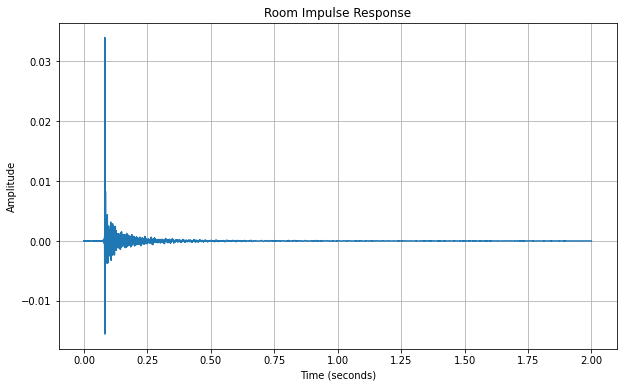

In [4]:
# Calculating the sample RIR for a particular row
row_index = 7
value = df.iloc[row_index]['Q']
#value = df.iloc[7, -1]
rir_data = value

# Check the dimensionality of the audio signal
if rir_data.ndim == 1:
    print("RIR is 1D.")
elif rir_data.ndim == 2:
    print("RIR is 2D.")
else:
    print(f"Unexpected number of dimensions: {rir_data.ndim}")
    
# Print the shape of the audio signal
print("Shape of RIR:", rir_data.shape)

# Create a time axis (assuming uniform time intervals)
sampling_rate = 48000 #sampling frequency 48kHz
time = np.arange(0, len(rir_data)) / sampling_rate

# Plot the RIR
plt.figure(figsize=(10, 6))
plt.plot(time, rir_data)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Room Impulse Response')
plt.grid(True)

plt.show()

Audio is 1D.
Shape of audio signal: (1440641,)
The bit depth of the audio is: 16 bits per sample


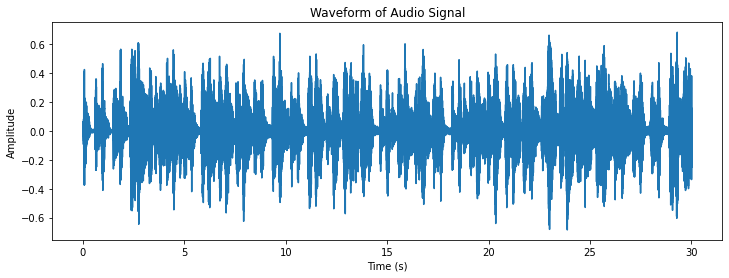

In [5]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import wave

# Replace 'your_audio_file.wav' with the path to your audio file
audio_file_path =  r'E:\tasks\audio data\audio data\sing-prediction-and-estimation-of-sound-field-in-rooms-umachine-learning-techniques-adafe35479227f1ccca42bdf01fb3389aaba66aa\audioData\blues\blues.00001.wav'

# Load the audio file with the specified sampling rate
y, sr = librosa.load(audio_file_path, sr=48000)

# Check the dimensionality of the audio signal
if y.ndim == 1:
    print("Audio is 1D.")
elif y.ndim == 2:
    print("Audio is 2D. This is unexpected; please check your audio file.")
else:
    print(f"Unexpected number of dimensions: {y.ndim}")

# Calculate time axis in seconds
time = np.arange(0, len(y)) / sr

# Print the shape of the audio signal
print("Shape of audio signal:", y.shape)

# Open the audio file
with wave.open(audio_file_path, 'rb') as wf:
    # Get the sample width (bit depth) of the audio
    sample_width = wf.getsampwidth() * 8  # Multiply by 8 to convert from bytes to bits
    print(f'The bit depth of the audio is: {sample_width} bits per sample')

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(time, y)
plt.title('Waveform of Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


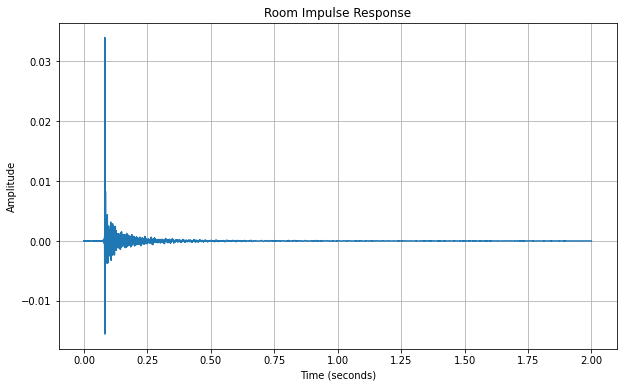

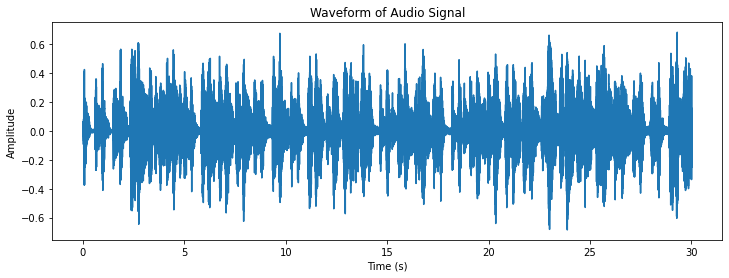

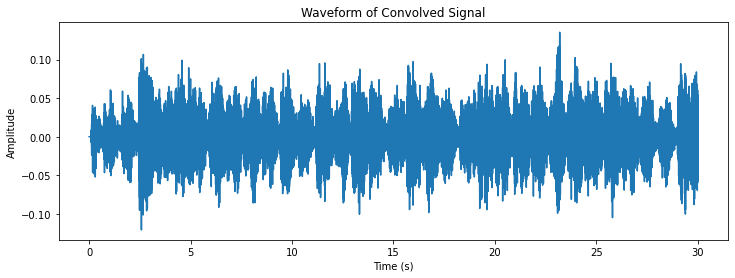

In [6]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile as sf

# Assuming df is your DataFrame containing the impulse response data
# and row_index is the index of the row you want to use
row_index = 7
value = df.iloc[row_index]['Q']
rir_data = np.asarray(value).flatten()  # Ensure rir_data is 1D

# Create a time axis for the RIR (assuming uniform time intervals)
sampling_rate_rir = 48000  # sampling frequency for RIR
time_rir = np.arange(0, len(rir_data)) / sampling_rate_rir

# Plot the RIR
plt.figure(figsize=(10, 6))
plt.plot(time_rir, rir_data)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Room Impulse Response')
plt.grid(True)
plt.show()

# Replace 'your_audio_file.wav' with the path to your audio file
audio_file_path = r'E:\tasks\audio data\audio data\sing-prediction-and-estimation-of-sound-field-in-rooms-umachine-learning-techniques-adafe35479227f1ccca42bdf01fb3389aaba66aa\audioData\blues\blues.00001.wav'

# Load the audio file with the specified sampling rate
y, sr = librosa.load(audio_file_path, sr=48000)

# Calculate time axis in seconds for the audio signal
time_audio = np.arange(0, len(y)) / sr

# Plot the waveform of the audio signal
plt.figure(figsize=(12, 4))
plt.plot(time_audio, y)
plt.title('Waveform of Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Convolve the audio signal with the RIR
convolved_audio = np.convolve(y, rir_data, mode='full')[:len(y)]

# Plot the waveform of the convolved signal
plt.figure(figsize=(12, 4))
plt.plot(time_audio, convolved_audio)
plt.title('Waveform of Convolved Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Save the convolved audio to a file using soundfile
output_file_path = r'E:\tasks\Convolved_Audio.wav'
sf.write(output_file_path, convolved_audio, 48000, 'PCM_16')


In [8]:
import numpy as np
import pandas as pd
import glob
import os
from scipy.io import wavfile
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Reshape

# Load convolved audio data and impulse responses from DataFrame column
impulse_responses_column = df['Q']  # Replace with your column name
convolved_audio_folder = r'E:\tasks\Convolved_Audio'

convolved_audio_files = glob.glob(os.path.join(convolved_audio_folder, '*.wav'))
convolved_audio_files.sort()

# Initialize arrays to store data
convolved_audio_data = []
impulse_response_data = impulse_responses_column.values  # Convert column to numpy array



In [9]:
print(impulse_response_data)

[array([[ 3.6193370e-07],
        [-4.3745402e-07],
        [ 7.2463126e-07],
        ...,
        [-1.7170392e-07],
        [-1.5092435e-07],
        [-3.7658501e-07]], dtype=float32)
 array([[-2.2436950e-07],
        [-3.1340218e-07],
        [-8.3959563e-08],
        ...,
        [ 4.0851940e-08],
        [-9.7430011e-08],
        [-1.1125605e-07]], dtype=float32)
 array([[-3.6142697e-07],
        [ 1.2704496e-07],
        [ 1.6632393e-07],
        ...,
        [-1.7641364e-08],
        [-5.1251156e-08],
        [-2.0551435e-07]], dtype=float32)
 array([[2.7667548e-07],
        [3.0945247e-07],
        [3.3485364e-07],
        ...,
        [1.5201879e-07],
        [7.9271409e-08],
        [1.2326691e-07]], dtype=float32)
 array([[-8.9454272e-07],
        [ 3.9572706e-07],
        [-2.5114636e-07],
        ...,
        [ 1.4505014e-07],
        [ 3.9195729e-08],
        [ 8.0067714e-08]], dtype=float32)
 array([[ 3.9549504e-06],
        [-7.1281227e-07],
        [ 3.3961130e-06],
   

In [10]:
import numpy as np

# Assuming your data is stored in a list of numpy arrays called data_list

# Combine all arrays into a single 2D numpy array
combined_data = np.concatenate(impulse_response_data, axis=0)

# Calculate the minimum and maximum values for each column
min_vals = np.min(combined_data, axis=0)
max_vals = np.max(combined_data, axis=0)

# Normalize each array in the list
normalized_data_list = [(array - min_vals) / (max_vals - min_vals) for array in impulse_response_data]

# Print or use normalized_data_list for training your mode
for normalized_array in normalized_data_list:
    print(normalized_array)

[[0.45491004]
 [0.4549053 ]
 [0.45491216]
 ...
 [0.45490688]
 [0.454907  ]
 [0.45490566]]
[[0.45490658]
 [0.45490605]
 [0.45490742]
 ...
 [0.4549081 ]
 [0.45490733]
 [0.45490724]]
[[0.45490575]
 [0.45490864]
 [0.45490885]
 ...
 [0.4549078 ]
 [0.4549076 ]
 [0.45490667]]
[[0.4549095 ]
 [0.45490974]
 [0.45490986]
 ...
 [0.45490876]
 [0.45490837]
 [0.45490864]]
[[0.45490262]
 [0.45491022]
 [0.4549064 ]
 ...
 [0.45490873]
 [0.4549081 ]
 [0.45490837]]
[[0.4549312 ]
 [0.4549037 ]
 [0.4549279 ]
 ...
 [0.45489973]
 [0.45490333]
 [0.45492032]]
[[0.4549219 ]
 [0.45488757]
 [0.45493364]
 ...
 [0.45491236]
 [0.45490816]
 [0.45491874]]
[[0.45492575]
 [0.45488244]
 [0.454924  ]
 ...
 [0.4548882 ]
 [0.454891  ]
 [0.45489433]]
[[0.4549197 ]
 [0.45489264]
 [0.4549064 ]
 ...
 [0.4548992 ]
 [0.45488226]
 [0.45489612]]
[[0.4549237 ]
 [0.4548933 ]
 [0.45490754]
 ...
 [0.4549119 ]
 [0.45491168]
 [0.45491293]]
[[0.45490685]
 [0.4549184 ]
 [0.45490843]
 ...
 [0.4549037 ]
 [0.45490548]
 [0.4549102 ]]
[[0.454898

In [11]:
# Load data
for convolved_file in convolved_audio_files:
    _, convolved_audio = wavfile.read(convolved_file)
    convolved_audio_data.append(convolved_audio)

# Convert lists to numpy arrays
convolved_audio_data = np.array(convolved_audio_data)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(convolved_audio_data, normalized_array[:159], test_size=0.2)



In [12]:
convolved_audio_data.shape

(159, 661794)

In [13]:
normalized_array.shape

(133119, 1)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization

from tensorflow.keras.optimizers import Adam

# Model setup with a specified learning rate
model = Sequential()
model.add(LSTM(16, input_shape=(661794, 1)))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam() 
model.compile(loss='mean_squared_error', optimizer=optimizer)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
x_array = np.asarray(X_train)
print(x_array.shape)


(127, 661794)


In [18]:
combined_data = np.concatenate(impulse_response_data, axis=0)
y_array = np.stack(combined_data, axis=0)
y_val = np.stack(combined_data, axis=0)

In [21]:
print(y_val)

[[ 3.6193370e-07]
 [-4.3745402e-07]
 [ 7.2463126e-07]
 ...
 [-4.3784268e-11]
 [ 9.5810209e-12]
 [-0.0000000e+00]]


In [16]:
X_train_truncated = x_array[:1]
X_val_truncated = X_val[:32]

# Truncate y_train_flat and y_val_flat to match the intended number of samples
y_train_truncated = y_train[:1]
y_val_truncated = y_val[:32]

In [17]:

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model with early stopping
history = model.fit(X_train_truncated, y_train_truncated, validation_data=(X_val_truncated, y_val_truncated), epochs=10,
          callbacks=[early_stopping])


Epoch 1/10
1/1 [==============================] - 219s 219s/step - loss: 0.1195 - val_loss: 0.0453
Epoch 2/10
1/1 [==============================] - 216s 216s/step - loss: 0.1190 - val_loss: 0.0447
Epoch 3/10
1/1 [==============================] - 217s 217s/step - loss: 0.1184 - val_loss: 0.0444
Epoch 4/10
1/1 [==============================] - 213s 213s/step - loss: 0.1179 - val_loss: 0.0443
Epoch 5/10
1/1 [==============================] - 212s 212s/step - loss: 0.1173 - val_loss: 0.0443
Epoch 6/10
1/1 [==============================] - 207s 207s/step - loss: 0.1167 - val_loss: 0.0443
Epoch 7/10
1/1 [==============================] - 205s 205s/step - loss: 0.1162 - val_loss: 0.0443
Epoch 8/10
1/1 [==============================] - 204s 204s/step - loss: 0.1156 - val_loss: 0.0444


1/1 [==============================] - 43s 43s/step


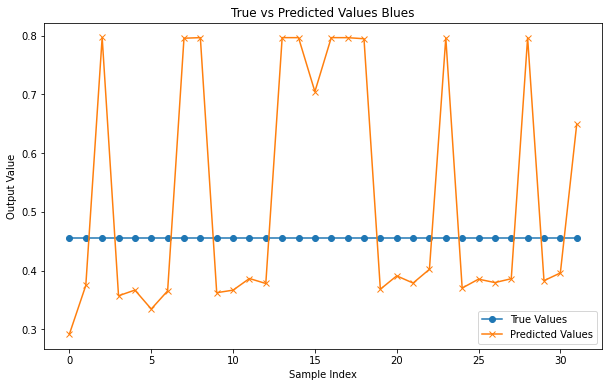

In [22]:
import matplotlib.pyplot as plt


# Make predictions
predictions = model.predict(X_val_truncated)

# Plotting
plt.figure(figsize=(10, 6))

# Plot true values
plt.plot(normalized_array[:32], label='True Values', marker='o')

# Plot predicted values
plt.plot(predictions, label='Predicted Values', marker='x')

plt.title('True vs Predicted Values Blues')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.legend()
plt.show()


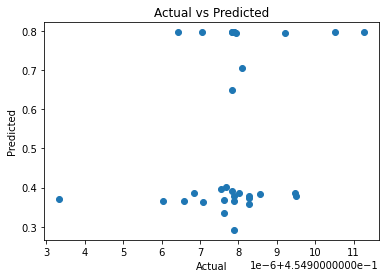

In [21]:
plt.scatter(y_val_truncated, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [19]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics
mae = mean_absolute_error(normalized_array[:32], predictions)
mse = mean_squared_error(normalized_array[:32], predictions)
rmse = np.sqrt(mse)

# Print metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.1728461
Mean Squared Error (MSE): 0.04426413
Root Mean Squared Error (RMSE): 0.21039042


In [20]:
# Calculate mean of true values
mean_true_values = np.mean(normalized_array[:32])

# Calculate MAE as a fraction of the mean of true values
mae_percentage = (mae / mean_true_values) * 100

# Print percentage error
print("Mean Absolute Error (MAE) as a percentage:", mae_percentage, "%")


Mean Absolute Error (MAE) as a percentage: 37.995845079422 %


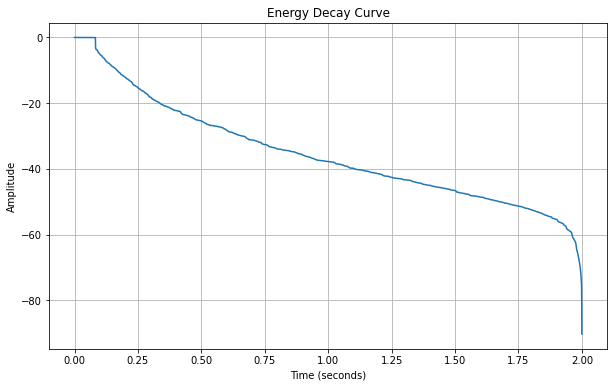

In [7]:
# Sample RIR data (replace with your actual RIR data)
row_index = 5
value = df.iloc[row_index]['Q']
rir_data = value
# Create a time axis (assuming uniform time intervals)
sampling_rate = 48000  # Adjust to match your data's sampling rate
time = np.arange(0, len(rir_data)) / sampling_rate

edc = np.cumsum(np.square(rir_data[::-1]))[::-1]
edc = 10 * np.log10(edc)
edc = edc-edc[0]


# Plot the RIR
plt.figure(figsize=(10, 6))
plt.plot(time, edc)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Energy Decay Curve')
plt.grid(True)

plt.show()

Peak Index Value: 3949
Peak Value: [0.02946726]
Threshold Value: 0.0029467264190316204
Threshold Index: 3945


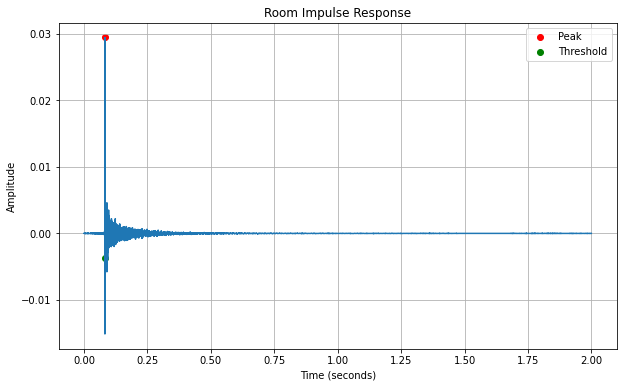

In [13]:

# Create a time axis (assuming uniform time intervals)
sampling_rate = 48000
time = np.arange(0, len(rir_data)) / sampling_rate

# Plot the RIR
plt.figure(figsize=(10, 6))
plt.plot(time, rir_data)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Room Impulse Response')
plt.grid(True)

# Approach 1: Find the peak
peak_index = np.argmax(np.abs(rir_data))
# Get the value of the peak using the index
peak_value = rir_data[peak_index]
plt.scatter(time[peak_index], rir_data[peak_index], c='red', marker='o', label='Peak')
print(f'Peak Index Value: {peak_index}')
print(f'Peak Value: {peak_value}')

# Approach 2: Thresholding
# Set threshold to 10% of the maximum amplitude
threshold = 0.1 * np.max(np.abs(rir_data))
threshold_indices = np.where(np.abs(rir_data) > threshold)[0]
threshold_index = threshold_indices[0] if len(threshold_indices) > 0 else None
if threshold_index is not None:
    plt.scatter(time[threshold_index], rir_data[threshold_index], c='green', marker='o', label='Threshold')
    print(f'Threshold Value: {threshold}')
    print(f'Threshold Index: {threshold_index}')

plt.legend()
plt.show()


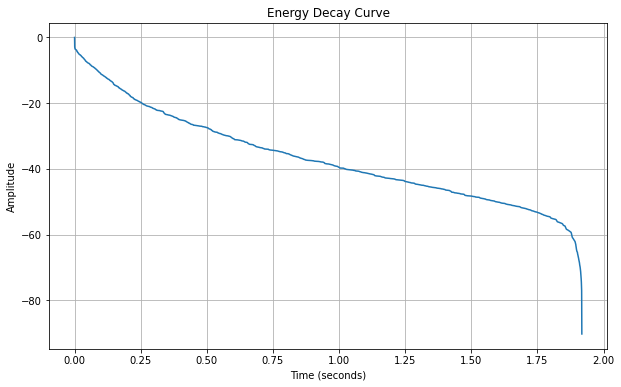

In [14]:
# Sample RIR data (replace with your actual RIR data)
row_index = 5
value = df.iloc[row_index]['Q']
rir_data = value

# Create a time axis (assuming uniform time intervals)
sampling_rate = 48000  # Adjust to match your data's sampling rate
time = np.arange(0, len(rir_data)) / sampling_rate

# Approach 1: Find the peak
# peak_index = np.argmax(np.abs(rir_data))
# peak_value = rir_data[peak_index]

# Approach 2: Thresholding
threshold = 0.1 * np.max(np.abs(rir_data))
threshold_indices = np.where(np.abs(rir_data) > threshold)[0]
threshold_index = threshold_indices[0] if len(threshold_indices) > 0 else 0  # Default to start if no threshold found

# Calculate EDC from the identified starting point
rir_data_trimmed = rir_data[threshold_index:]
edc = np.cumsum(np.square(rir_data_trimmed[::-1]))[::-1]
edc = 10 * np.log10(edc)
edc = edc - edc[0]

# Create time axis for the trimmed EDC
time_trimmed = np.arange(0, len(rir_data_trimmed)) / sampling_rate

# Plot the EDC starting from the identified point
plt.figure(figsize=(10, 6))
plt.plot(time_trimmed, edc)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Energy Decay Curve')
plt.grid(True)
plt.show()


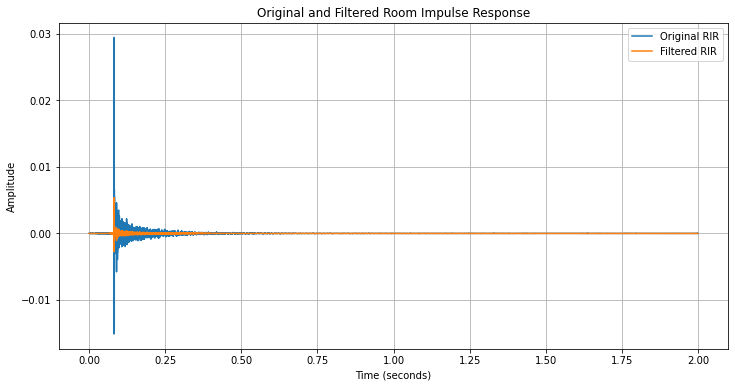

In [15]:
from scipy.signal import butter, sosfreqz, sosfilt

# Define filter parameters
order = 3  # Butterworth filter order
fs = sampling_rate  # Sampling rate, same as defined earlier
low_cutoff = 31.5  # Low cutoff frequency in Hz
high_cutoff = 12500.0  # High cutoff frequency in Hz

# Design a Butterworth filter
sos = butter(order, [low_cutoff, high_cutoff], btype='band', fs=fs, output='sos')

# Apply the filter to the RIR data
filtered_rir_data = sosfilt(sos, rir_data)

# Create a time axis for the filtered data
filtered_time = np.arange(0, len(filtered_rir_data)) / sampling_rate

# Plot the original and filtered RIR
plt.figure(figsize=(12, 6))
plt.plot(time, rir_data, label='Original RIR')
plt.plot(filtered_time, filtered_rir_data, label='Filtered RIR')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original and Filtered Room Impulse Response')
plt.legend()
plt.grid(True)
plt.show()


The value of the intersection point with the noise floor is: -63.35658315669676 dB


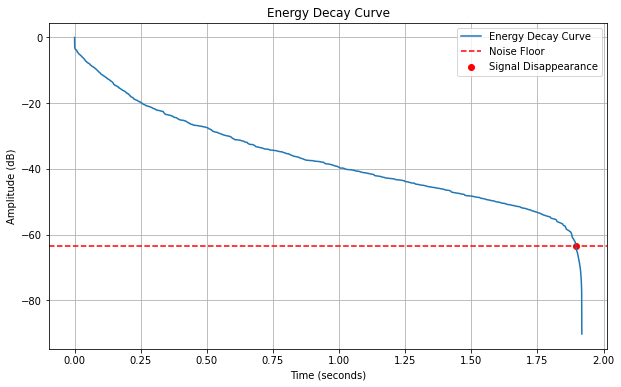

In [16]:
# Calculate EDC from the identified starting point
rir_data_trimmed = filtered_rir_data[threshold_index:]
edc = np.cumsum(np.square(rir_data_trimmed[::-1]))[::-1]
edc = 10 * np.log10(edc)
edc = edc - edc[0]

# Create time axis for the trimmed EDC
time_trimmed = np.arange(0, len(rir_data_trimmed)) / sampling_rate

# Plot the EDC
plt.figure(figsize=(10, 6))
plt.plot(time_trimmed, edc, label='Energy Decay Curve')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (dB)')
plt.title('Energy Decay Curve')
plt.grid(True)

# 1. Compute the Noise Floor (Assume the first 10% of data is dominated by noise)
noise_segment = rir_data[:int(0.1 * len(filtered_rir_data))]
noise_floor_rms = np.sqrt(np.mean(np.square(noise_segment)))
plt.axhline(y=10 * np.log10(noise_floor_rms ** 2), color='r', linestyle='--', label='Noise Floor')  # Plotting noise floor

# 2. Identify the Point Where Signal Disappears (Find the intersection)
intersection_indices = np.where(edc <= 10 * np.log10(noise_floor_rms ** 2))[0]
if intersection_indices.size > 0:
    intersection_index = intersection_indices[0]
    intersection_value = edc[intersection_index]
    plt.scatter(time[intersection_index], intersection_value, c='red', marker='o', label='Signal Disappearance')
    
    # Print the value of the intersection point
    print(f"The value of the intersection point with the noise floor is: {intersection_value} dB")


plt.legend()
plt.show()

Peak Index Value: 3949
Peak Value: 0.0294672641903162
Threshold Value: 0.0029467264190316204
Threshold Index: 3945


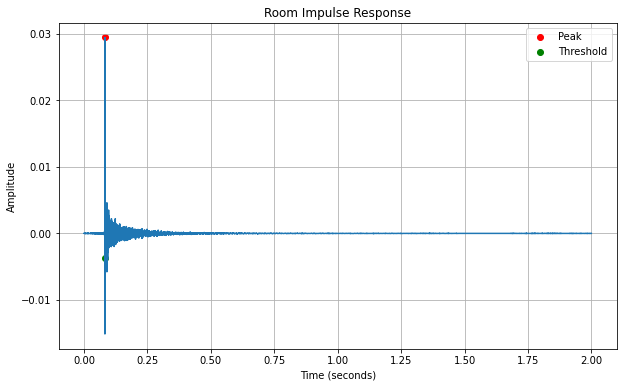

In [17]:
# Ensure rir_data is a 1-D array
filtered_rir_data = np.ravel(rir_data)

# Create a time axis (assuming uniform time intervals)
sampling_rate = 48000
time = np.arange(0, len(filtered_rir_data)) / sampling_rate

# Plot the RIR
plt.figure(figsize=(10, 6))
plt.plot(time, filtered_rir_data)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Room Impulse Response')
plt.grid(True)

# Approach 1: Find the peak
peak_index = np.argmax(np.abs(filtered_rir_data))
# Get the value of the peak using the index
peak_value = filtered_rir_data[peak_index]
plt.scatter(time[peak_index], filtered_rir_data[peak_index], c='red', marker='o', label='Peak')
print(f'Peak Index Value: {peak_index}')
print(f'Peak Value: {peak_value}')

# Approach 2: Thresholding
# Set threshold to 10% of the maximum amplitude
threshold = 0.1 * np.max(np.abs(filtered_rir_data))
threshold_indices = np.where(np.abs(filtered_rir_data) > threshold)[0]
threshold_index = threshold_indices[0] if len(threshold_indices) > 0 else None
if threshold_index is not None:
    plt.scatter(time[threshold_index], filtered_rir_data[threshold_index], c='green', marker='o', label='Threshold')
    print(f'Threshold Value: {threshold}')
    print(f'Threshold Index: {threshold_index}')

plt.legend()
plt.show()

The value of the intersection point with the noise floor is: -63.356590270996094 dB


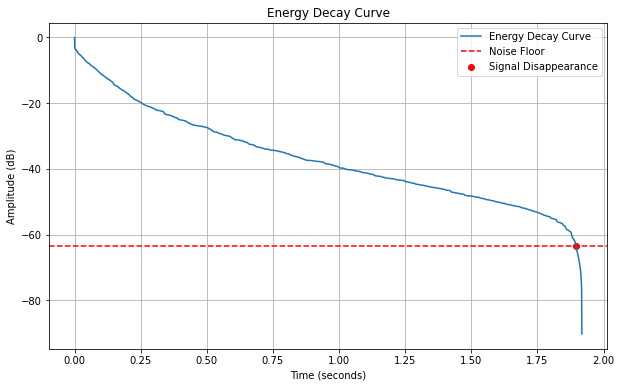

In [18]:
# Calculate EDC from the identified starting point
rir_data_trimmed = filtered_rir_data[threshold_index:]
edc = np.cumsum(np.square(rir_data_trimmed[::-1]))[::-1]
edc = 10 * np.log10(edc)
edc = edc - edc[0]

# Create time axis for the trimmed EDC
time_trimmed = np.arange(0, len(rir_data_trimmed)) / sampling_rate

# Plot the EDC
plt.figure(figsize=(10, 6))
plt.plot(time_trimmed, edc, label='Energy Decay Curve')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (dB)')
plt.title('Energy Decay Curve')
plt.grid(True)

# 1. Compute the Noise Floor (Assume the first 10% of data is dominated by noise)
noise_segment = rir_data[:int(0.1 * len(filtered_rir_data))]
noise_floor_rms = np.sqrt(np.mean(np.square(noise_segment)))
plt.axhline(y=10 * np.log10(noise_floor_rms ** 2), color='r', linestyle='--', label='Noise Floor')  # Plotting noise floor

# 2. Identify the Point Where Signal Disappears (Find the intersection)
intersection_indices = np.where(edc <= 10 * np.log10(noise_floor_rms ** 2))[0]
if intersection_indices.size > 0:
    intersection_index = intersection_indices[0]
    intersection_value = edc[intersection_index]
    plt.scatter(time[intersection_index], intersection_value, c='red', marker='o', label='Signal Disappearance')
    
    # Print the value of the intersection point
    print(f"The value of the intersection point with the noise floor is: {intersection_value} dB")


plt.legend()
plt.show()

Value of the first non-zero point: 3.954950443585403e-06
Value of the first peak: 3.3961130156967556e-06
Absolute value of the first peak: 3.3961130156967556e-06
Duration of the impulse response: 1.9999791666666666 seconds


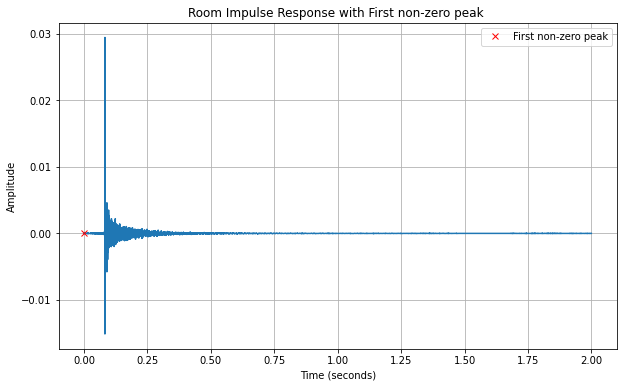

In [19]:
# Ensure rir_data is a 1-D array
rir_data = np.ravel(filtered_rir_data)

# Find peaks in the RIR data
peaks, _ = find_peaks(rir_data)

# Find the start index of the first non-zero point
start_index = np.argmax(np.abs(rir_data) > 0)
# Print the start index and value of the first non-zero point
print(f"Value of the first non-zero point: {rir_data[start_index]}")

# Print the value of the first peak and its absolute value
first_peak_value = rir_data[peaks[0]]
print(f"Value of the first peak: {first_peak_value}")
abs_first_peak_value = abs(first_peak_value)
print(f"Absolute value of the first peak: {abs_first_peak_value}")

# Finding out the time duration of impulse response
duration_seconds = time[-1] - time[0]
print(f"Duration of the impulse response: {duration_seconds} seconds")

# Plot the RIR with identified peaks
plt.figure(figsize=(10, 6))
plt.plot(time, rir_data)
plt.plot(time[peaks[0]], rir_data[peaks[0]], 'x', color='red', label='First non-zero peak')
plt.plot(time[start_index], rir_data[start_index])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Room Impulse Response with First non-zero peak ')
plt.legend()
plt.grid(True)
plt.show()

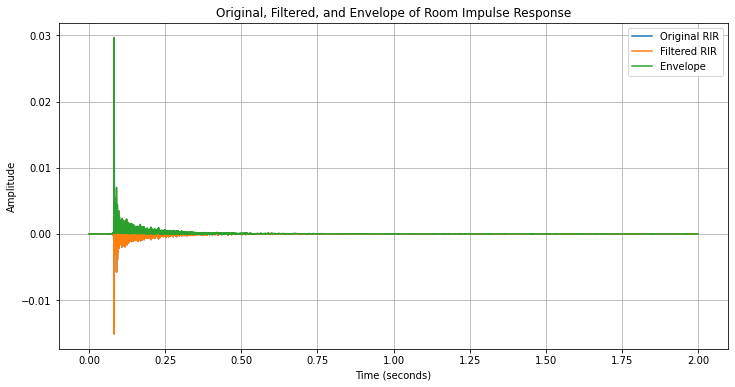

In [20]:
# Apply the Hilbert Transform to the filtered RIR data
analytic_signal = hilbert(filtered_rir_data)

# Extract the envelope of the analytic signal
envelope = np.abs(analytic_signal)

# Extract the instantaneous phase of the analytic signal
instantaneous_phase = np.angle(analytic_signal)

# Plot the original, filtered, and envelope of the RIR
plt.figure(figsize=(12, 6))
plt.plot(time, rir_data, label='Original RIR')
plt.plot(filtered_time, filtered_rir_data, label='Filtered RIR')
plt.plot(filtered_time, envelope, label='Envelope')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original, Filtered, and Envelope of Room Impulse Response')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22424\3259167574.py:26: RuntimeWarning: invalid value encountered in log10
  rir_data_dB = 20 * np.log10(rir_data)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_22424\3259167574.py:27: RuntimeWarning: invalid value encountered in log10
  filtered_rir_data_dB = 20 * np.log10(filtered_rir_data)


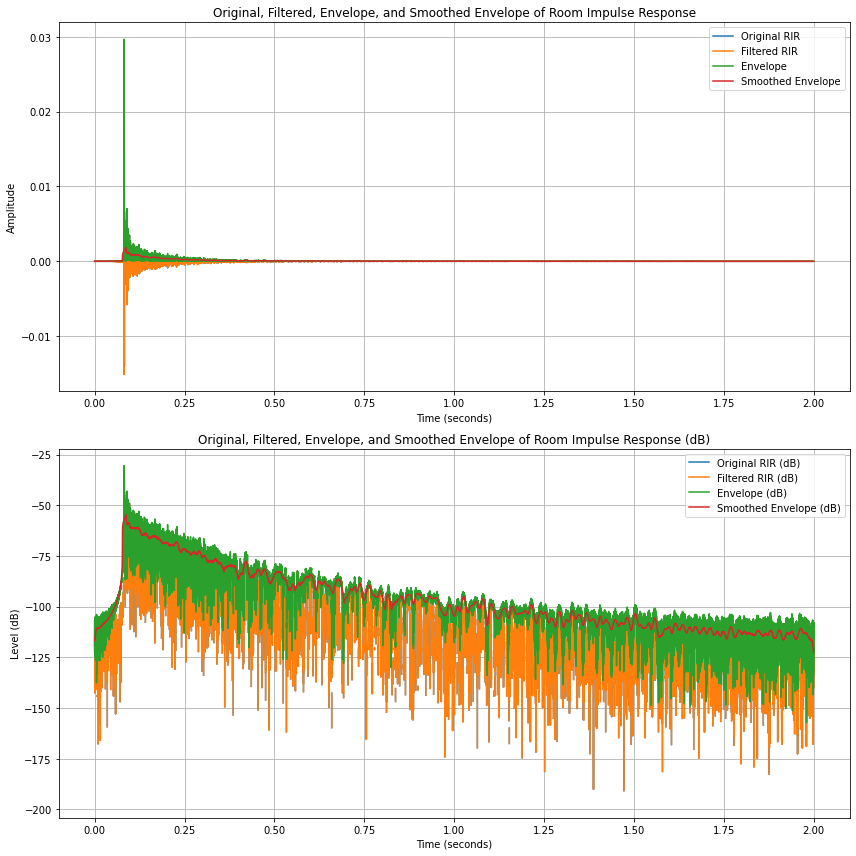

In [21]:
# Apply the Hilbert Transform to the filtered RIR data
analytic_signal = hilbert(filtered_rir_data)

# Extract the envelope of the analytic signal
envelope = np.abs(analytic_signal)

# Extract the instantaneous phase of the analytic signal
instantaneous_phase = np.angle(analytic_signal)

# Define the length of the moving average filter
M = 501  # Adjust the length as needed

# Create the moving average filter kernel
ma_kernel = np.ones(M) / M

# Ensure envelope and ma_kernel are 1-dimensional arrays
envelope = np.squeeze(envelope)
ma_kernel = np.squeeze(ma_kernel)

# Apply the moving average filter to the envelope
smoothed_envelope = np.convolve(envelope, ma_kernel, mode='same')

# Convert amplitudes to decibels
envelope_dB = 20 * np.log10(envelope)
smoothed_envelope_dB = 20 * np.log10(smoothed_envelope)
rir_data_dB = 20 * np.log10(rir_data)
filtered_rir_data_dB = 20 * np.log10(filtered_rir_data)

# Plot both sets of graphs in subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plot the original, filtered, envelope, and smoothed envelope of the RIR
axes[0].plot(time, rir_data, label='Original RIR')
axes[0].plot(filtered_time, filtered_rir_data, label='Filtered RIR')
axes[0].plot(filtered_time, envelope, label='Envelope')
axes[0].plot(filtered_time, smoothed_envelope, label='Smoothed Envelope')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Original, Filtered, Envelope, and Smoothed Envelope of Room Impulse Response')
axes[0].legend()
axes[0].grid(True)

# Plot the original, filtered, envelope, and smoothed envelope in dB
axes[1].plot(time, rir_data_dB, label='Original RIR (dB)')
axes[1].plot(filtered_time, filtered_rir_data_dB, label='Filtered RIR (dB)')
axes[1].plot(filtered_time, envelope_dB, label='Envelope (dB)')
axes[1].plot(filtered_time, smoothed_envelope_dB, label='Smoothed Envelope (dB)')
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('Level (dB)')
axes[1].set_title('Original, Filtered, Envelope, and Smoothed Envelope of Room Impulse Response (dB)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


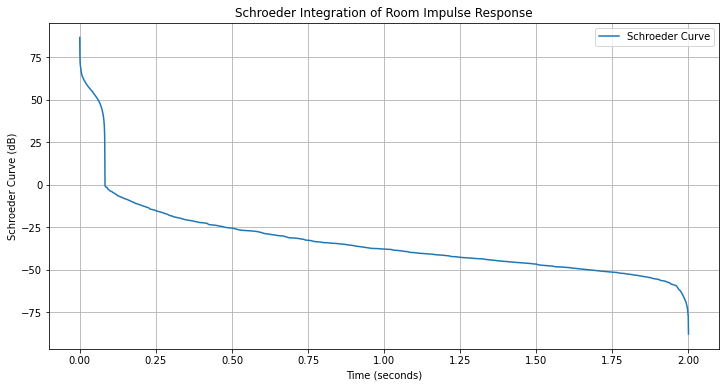

In [22]:
# Calculate the squared envelope
squared_envelope = np.square(envelope)

# Calculate the integrals
integral_t_to_inf = np.cumsum(squared_envelope[::-1])[::-1]
total_integral = np.cumsum(squared_envelope)

# Calculate the Schroeder curve
schroeder_curve = 10 * np.log10(integral_t_to_inf / total_integral)

# Plot the Schroeder curve
plt.figure(figsize=(12, 6))
plt.plot(filtered_time, schroeder_curve, label='Schroeder Curve')
plt.xlabel('Time (seconds)')
plt.ylabel('Schroeder Curve (dB)')
plt.title('Schroeder Integration of Room Impulse Response')
plt.legend()
plt.grid(True)
plt.show()

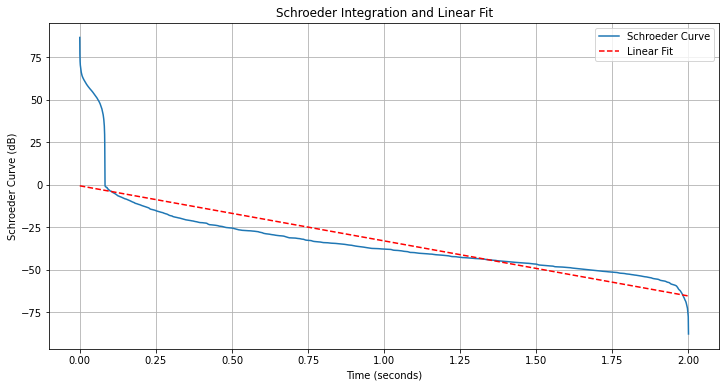

Reverberation Time (RT): 1.851551148925018 seconds
Correlation Coefficient (r-value): -0.8246353220200116


In [23]:
# Perform linear interpolation to find A and B coefficients
A, B, r_value, _, _ = linregress(filtered_time, schroeder_curve)

# Calculate RT from the slope coefficient A
RT = -60 / A

# Plot the Schroeder curve and linear fit
plt.figure(figsize=(12, 6))
plt.plot(filtered_time, schroeder_curve, label='Schroeder Curve')
plt.plot(filtered_time, A * filtered_time + B, label='Linear Fit', linestyle='--', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Schroeder Curve (dB)')
plt.title('Schroeder Integration and Linear Fit')
plt.legend()
plt.grid(True)
plt.show()

# Print RT and correlation coefficient
print(f'Reverberation Time (RT): {RT} seconds')
print(f'Correlation Coefficient (r-value): {r_value}')

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.stats import linregress
# Given RIR data
rir_data = value  # This is your impulse response data
# Ensure rir_data is a 1-D array
rir_data = np.ravel(rir_data)

# Create a time axis
sampling_rate = 48000  # Sampling frequency
time = np.arange(0, len(rir_data)) / sampling_rate

# Hilbert Transform to compute the analytic signal
analytic_signal = hilbert(rir_data)
envelope = np.abs(analytic_signal)

# Moving Average Smoothing (Choose an appropriate M value)
M = 5001
ma_kernel = np.ones(M) / M
smoothed_envelope = np.convolve(envelope, ma_kernel, mode='same')

# Convert amplitudes to decibels
E_t = 20 * np.log10(smoothed_envelope / np.max(smoothed_envelope))

# Schroeder Integration
integral_t_to_inf = np.cumsum(smoothed_envelope[::-1])[::-1]
total_integral = np.cumsum(smoothed_envelope)
L_t = 10 * np.log10(integral_t_to_inf / total_integral)

# Linear Interpolation and Calculation of Parameters
# For EDT
EDT_upper, EDT_lower = find_intersection_range(time, L_t, 0, -10)
EDT = abs(EDT_upper - EDT_lower)

# For T10
T10_upper, T10_lower = find_intersection_range(time, L_t, -5, -15)
T10 = abs(T10_upper - T10_lower)

# For T20
T20_upper, T20_lower = find_intersection_range(time, L_t, -5, -25)
T20 = abs(T20_upper - T20_lower)

# For T30
T30_upper, T30_lower = find_intersection_range(time, L_t, -5, -35)
T30 = abs(T30_upper - T30_lower)

# Print the results
print(f'Early Decay Time (EDT): {EDT} seconds')
print(f'T10: {T10} seconds')
print(f'T20: {T20} seconds')
print(f'T30: {T30} seconds')

# Plotting
plt.figure(figsize=(14, 8))

# Plot RIR, Envelope, and Schroeder curve
plt.subplot(3, 1, 1)
plt.plot(time, rir_data, label='RIR')
plt.title('Room Impulse Response')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, E_t, label='E(t) in dB')
plt.title('Energy Curve E(t)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, L_t, label='L(t) in dB')
plt.title('Schroeder Integration L(t)')
plt.xlabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'find_intersection_range' is not defined

In [25]:
from scipy.stats import linregress

def calculate_reverb_parameters(schroeder_curve, time_axis, upper_dB, lower_dB):
    """Calculate the reverberation parameters using linear regression within the specified dB range."""
    # Find indices within the specified dB range
    indices = np.where((schroeder_curve >= upper_dB) & (schroeder_curve <= lower_dB))[0]
    
    if len(indices) < 2:
        return None, None, None
    
    # Perform linear regression
    slope, intercept, r_value, _, _ = linregress(time_axis[indices], schroeder_curve[indices])
    
    # Calculate time parameters
    if slope != 0:
        decay_time = (lower_dB - intercept) / slope
    else:
        decay_time = None
    
    return slope, decay_time, r_value

# Calculate parameters using linear fit
edt_slope, edt_time, edt_r_value = calculate_reverb_parameters(schroeder_curve, filtered_time, 0, -10)
t10_slope, t10_time, t10_r_value = calculate_reverb_parameters(schroeder_curve, filtered_time, -5, -15)
t20_slope, t20_time, t20_r_value = calculate_reverb_parameters(schroeder_curve, filtered_time, -5, -25)
t30_slope, t30_time, t30_r_value = calculate_reverb_parameters(schroeder_curve, filtered_time, -5, -35)

# Print results
print(f"EDT (Early Decay Time): {edt_time} seconds, r-value: {edt_r_value}")
print(f"T10: {t10_time} seconds, r-value: {t10_r_value}")
print(f"T20: {t20_time} seconds, r-value: {t20_r_value}")
print(f"T30: {t30_time} seconds, r-value: {t30_r_value}")





EDT (Early Decay Time): None seconds, r-value: None
T10: None seconds, r-value: None
T20: None seconds, r-value: None
T30: None seconds, r-value: None


In [26]:
# Function to calculate intersection point with a specified level
def find_intersection(time, curve, level):
    for i in range(len(time) - 1):
        if (curve[i] >= level and curve[i + 1] < level) or (curve[i] <= level and curve[i + 1] > level):
            # Linear interpolation to find the intersection point
            t_intersect = time[i] + (level - curve[i]) / (curve[i + 1] - curve[i]) * (time[i + 1] - time[i])
            return t_intersect
    return None

# Function to calculate intersection point with a specified upper and lower level
def find_intersection_range(time, curve, upper_limit, lower_limit):
    upper_intersect = find_intersection(time, curve, upper_limit)
    lower_intersect = find_intersection(time, curve, lower_limit)
    return upper_intersect, lower_intersect

# Calculate EDT, T10, T20, and T30 with specified upper and lower limits
EDT_upper, EDT_lower = find_intersection_range(time, A * time + B, 0, -10)
T10_upper, T10_lower = find_intersection_range(time, A * time + B, -5, -15)
T20_upper, T20_lower = find_intersection_range(time, A * time + B, -5, -25)
T30_upper, T30_lower = find_intersection_range(time, A * time + B, -5, -35)

# Print results
print(f'Early Decay Time (EDT): {abs(EDT_upper - EDT_lower)} seconds')
print(f'T10: {abs(T10_upper - T10_lower)} seconds')
print(f'T20: {abs(T20_upper - T20_lower)} seconds')
print(f'T30: {abs(T30_upper - T30_lower)} seconds')



TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

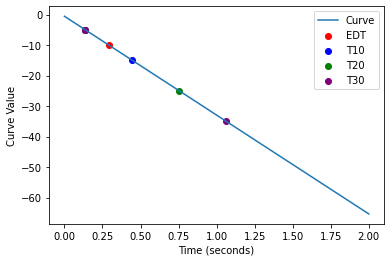

In [27]:
# Plot the curves
plt.plot(time, A * time + B, label='Curve')

# Plot the intersection points
plt.scatter([EDT_upper, EDT_lower], [0, -10], color='red', label='EDT')
plt.scatter([T10_upper, T10_lower], [-5, -15], color='blue', label='T10')
plt.scatter([T20_upper, T20_lower], [-5, -25], color='green', label='T20')
plt.scatter([T30_upper, T30_lower], [-5, -35], color='purple', label='T30')

# Add labels and legend
plt.xlabel('Time (seconds)')
plt.ylabel('Curve Value')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Calculate the length of the impulse response
duration_seconds = time[-1] - time[0]
# Calculate the starting index of the last 10% of the impulse response
last_10_percent_start = int(0.9 * len(filtered_rir_data))

# Extract the last 10% of the impulse response data
last_10_percent_data = rir_data[last_10_percent_start:]

# Estimate the noise level using the last 10% of the impulse response
noise_level = np.mean(np.abs(last_10_percent_data))

print(f"Noise Level: {noise_level}")


Noise Level: 6.754726944790712e-07


In [ ]:
import numpy as np
from scipy.signal import find_peaks


# (2) Estimate background noise level using last 10% of the tail
tail_percentage = 0.1
tail_start_index = int((1 - tail_percentage) * len(rir_data))
background_noise_level = np.mean(rir_data[tail_start_index:])

# (3) Estimate slope of decay from 0 dB to 5 dB above noise level
# Find the index corresponding to 5 dB above the noise level
threshold_dB = 5
threshold_amplitude = 10 ** (threshold_dB / 20)
above_threshold_indices = np.where(rir_data > threshold_amplitude)[0]
if len(above_threshold_indices) > 0:
    index_5dB_above_noise = above_threshold_indices[0]
    if index_5dB_above_noise == 0:
        slope = 0  # Avoid division by zero
    else:
        slope, intercept = np.polyfit(time[:index_5dB_above_noise], rir_data[:index_5dB_above_noise], deg=1)
else:
    slope = 0  # Handle the case when there are no points above the threshold

# (5) Find new local time interval length using 5 intervals per 10 dB decay
num_intervals = 5
interval_length = int((10 / slope) / num_intervals) if slope != 0 else 1  # Avoid division by zero

# (7) Estimate background noise level: Allow a safety margin from crosspoint corresponding to 10 dB decay
crosspoint_margin_dB = 10
crosspoint_margin_amplitude = 10 ** (crosspoint_margin_dB / 20)
crosspoint_index = np.argmin(np.abs(rir_data - background_noise_level - crosspoint_margin_amplitude))
background_noise_level = np.mean(rir_data[crosspoint_index:])

# (8) Estimate late decay slope: A dynamic range of at least 20 dB is evaluated.
dynamic_range_dB = 20
dynamic_range_amplitude = 10 ** (dynamic_range_dB / 20)
above_dynamic_range_indices = np.where(rir_data > background_noise_level + dynamic_range_amplitude)[0]
if len(above_dynamic_range_indices) > 0:
    late_decay_slope, intercept = np.polyfit(
        time[above_dynamic_range_indices], rir_data[above_dynamic_range_indices], deg=1
    )
else:
    late_decay_slope = 0  # Handle the case when there are no points above the dynamic range

# Print or use the results as needed
print(f"Background Noise Level: {background_noise_level}")
print(f"Slope of Decay (0 to 5 dB above noise level): {slope}")
print(f"Late Decay Slope (25 dB to 5 dB above noise level): {late_decay_slope}")


Background Noise Level: 3.650863042360978e-08
Slope of Decay (0 to 5 dB above noise level): 0
Late Decay Slope (25 dB to 5 dB above noise level): 0


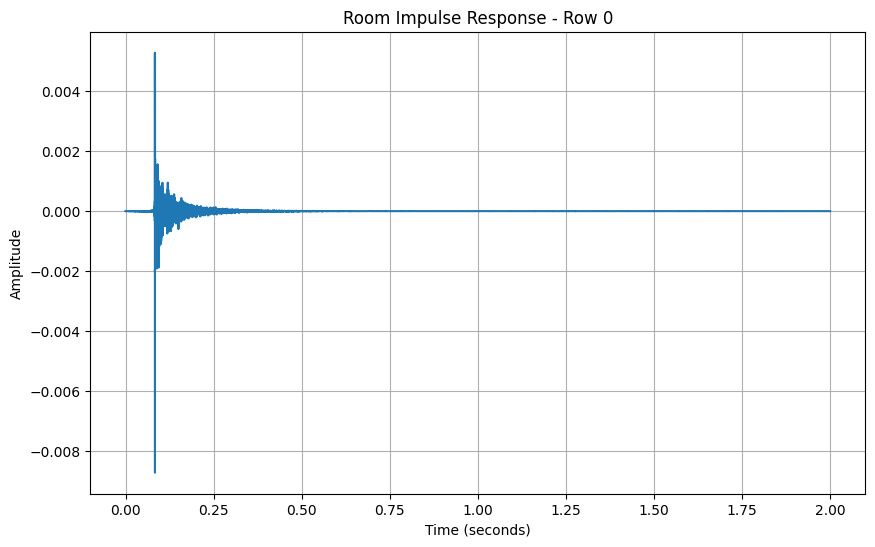

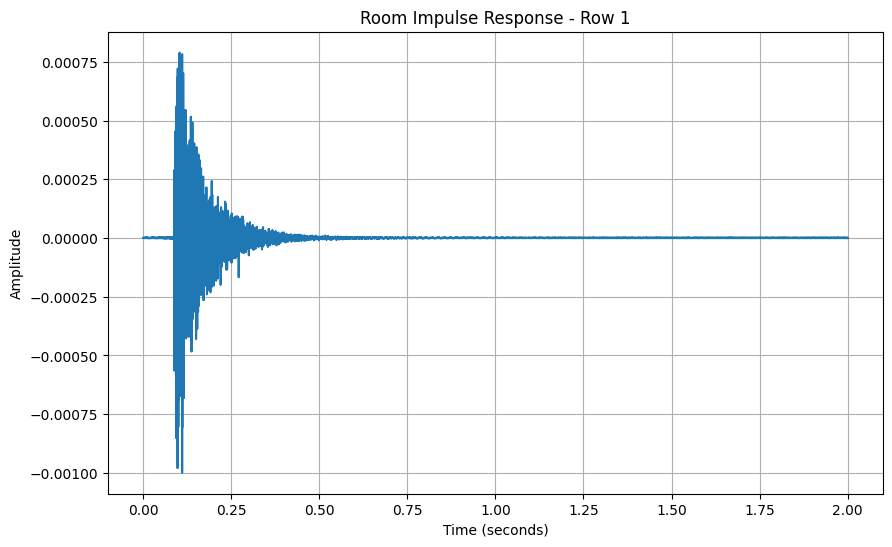

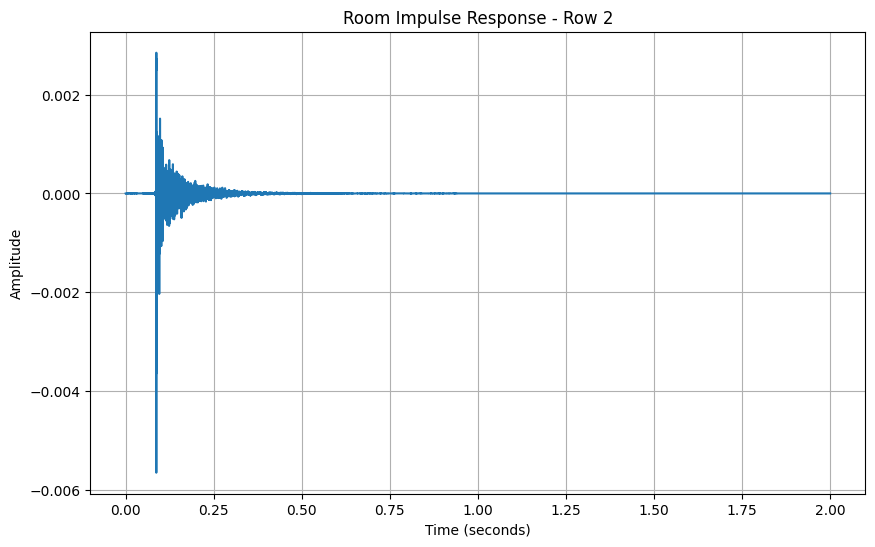

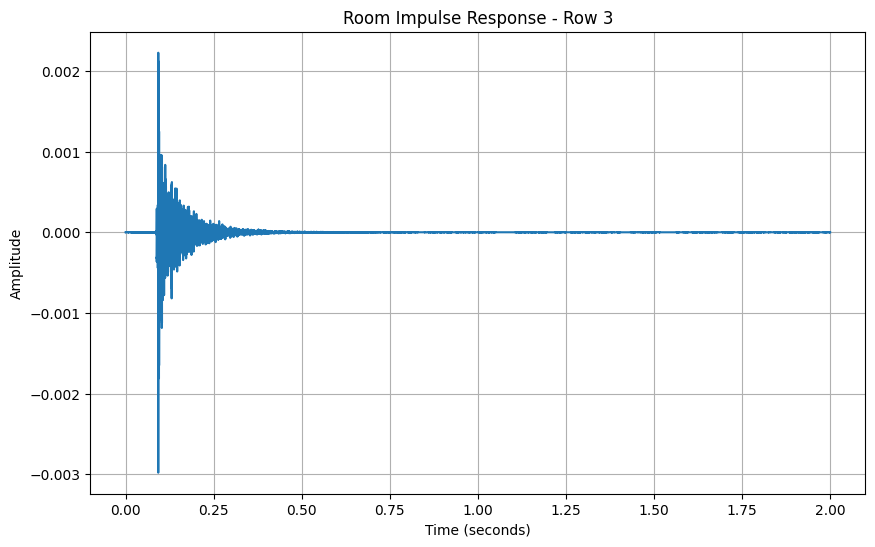

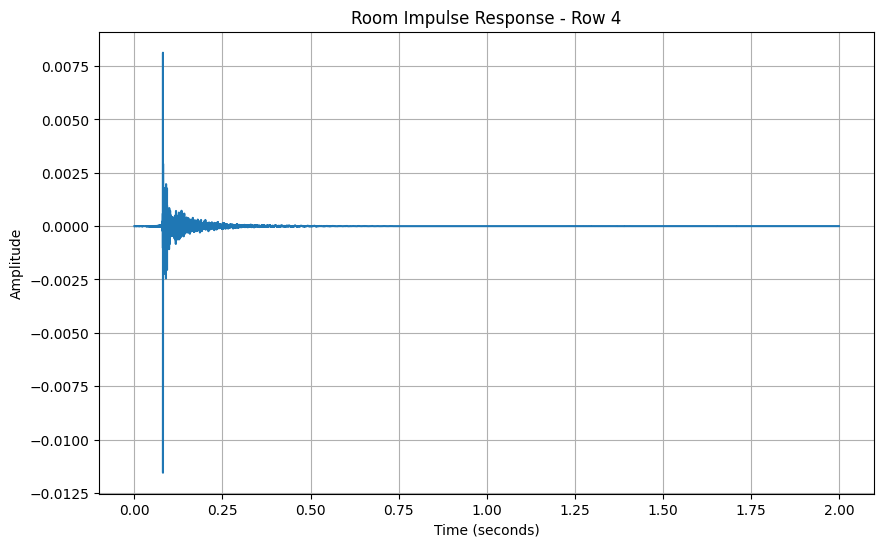

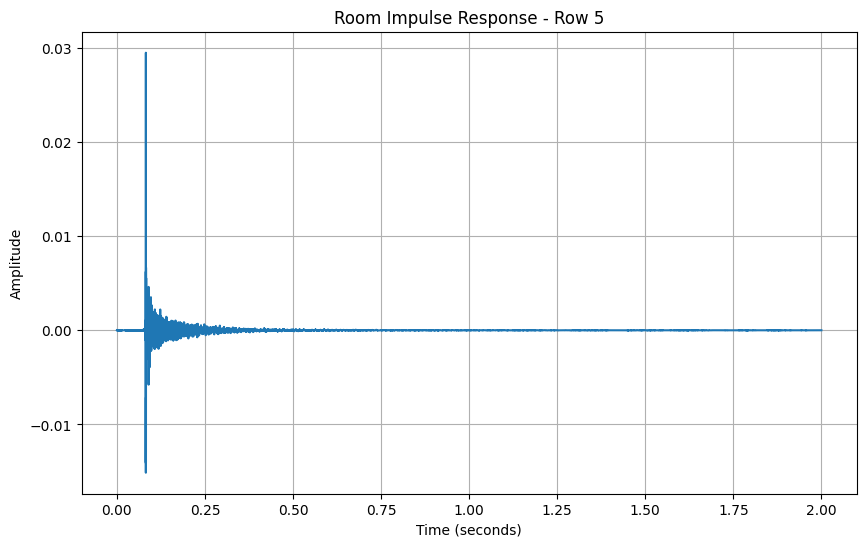

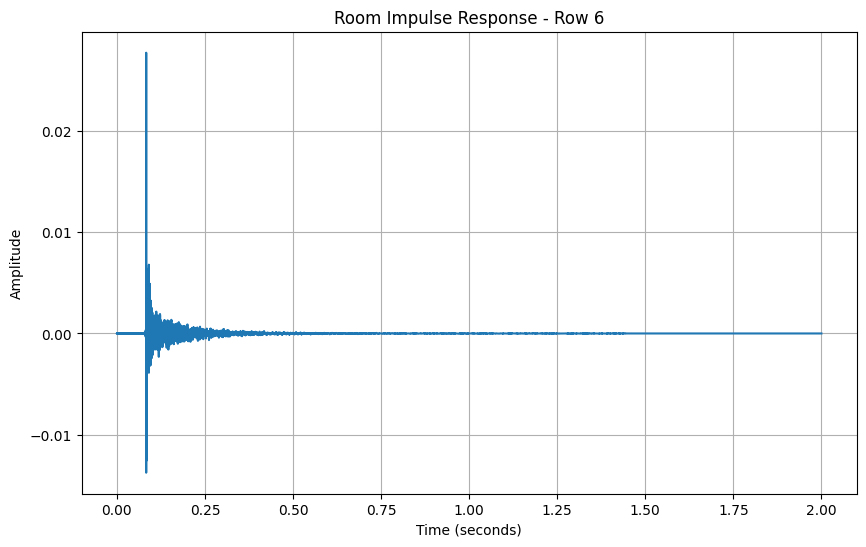

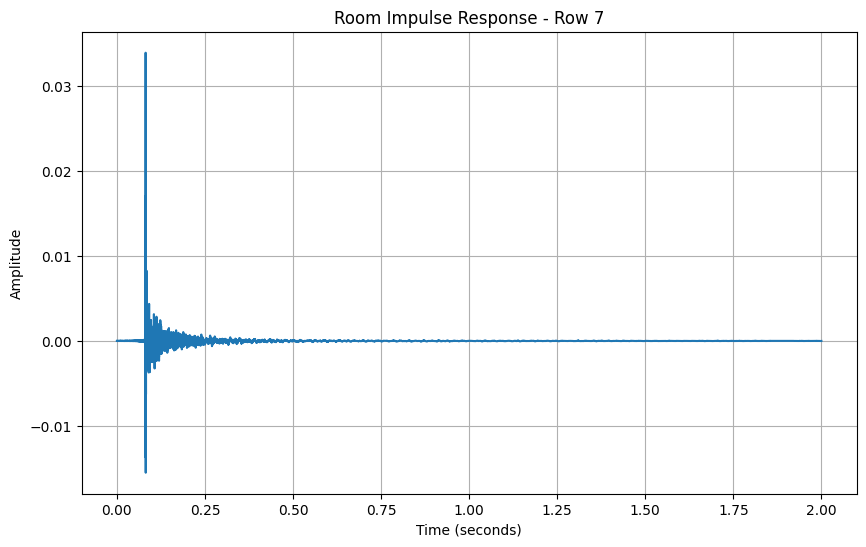

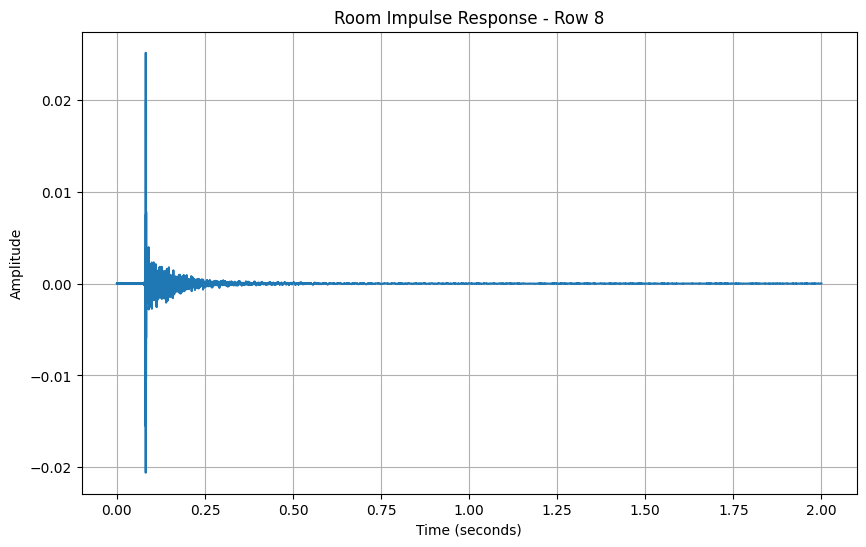

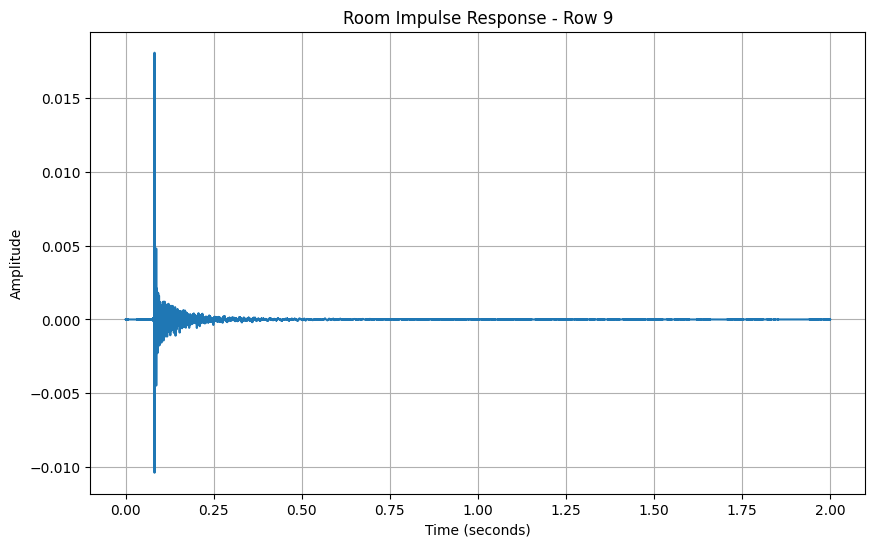

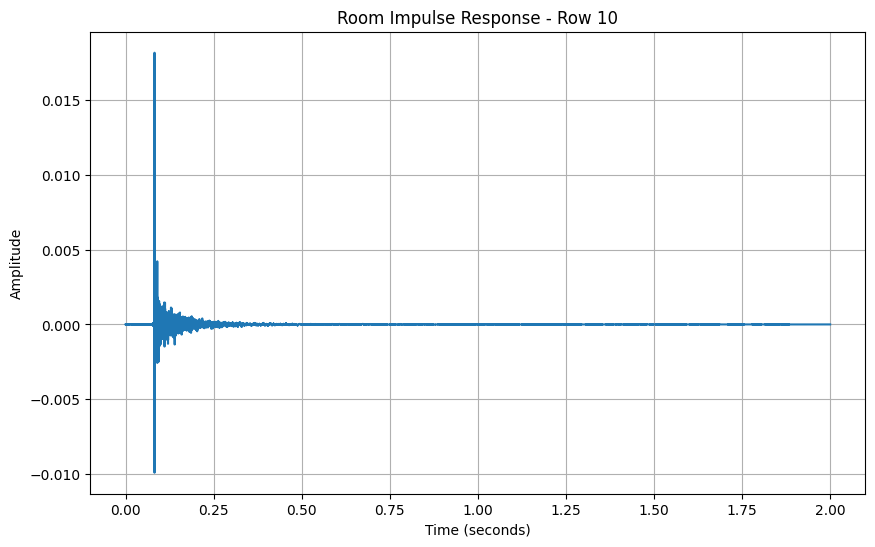

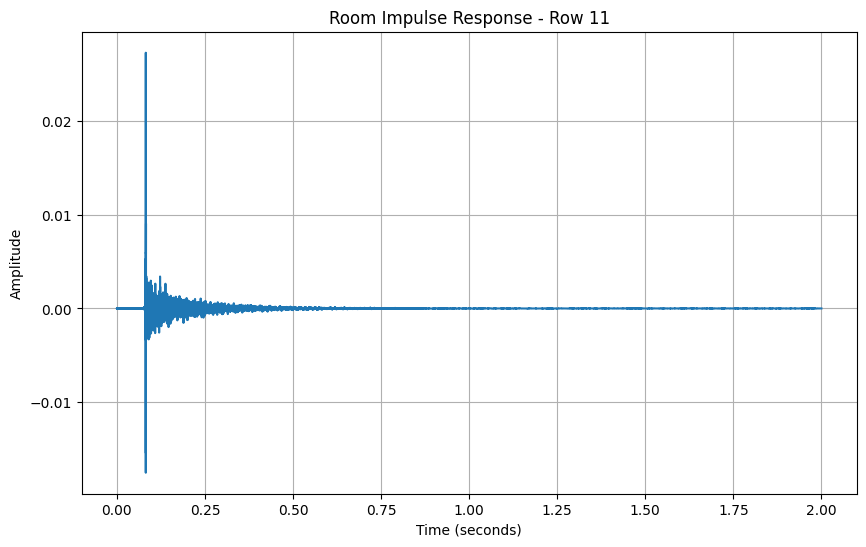

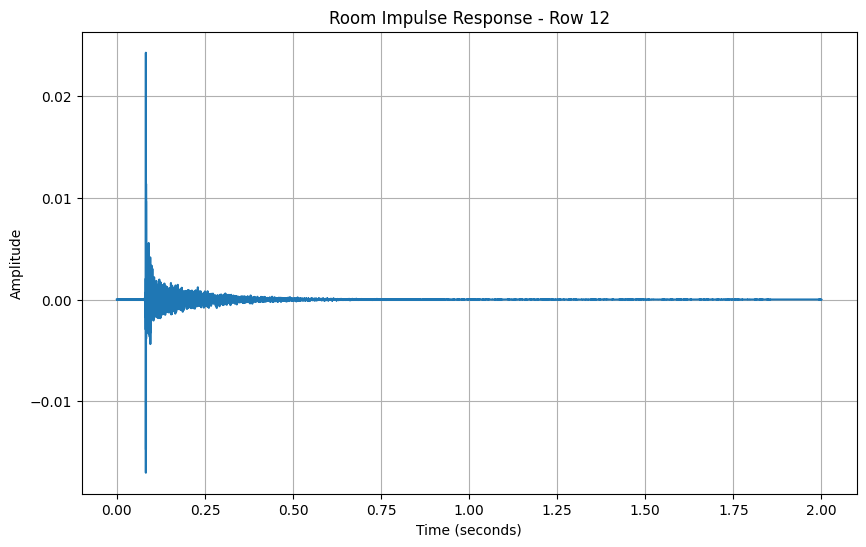

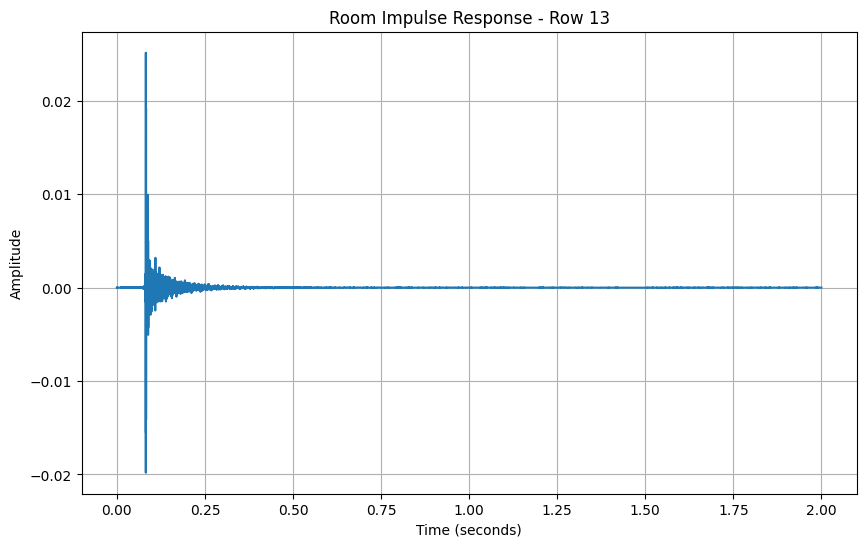

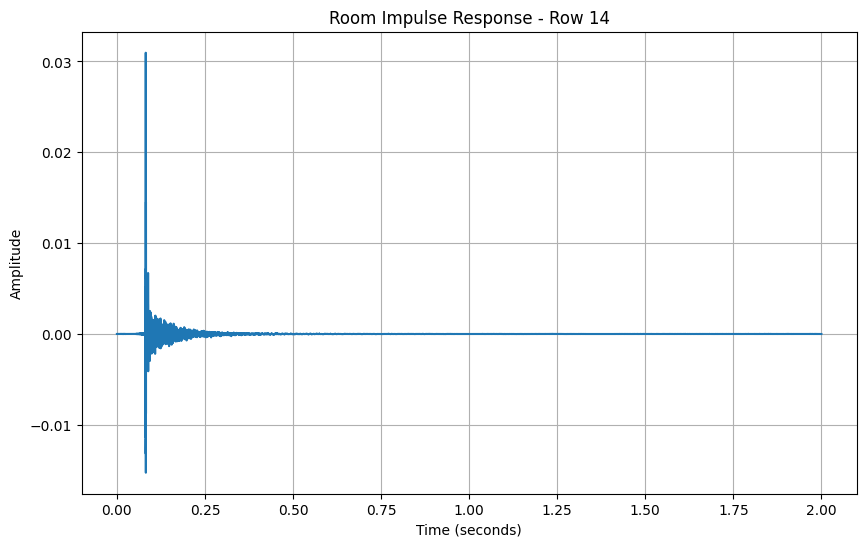

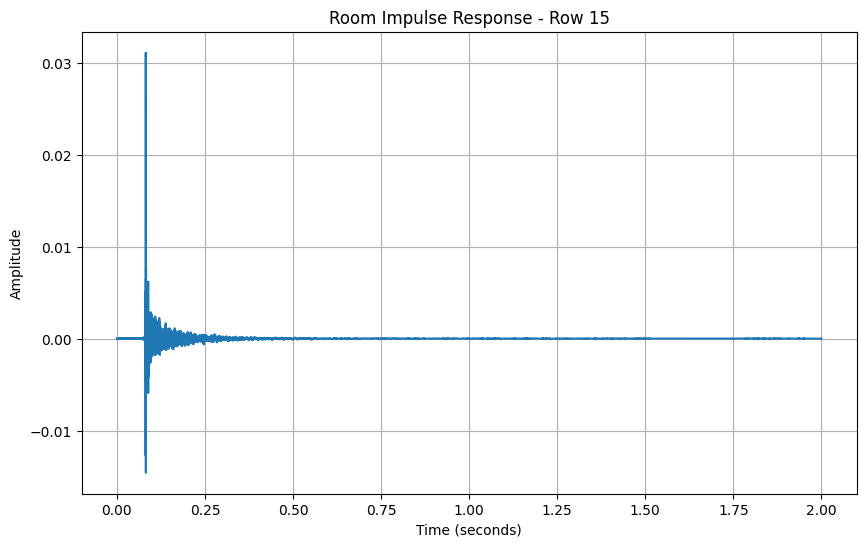

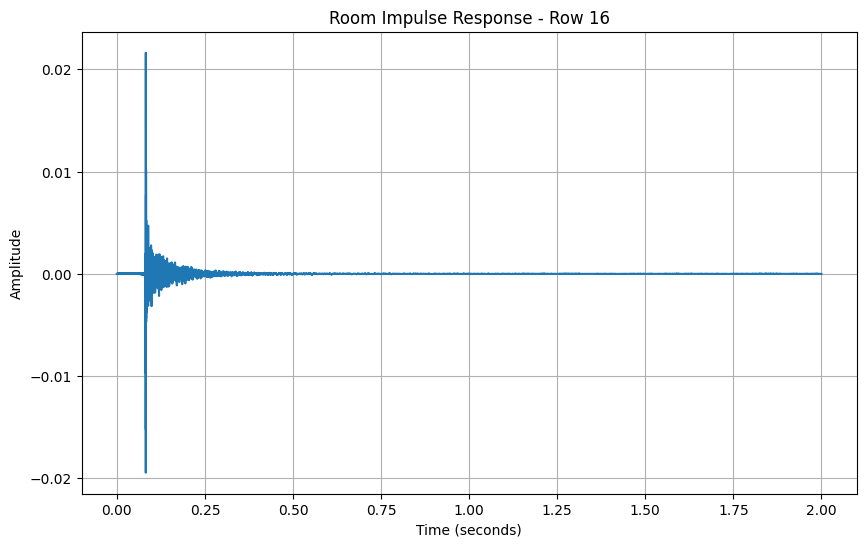

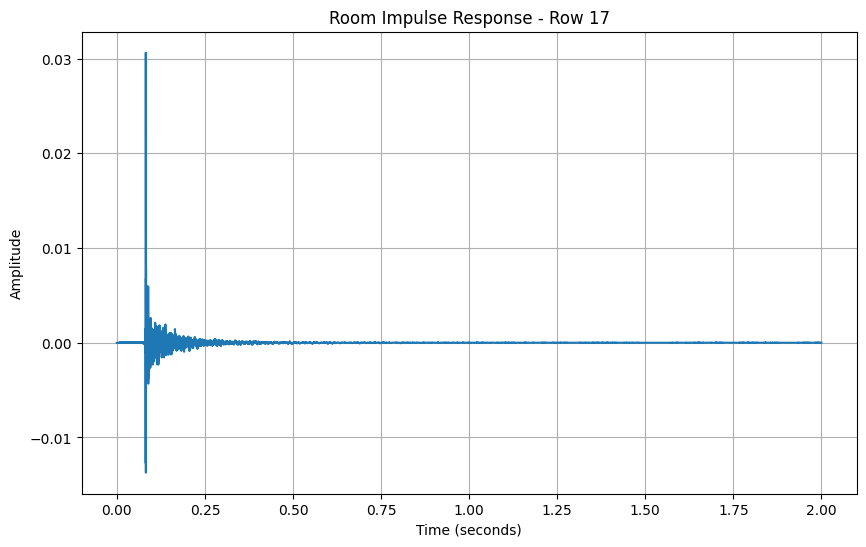

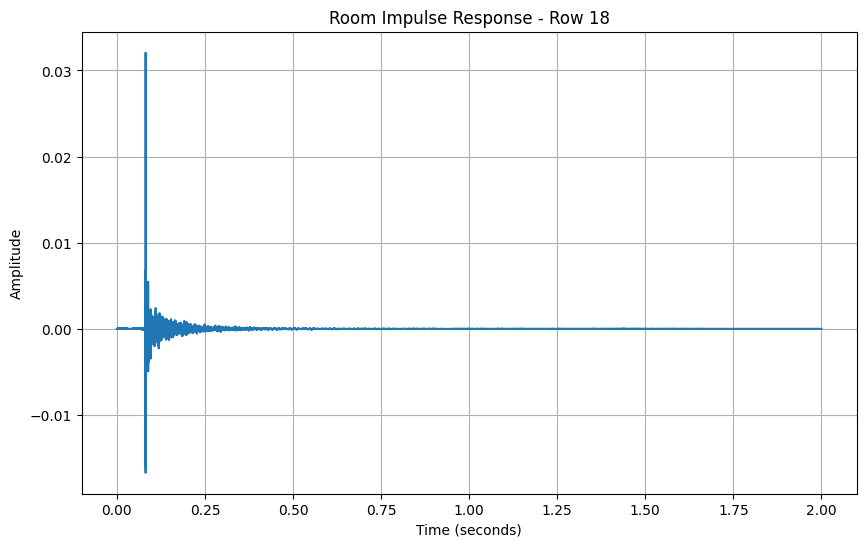

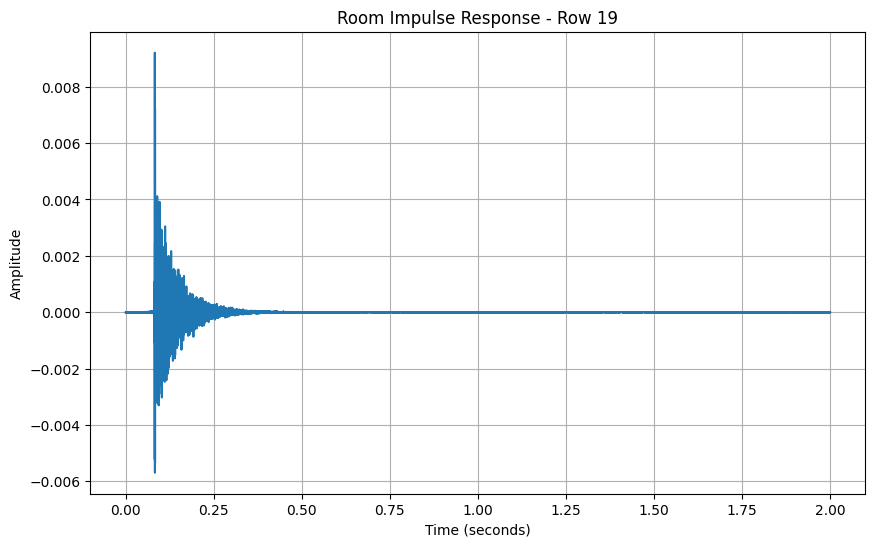

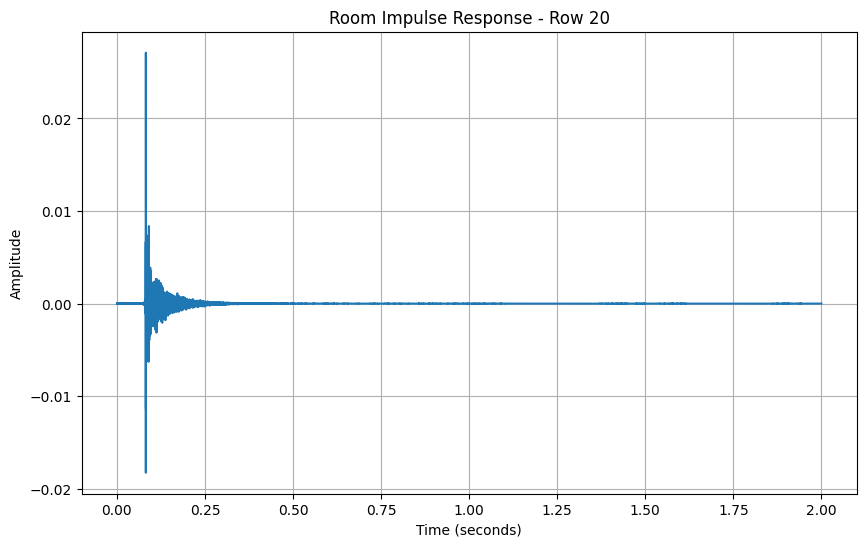

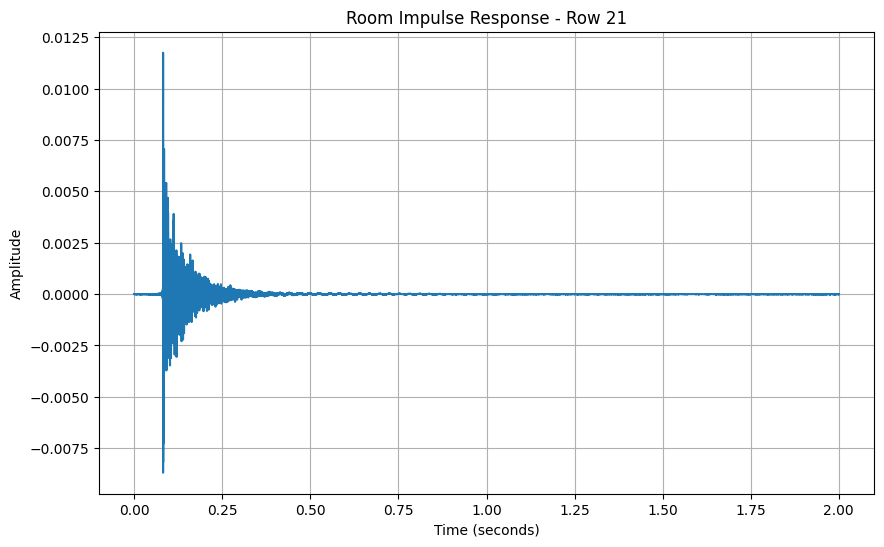

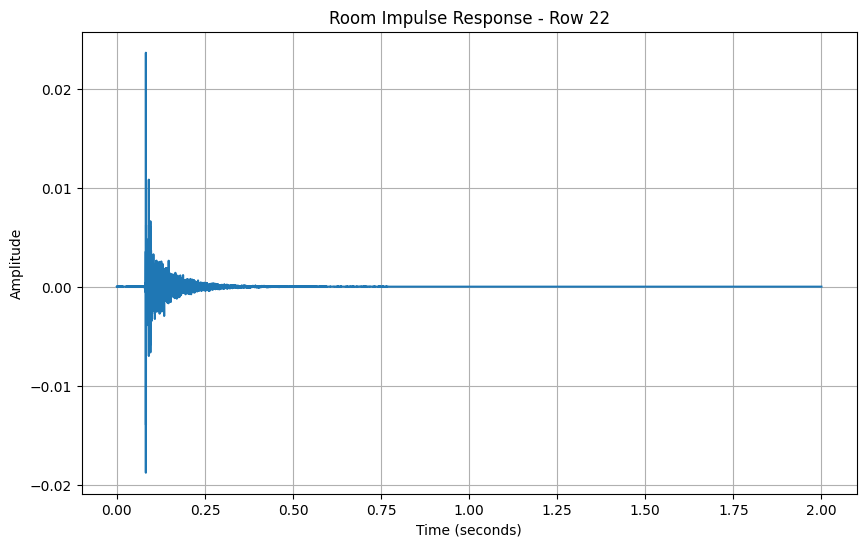

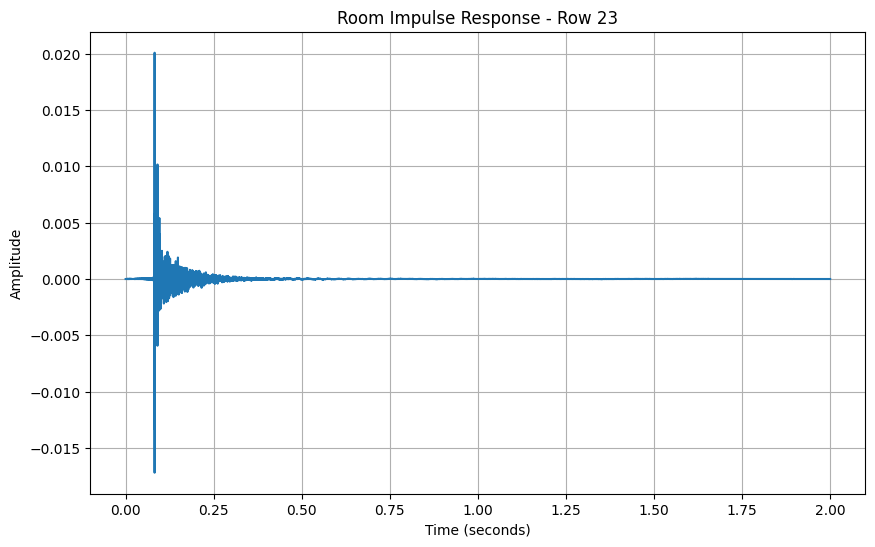

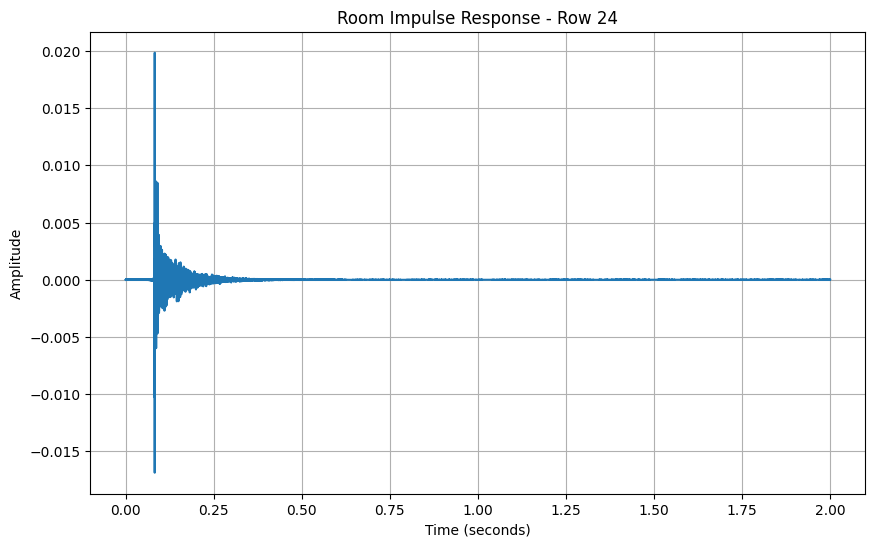

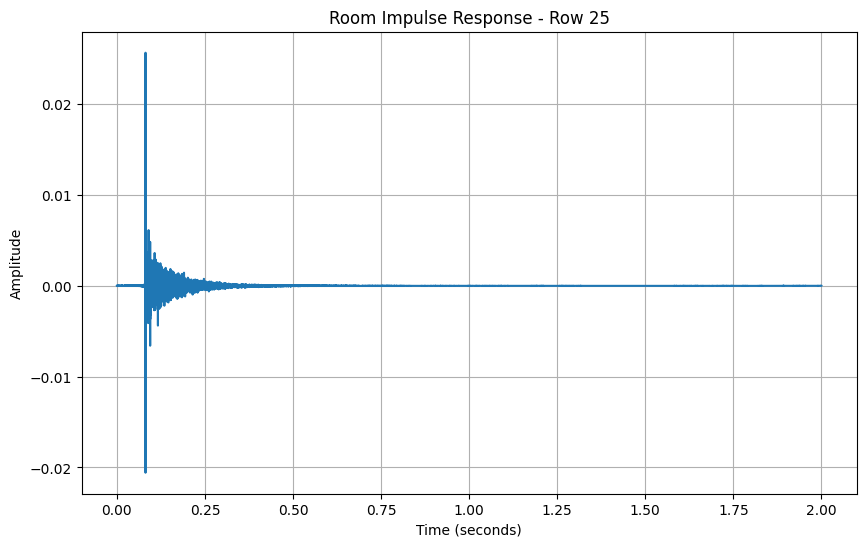

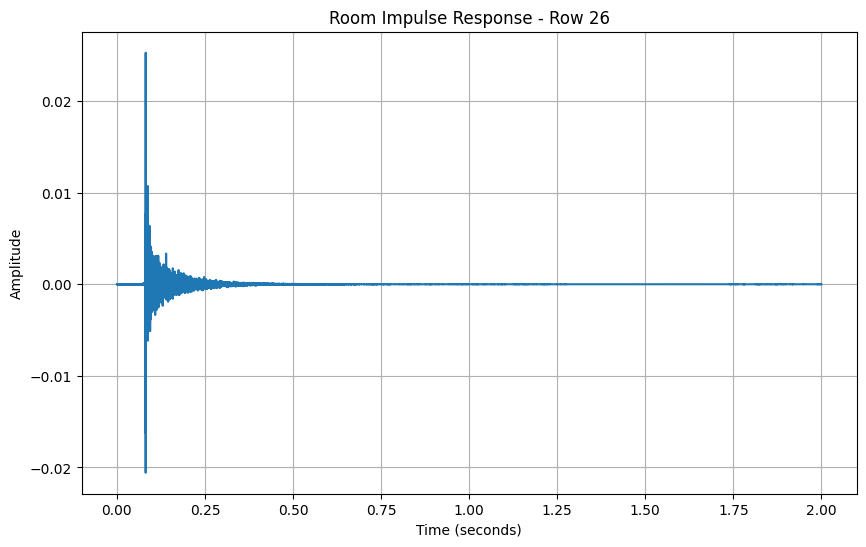

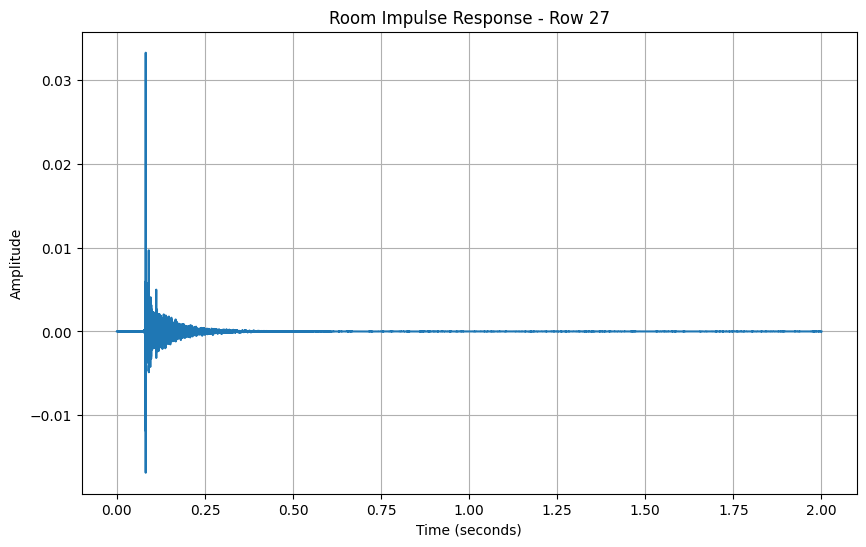

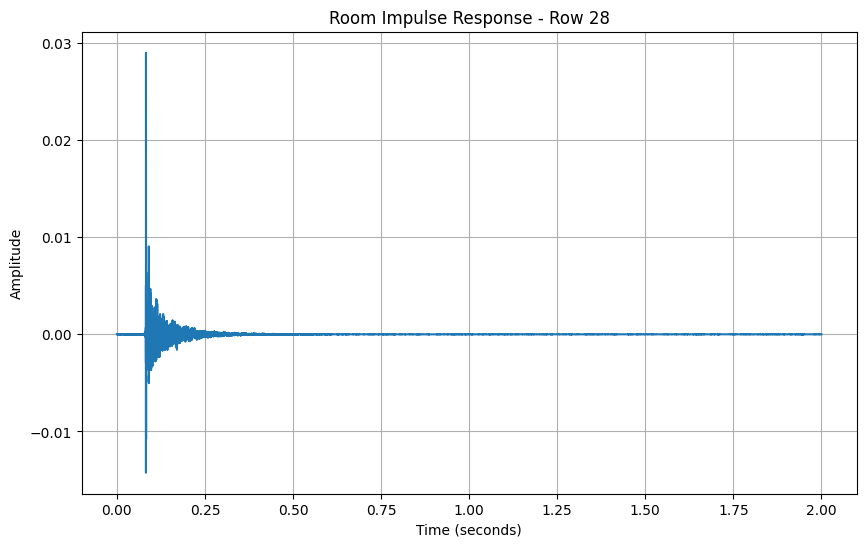

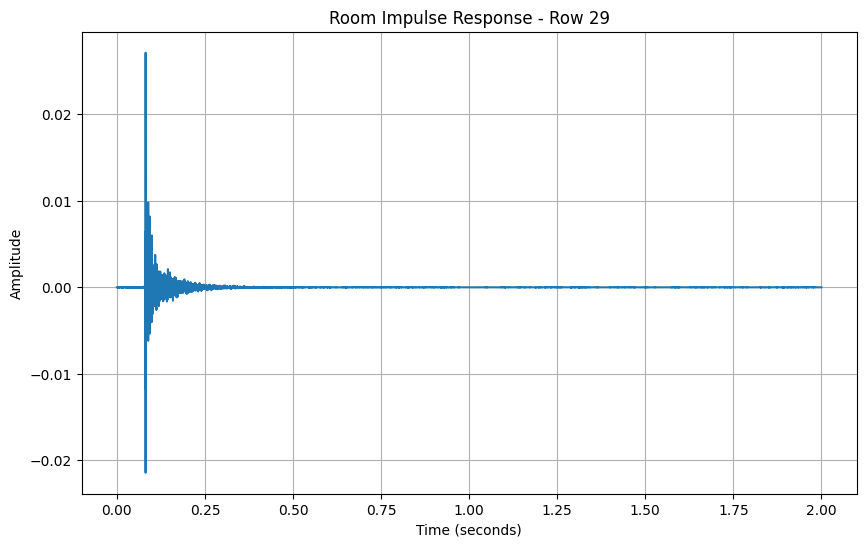

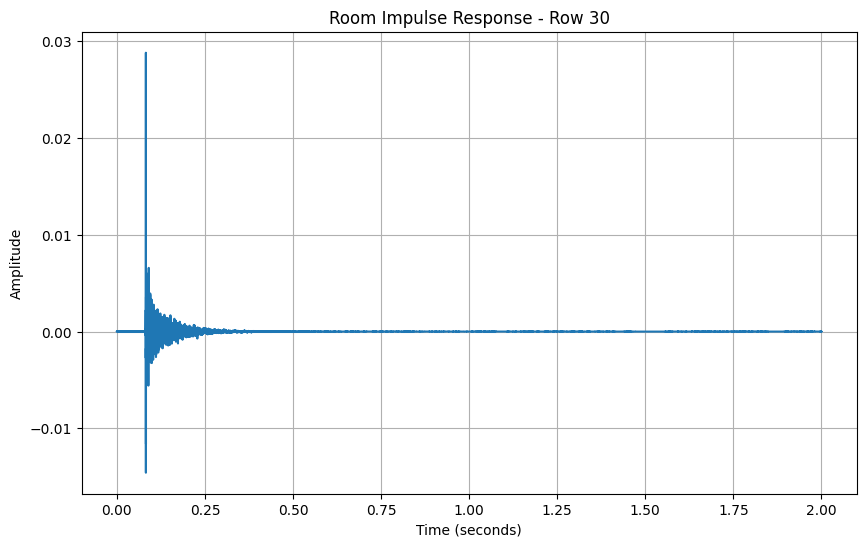

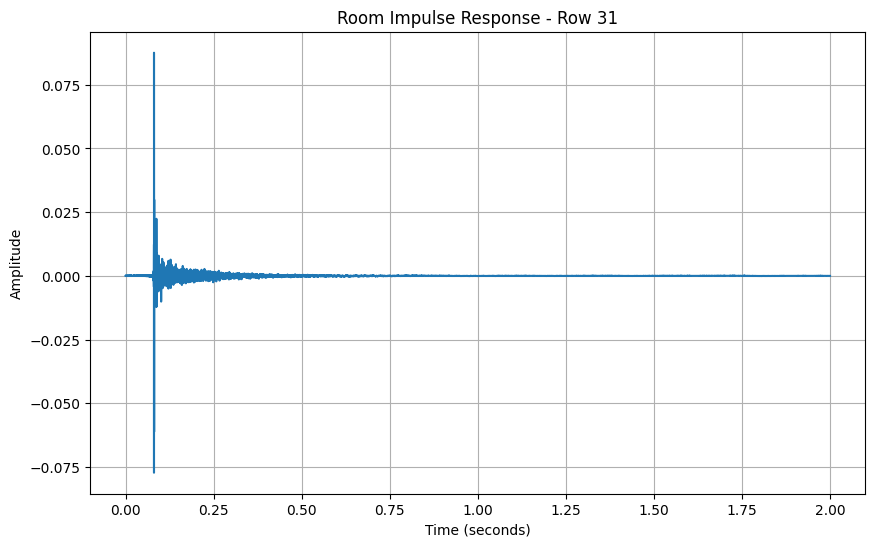

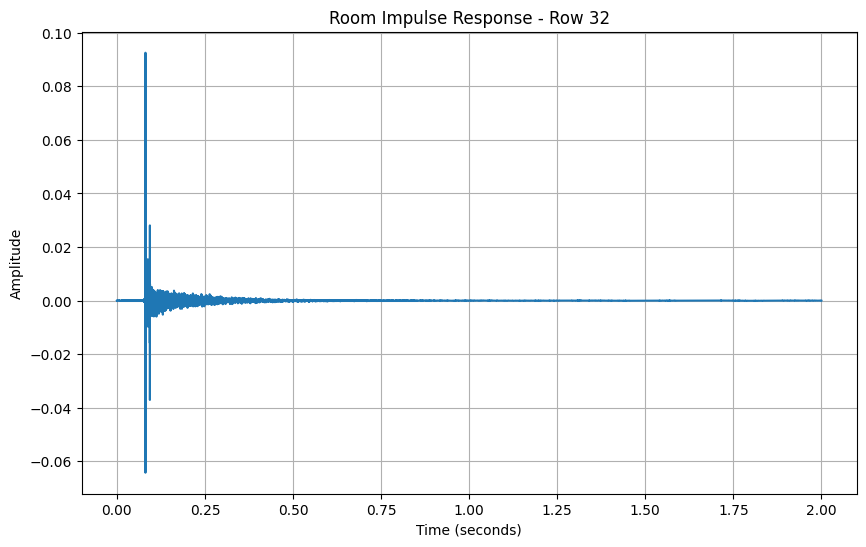

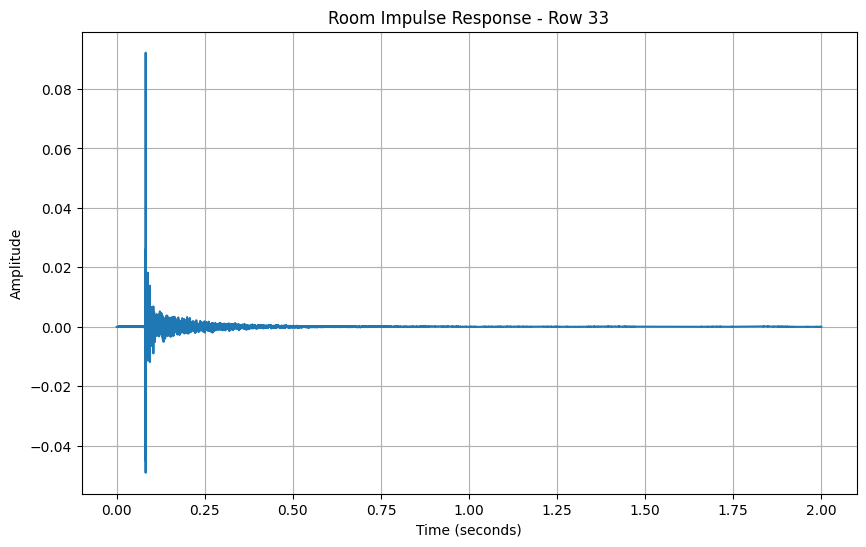

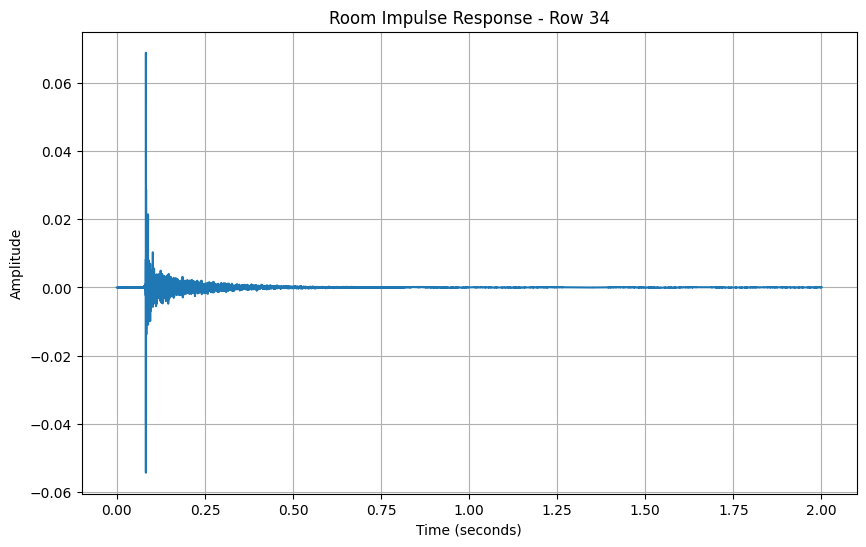

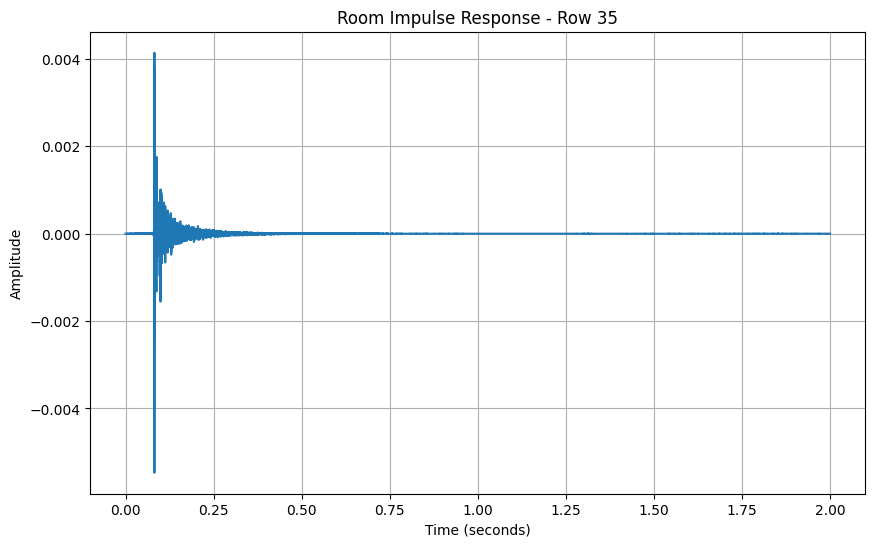

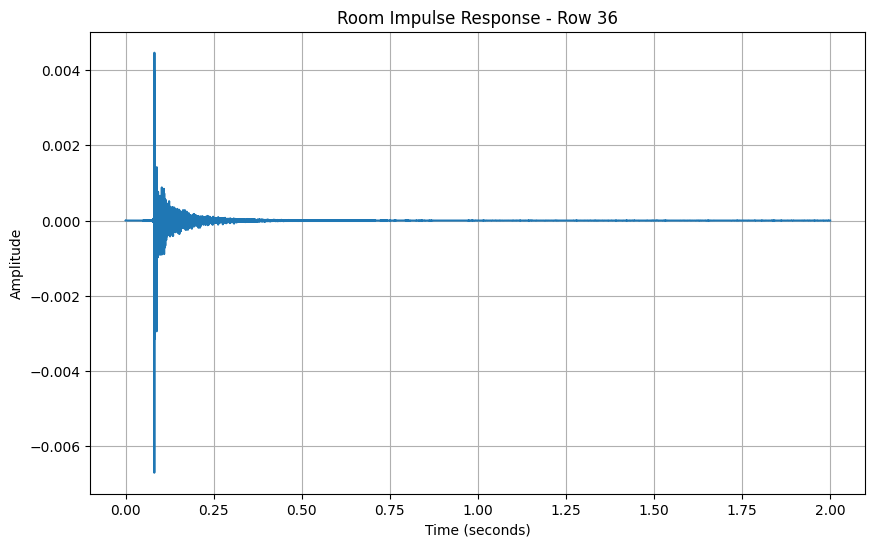

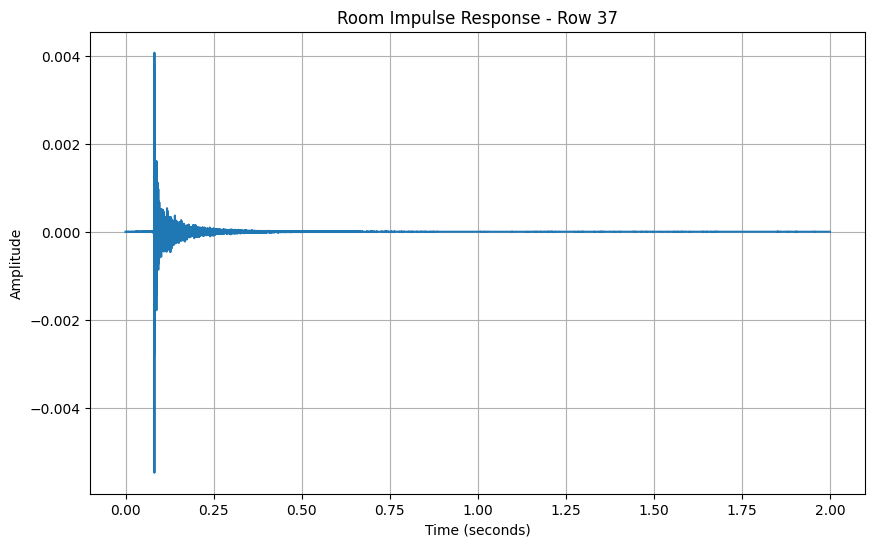

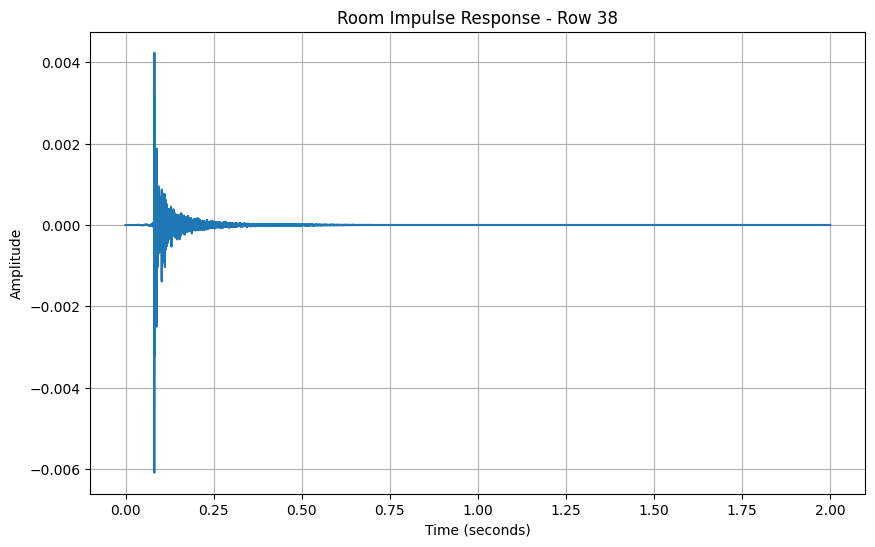

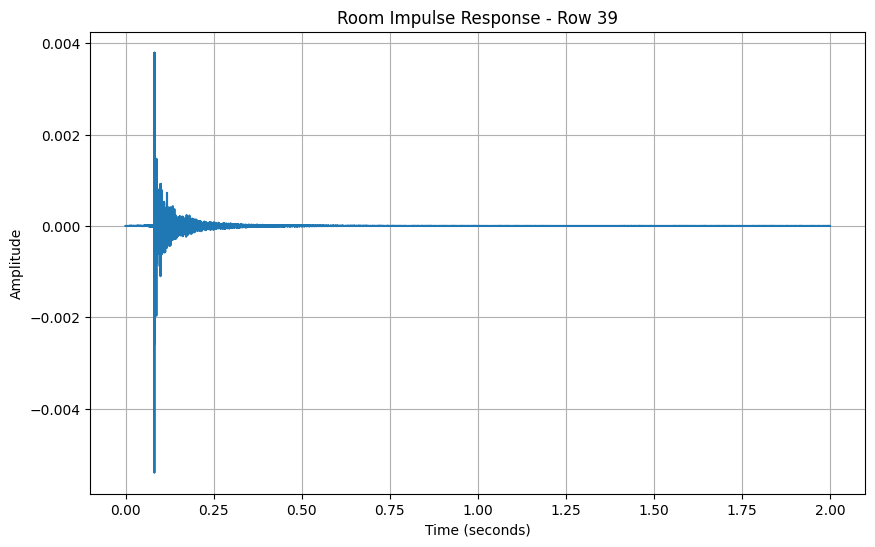

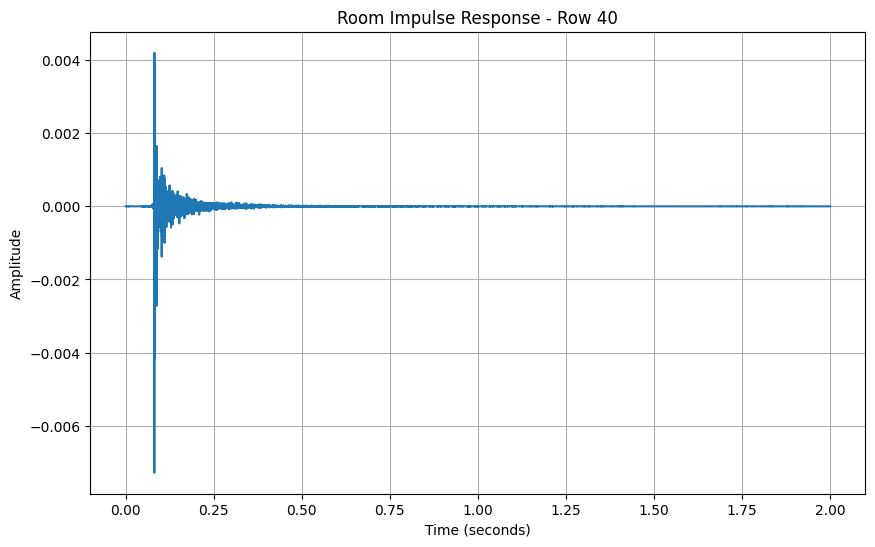

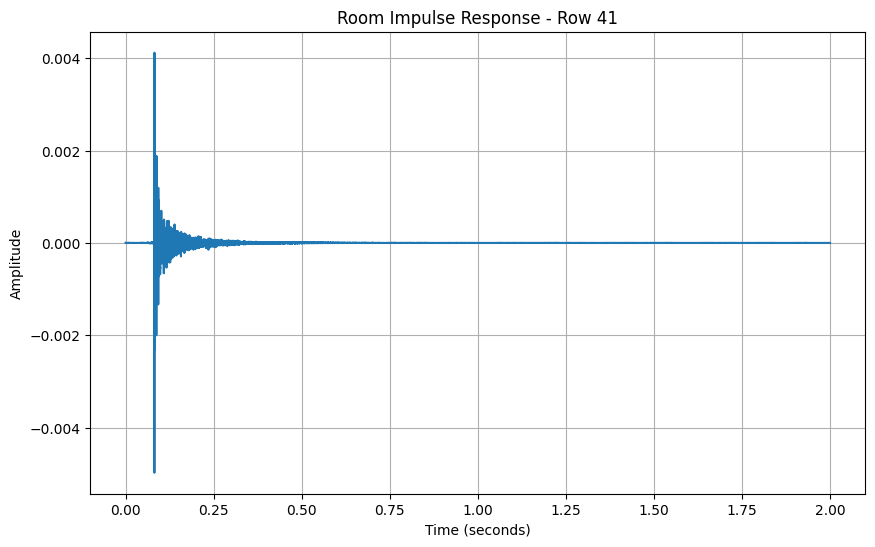

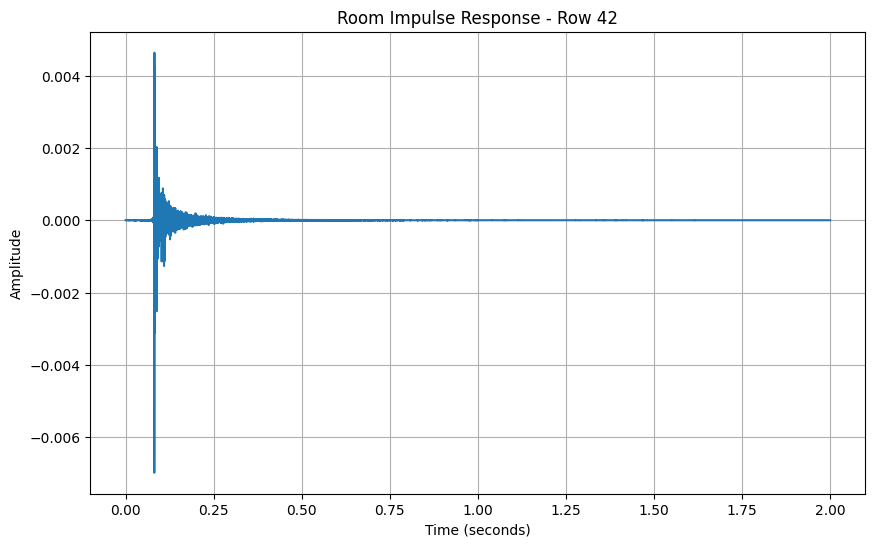

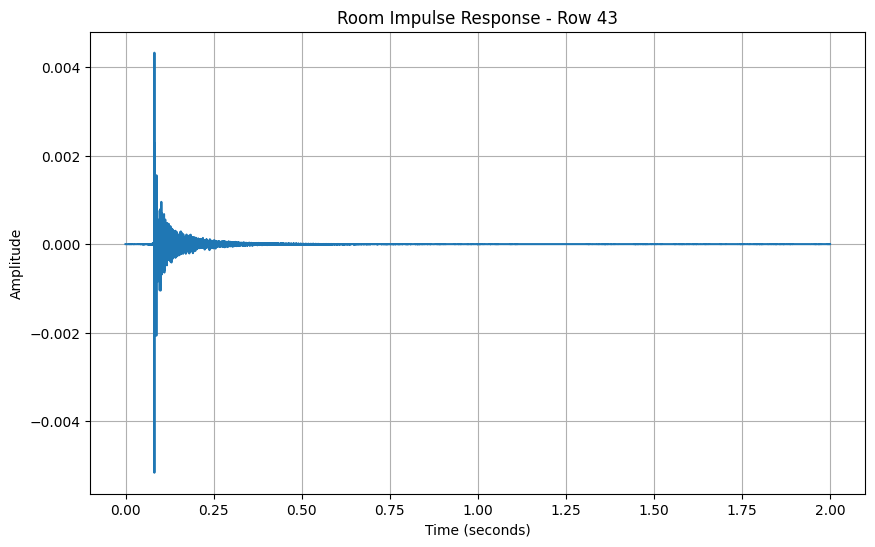

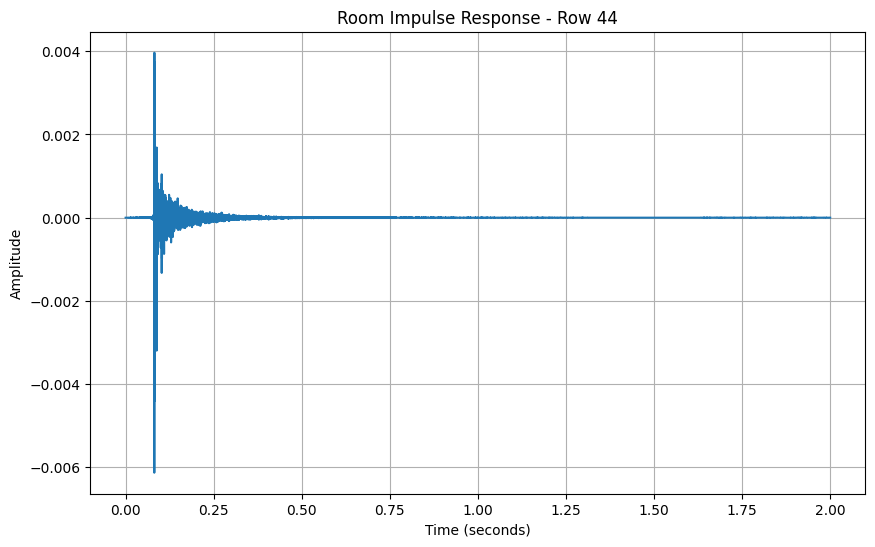

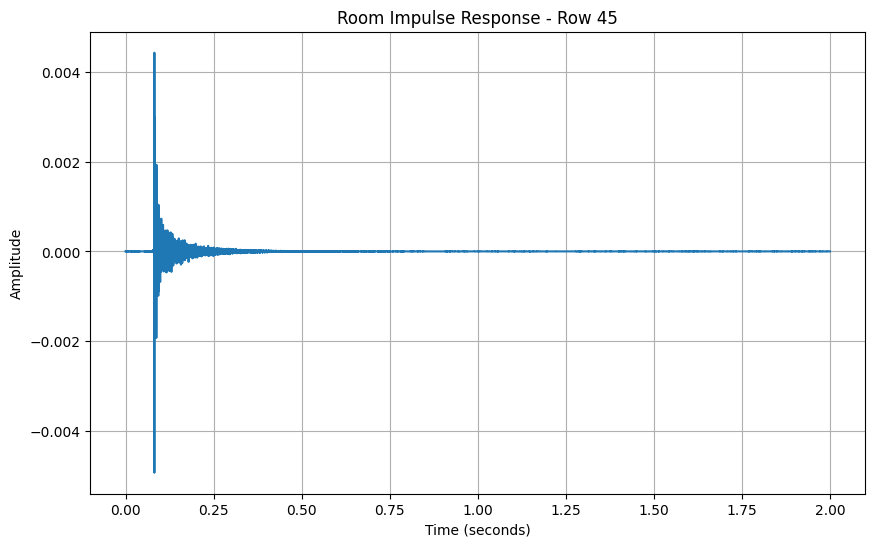

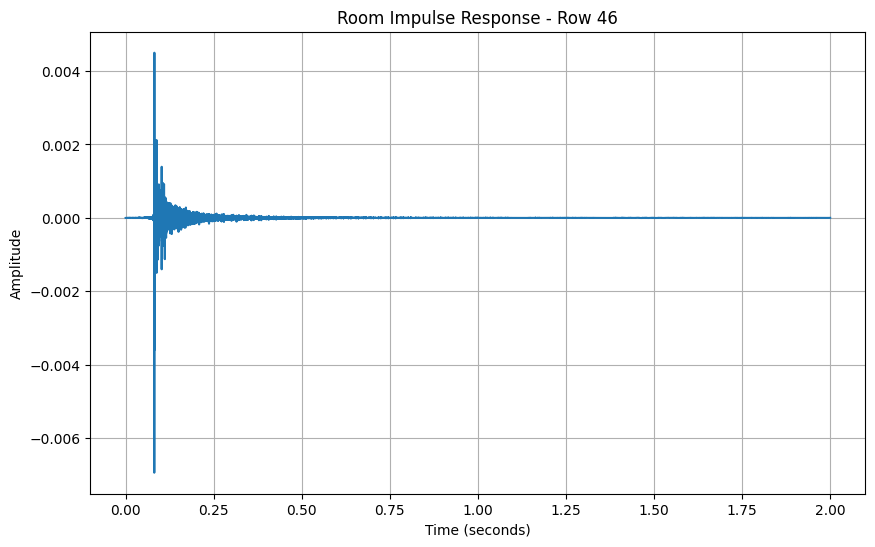

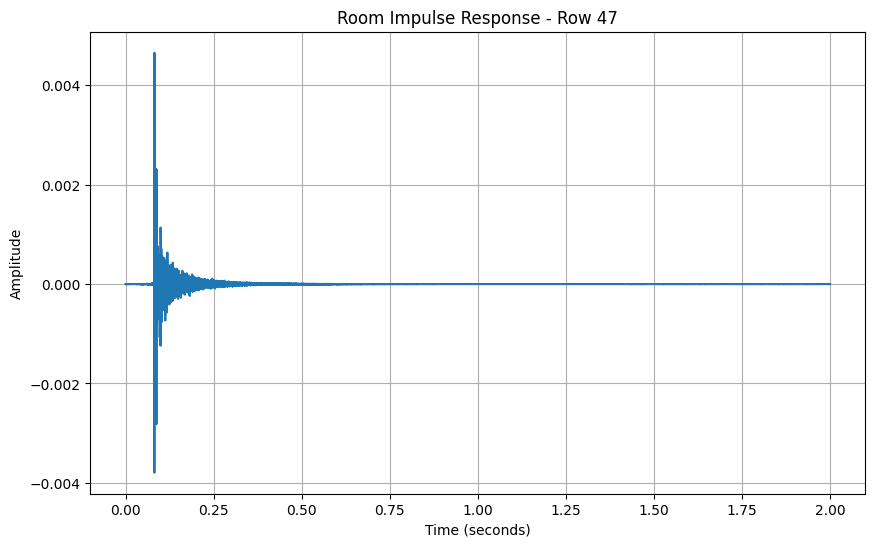

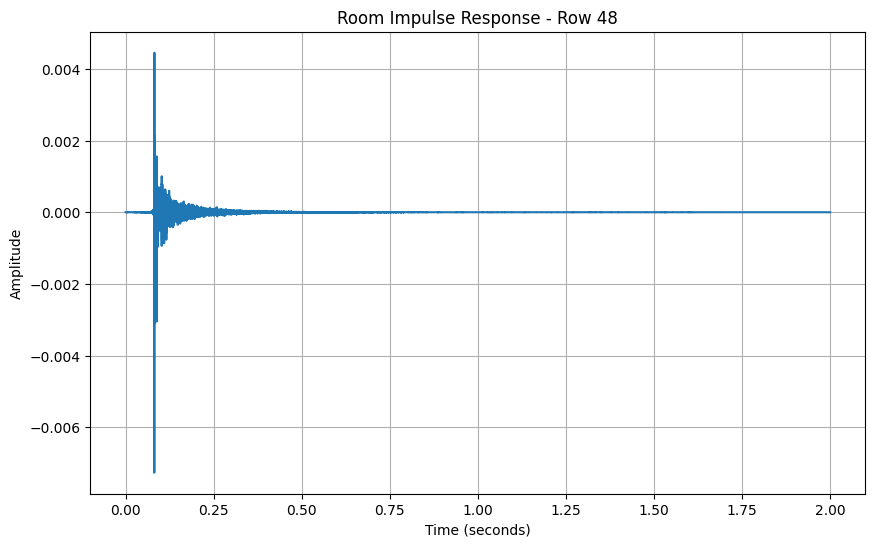

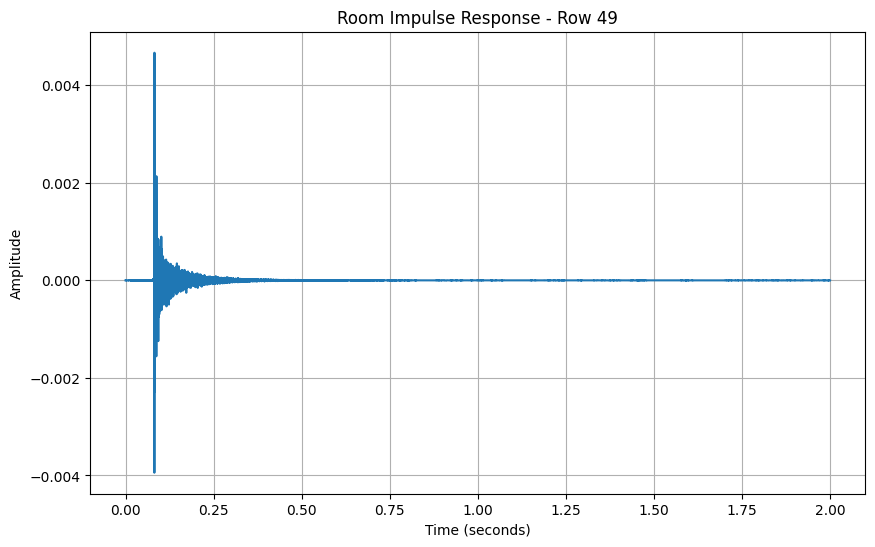

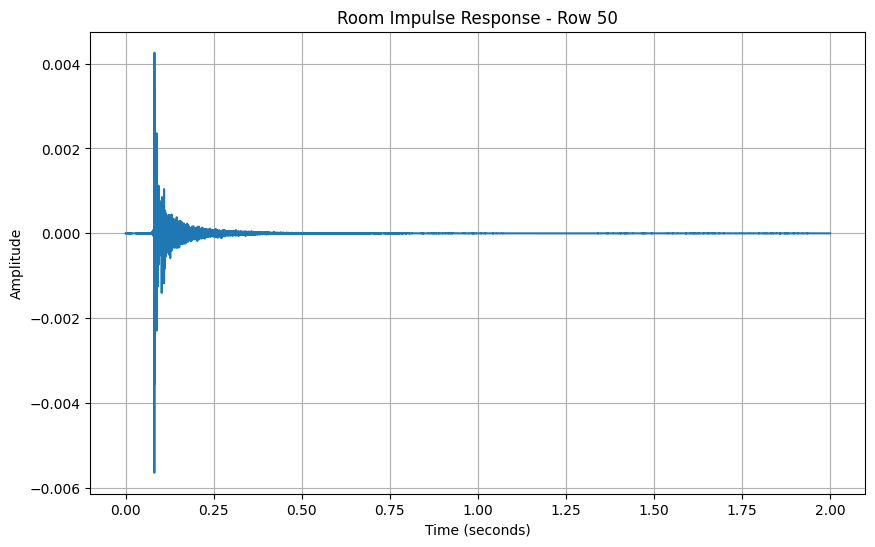

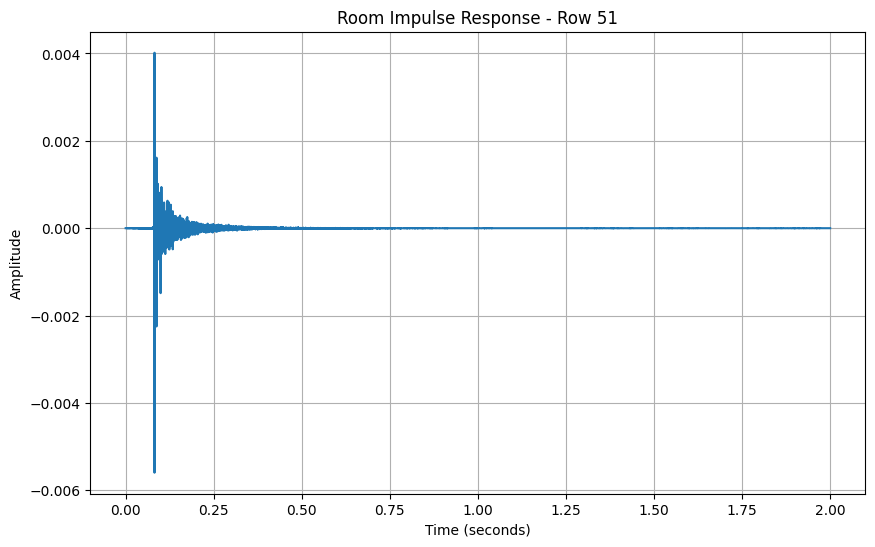

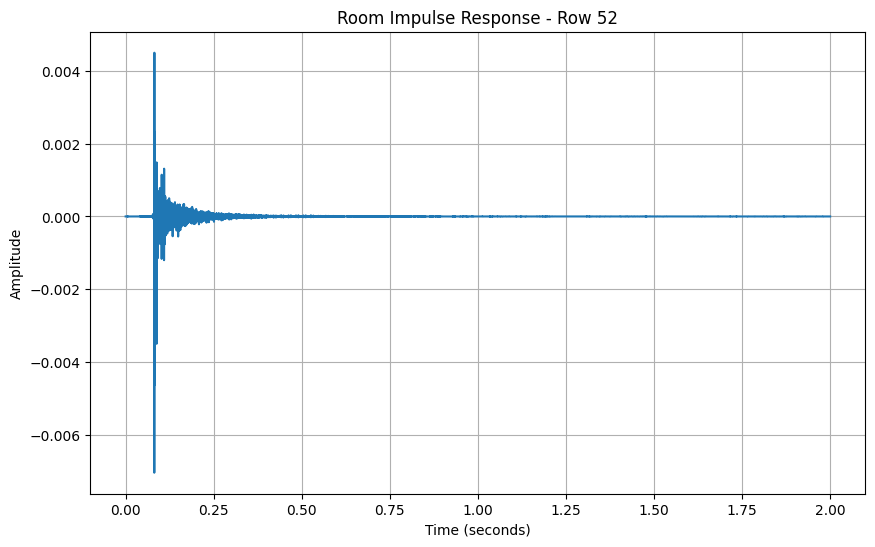

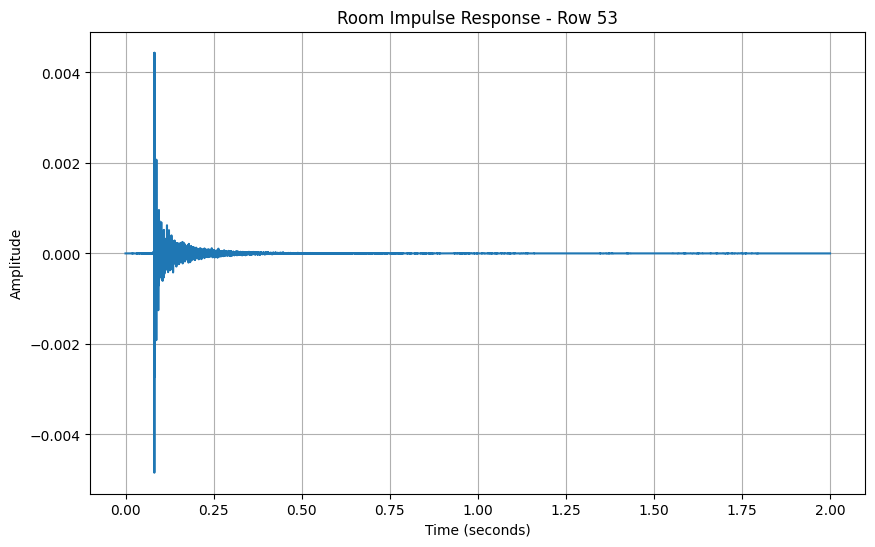

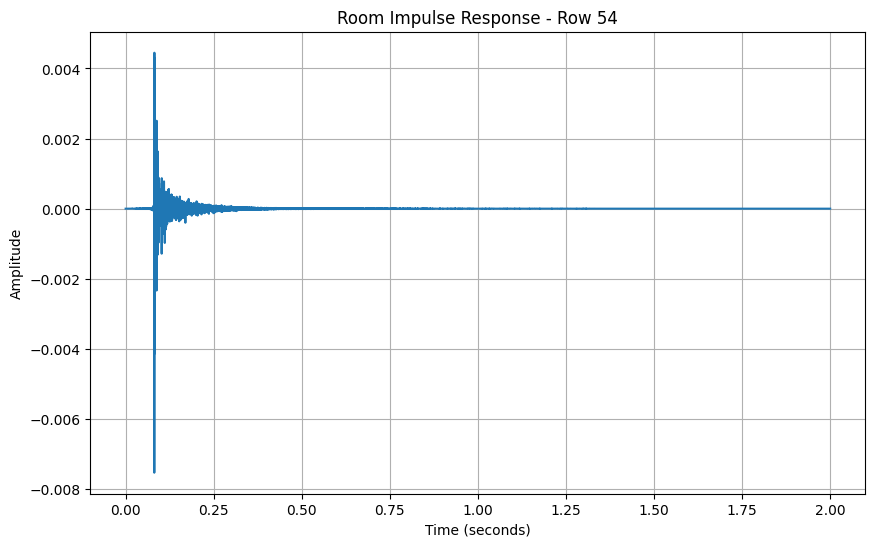

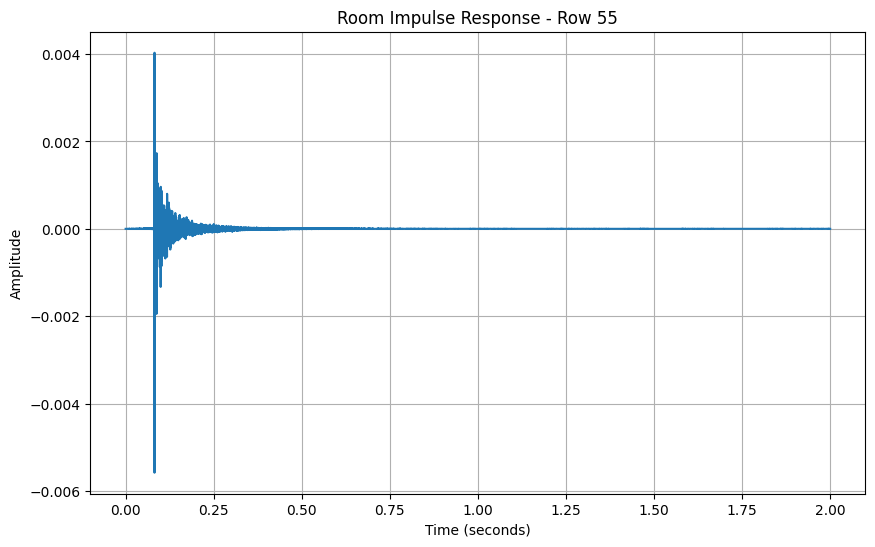

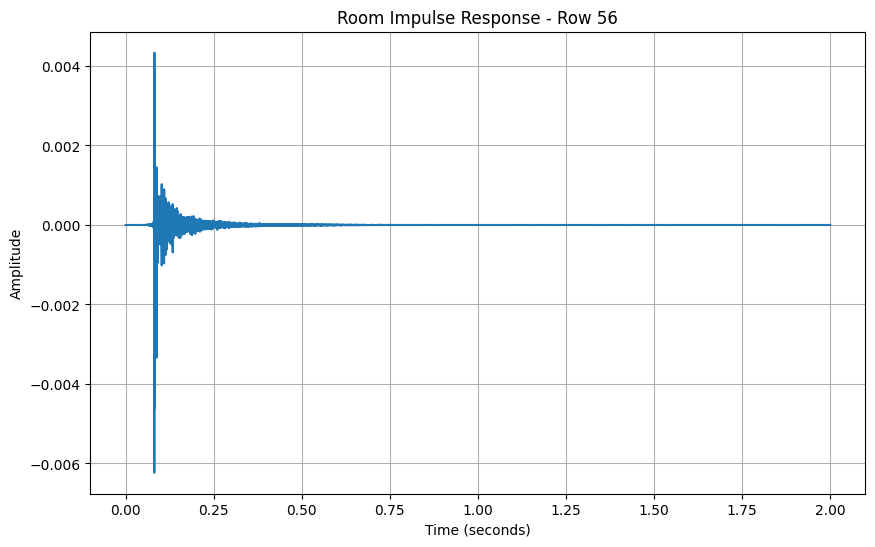

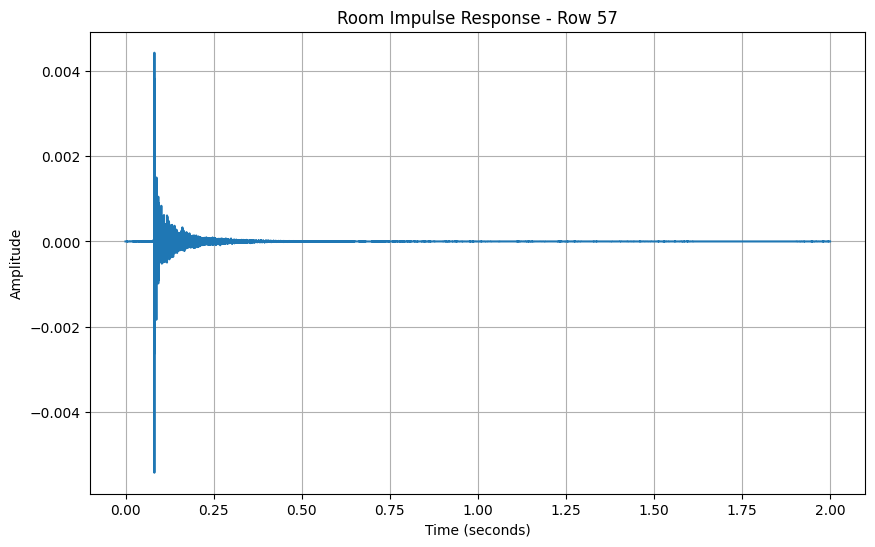

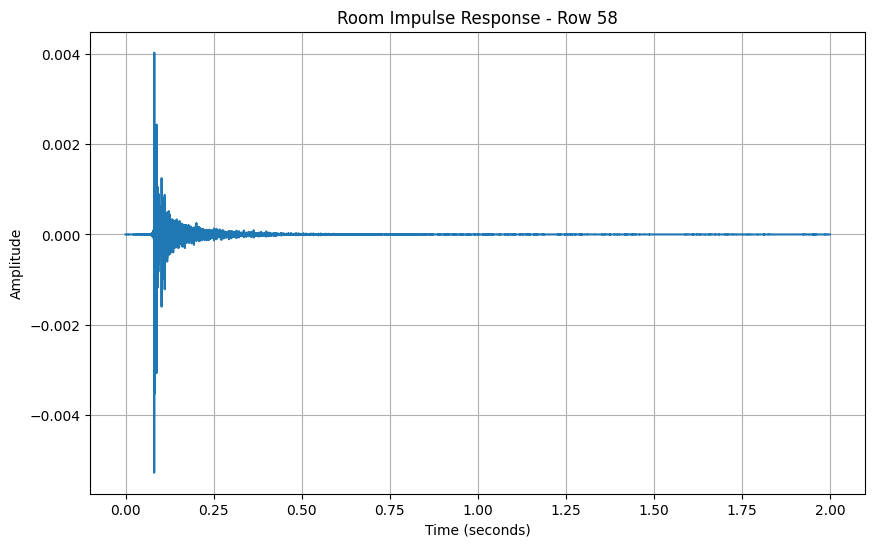

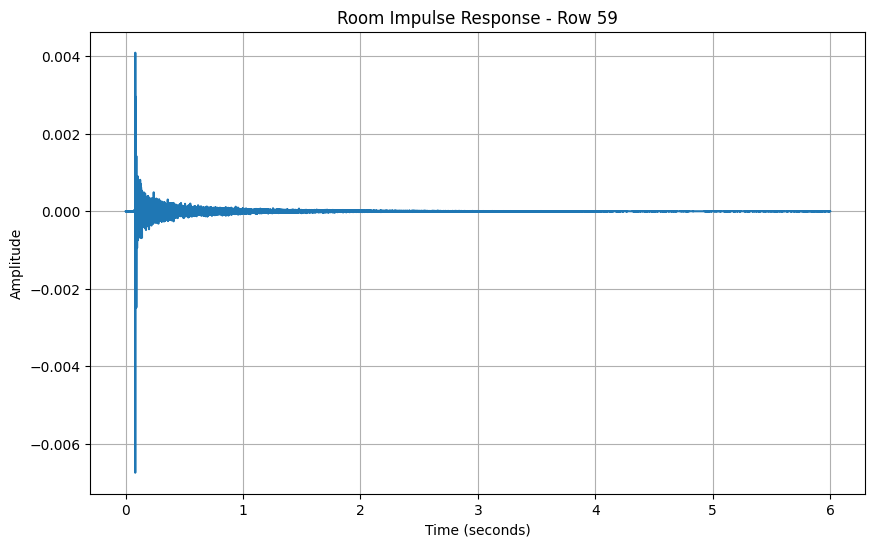

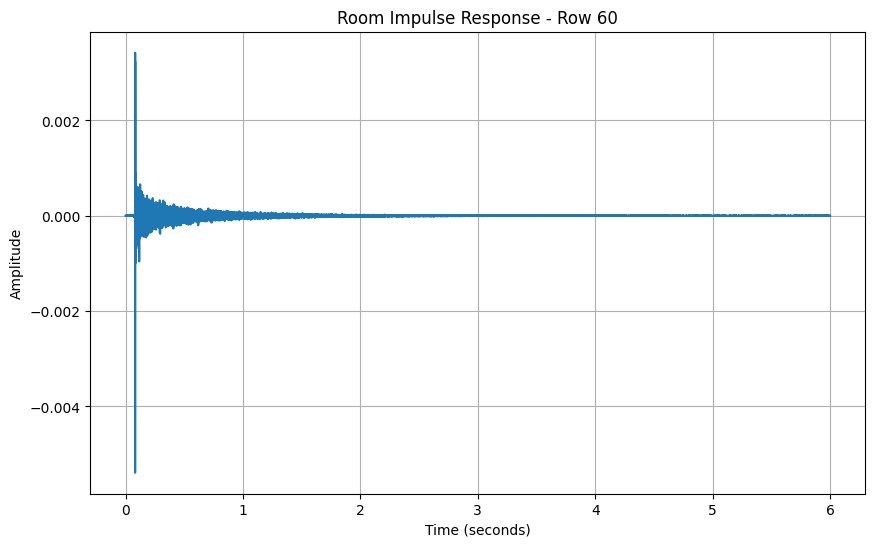

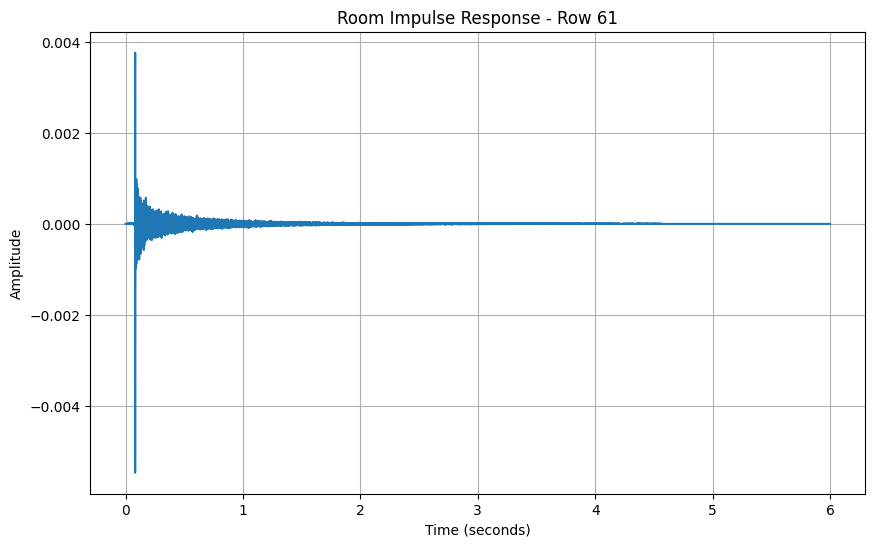

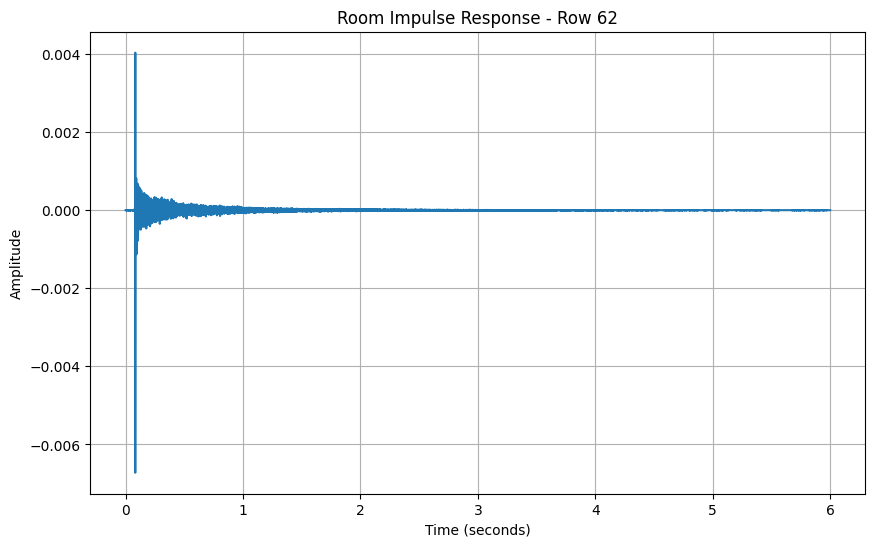

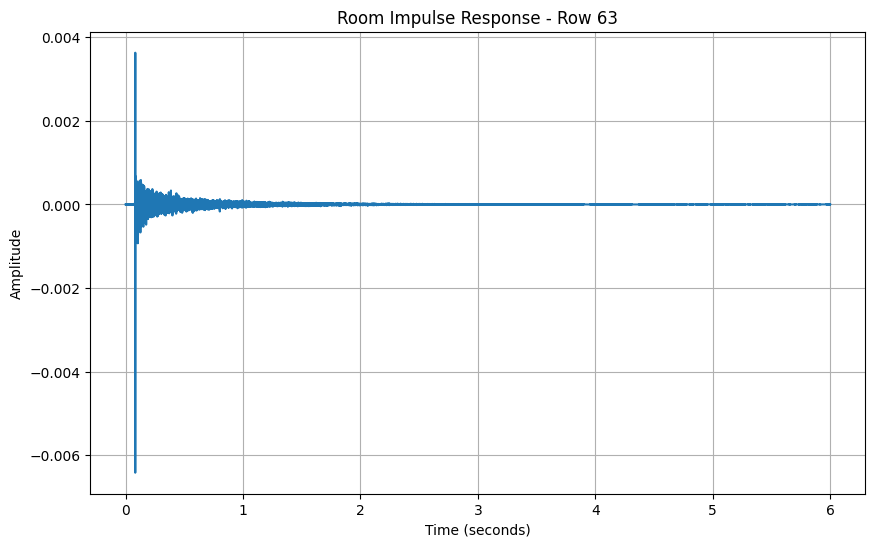

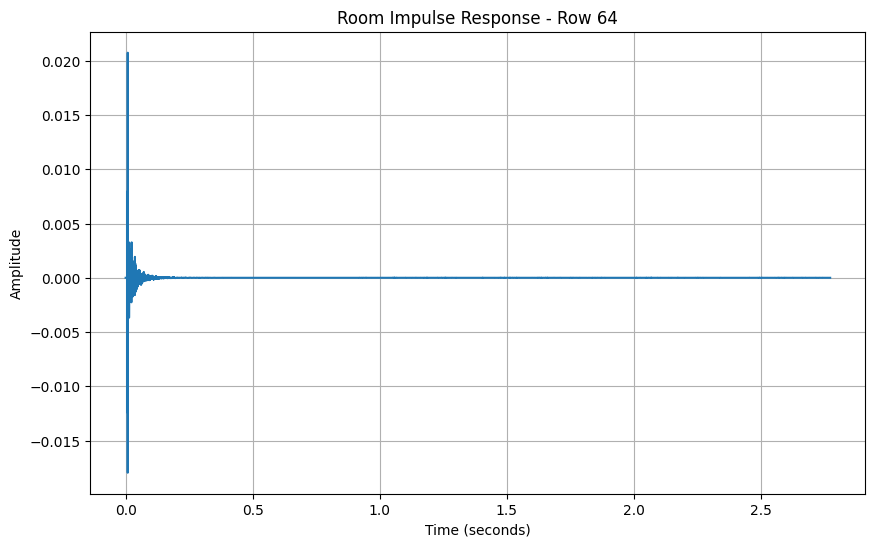

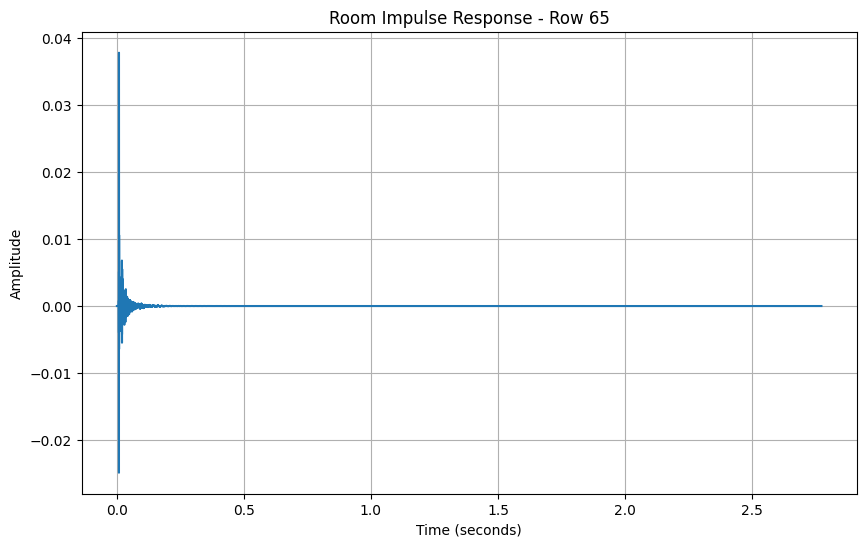

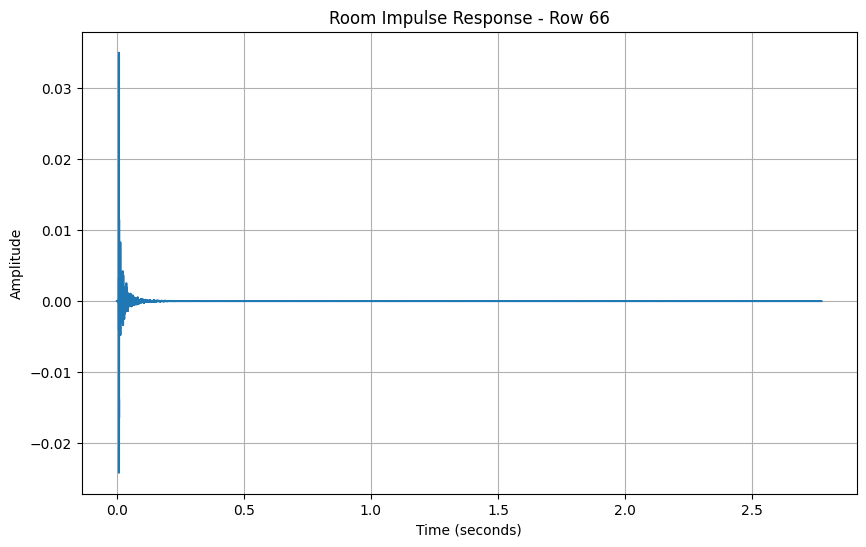

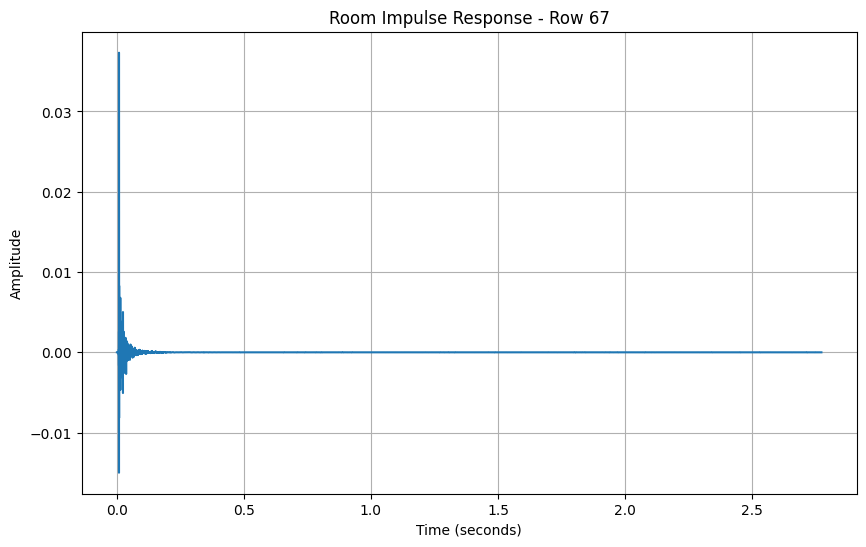

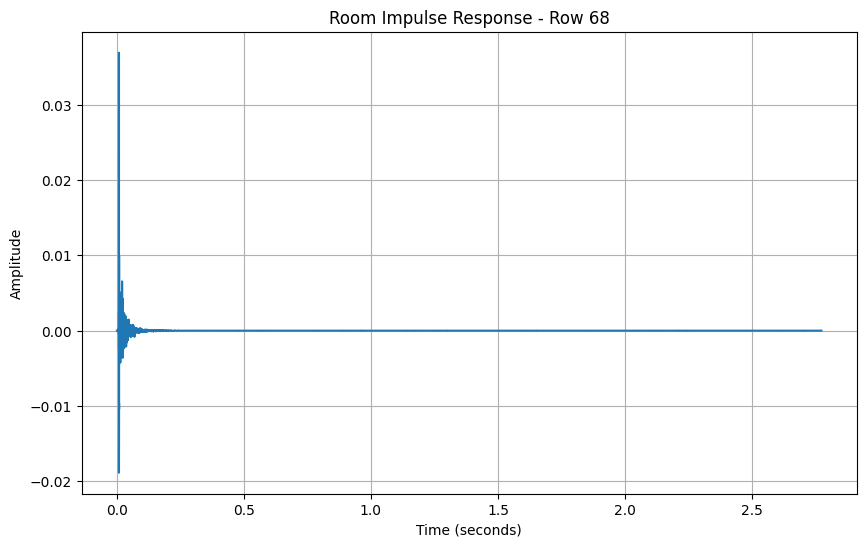

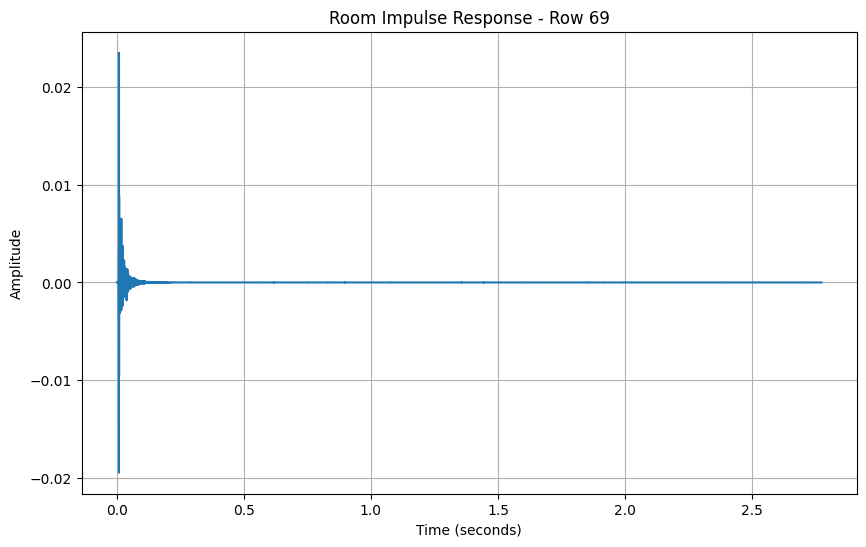

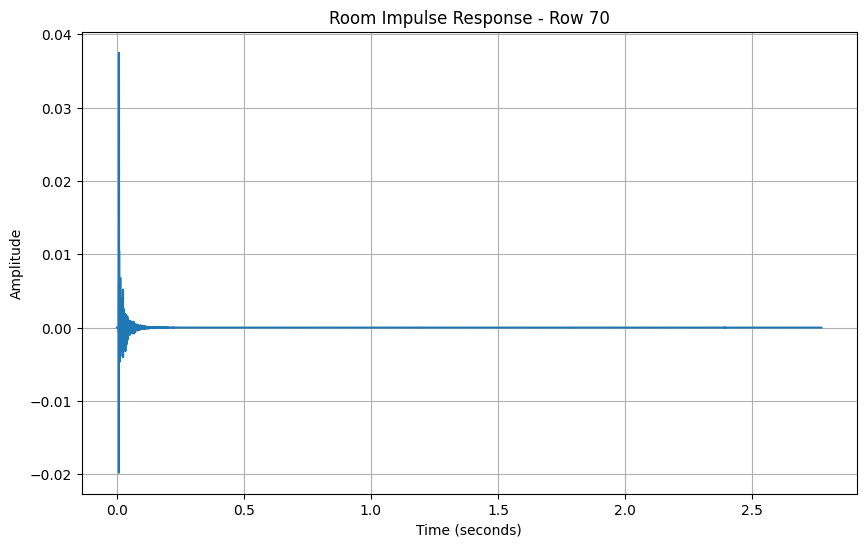

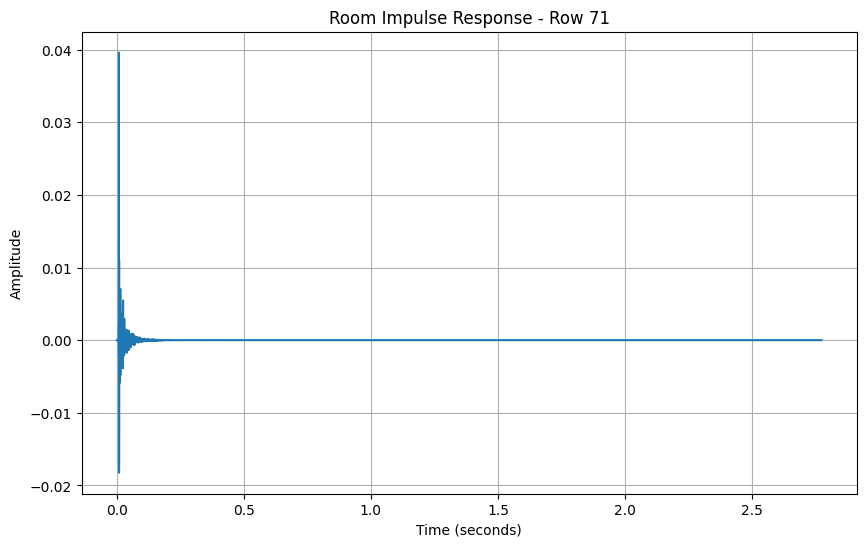

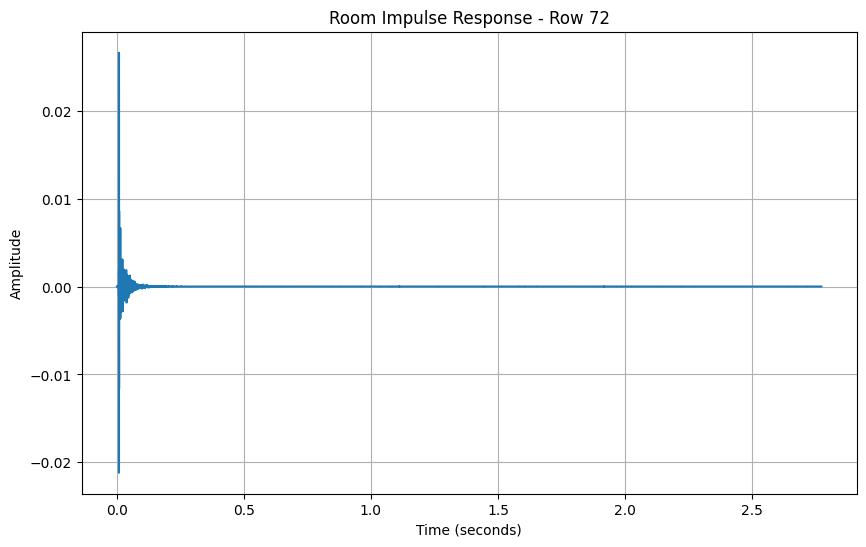

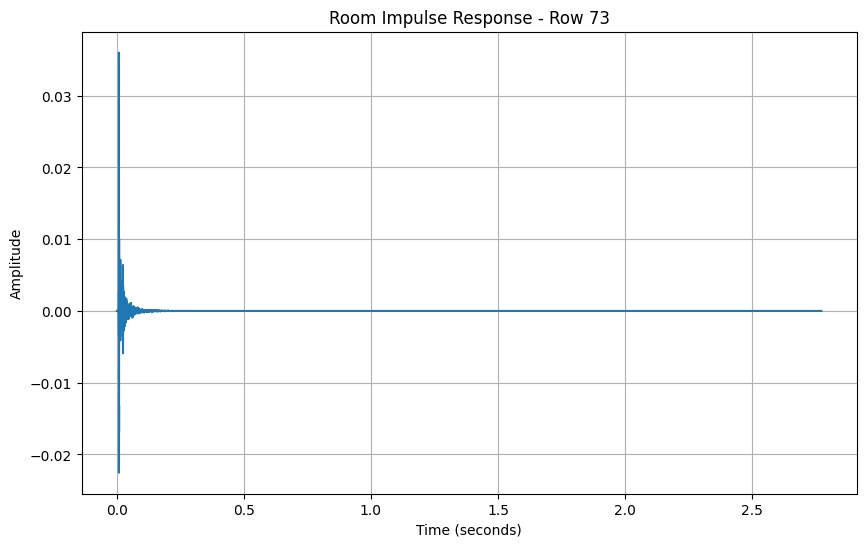

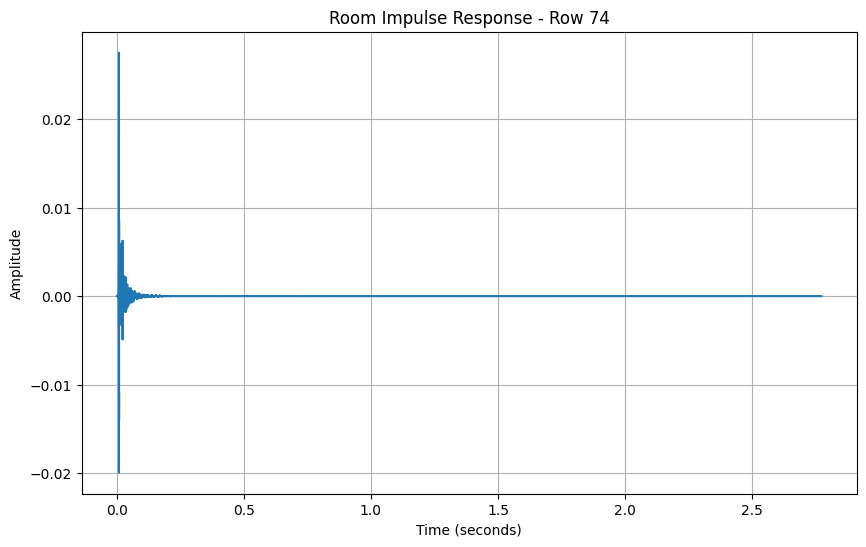

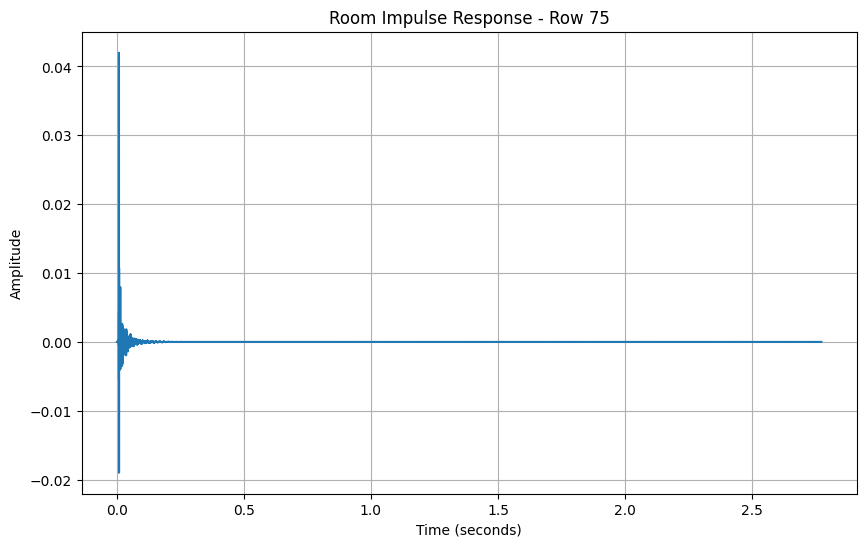

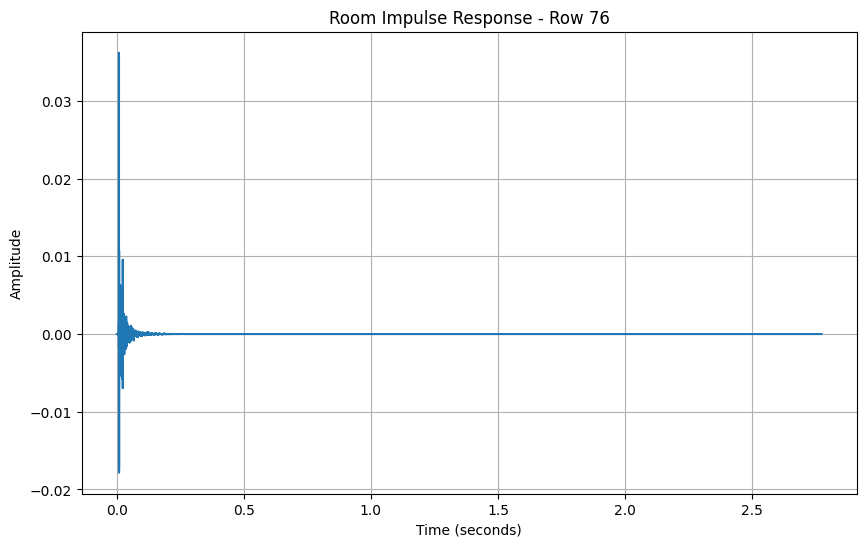

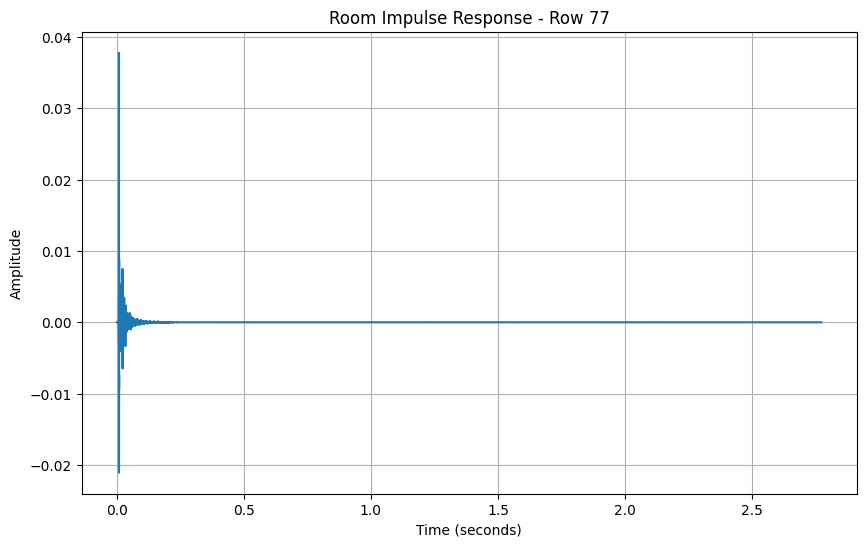

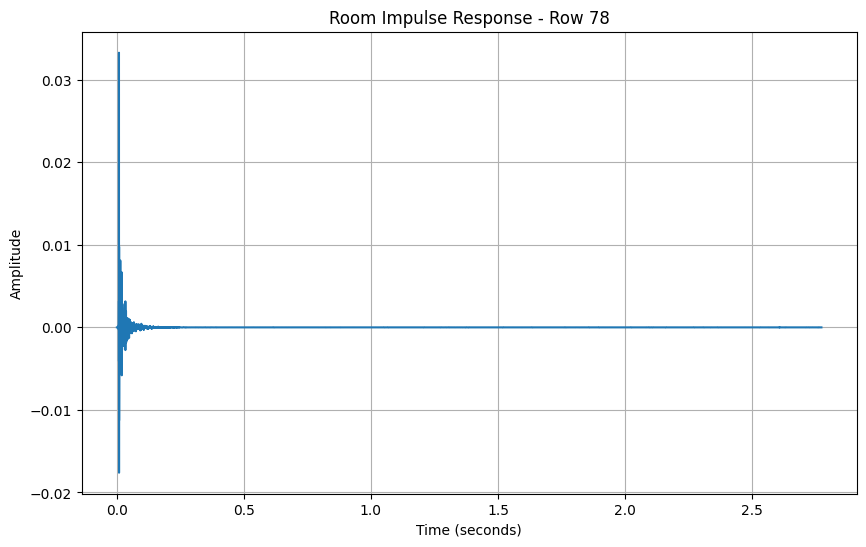

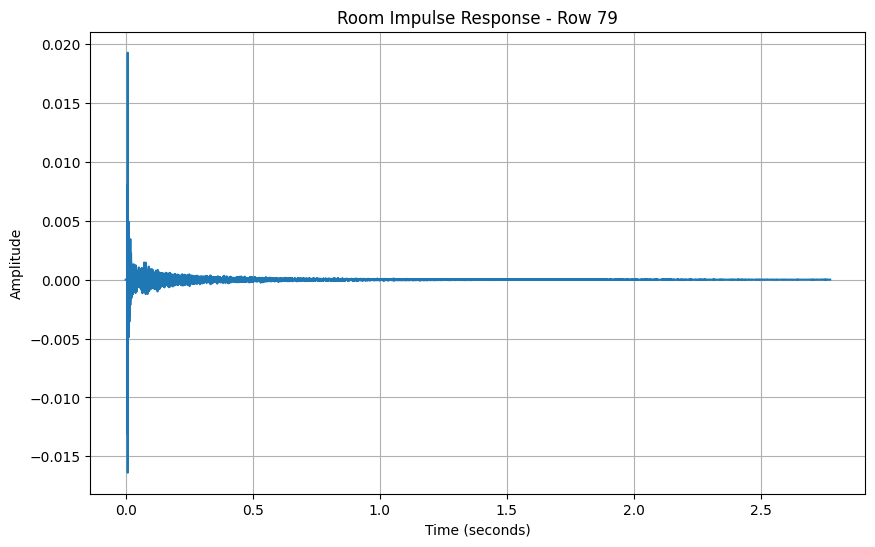

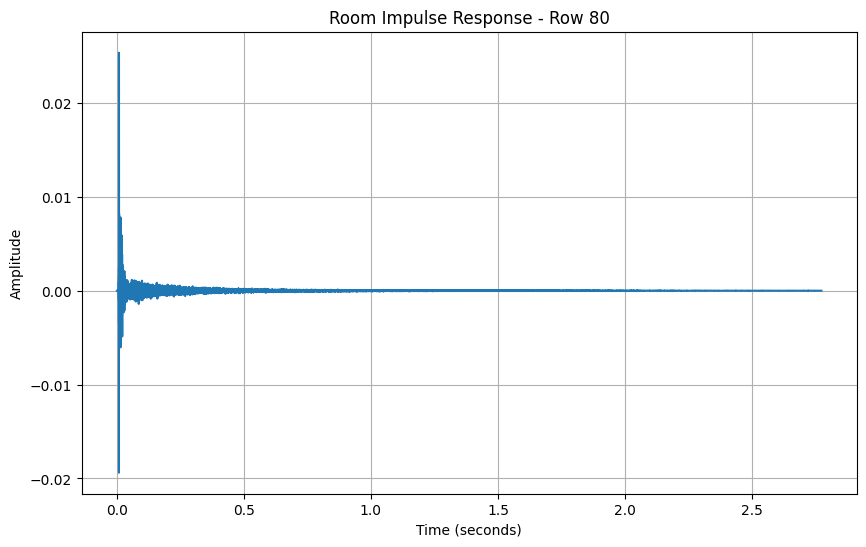

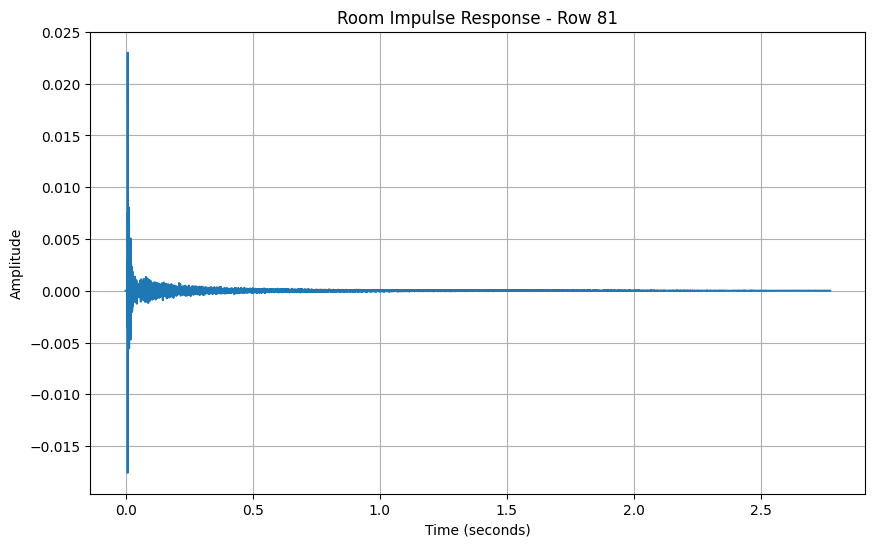

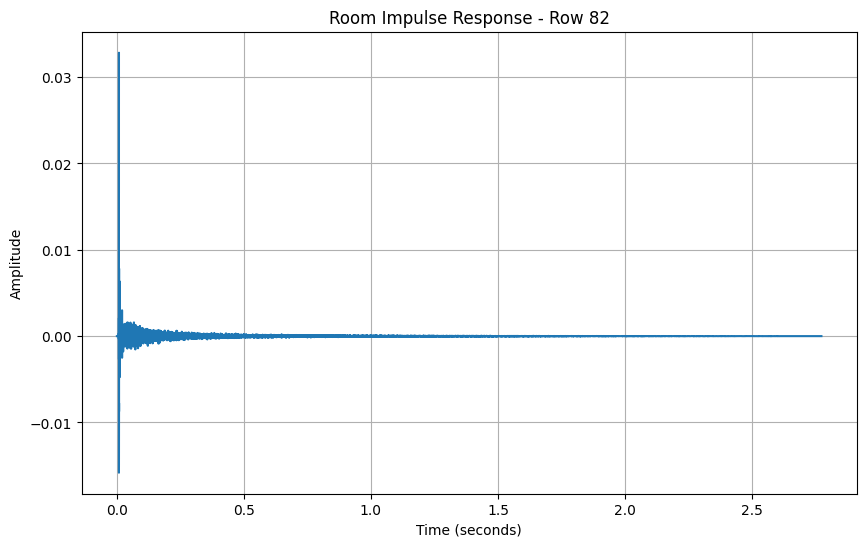

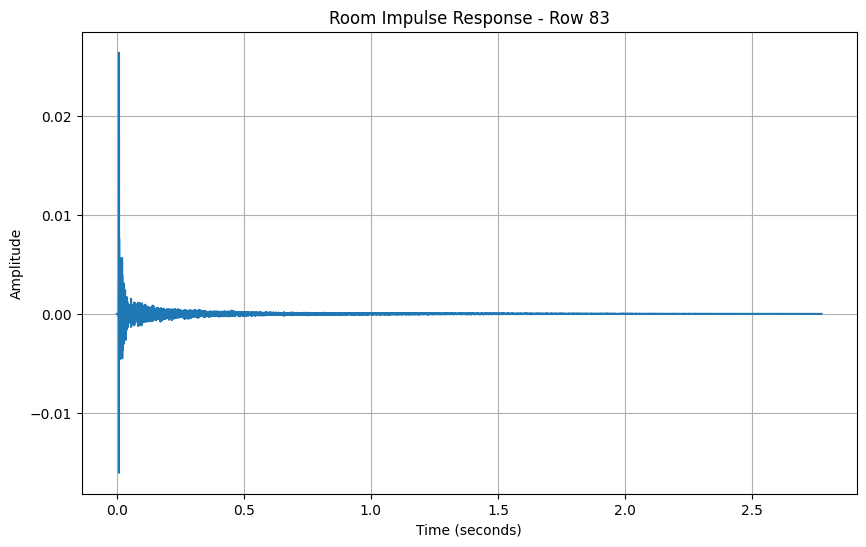

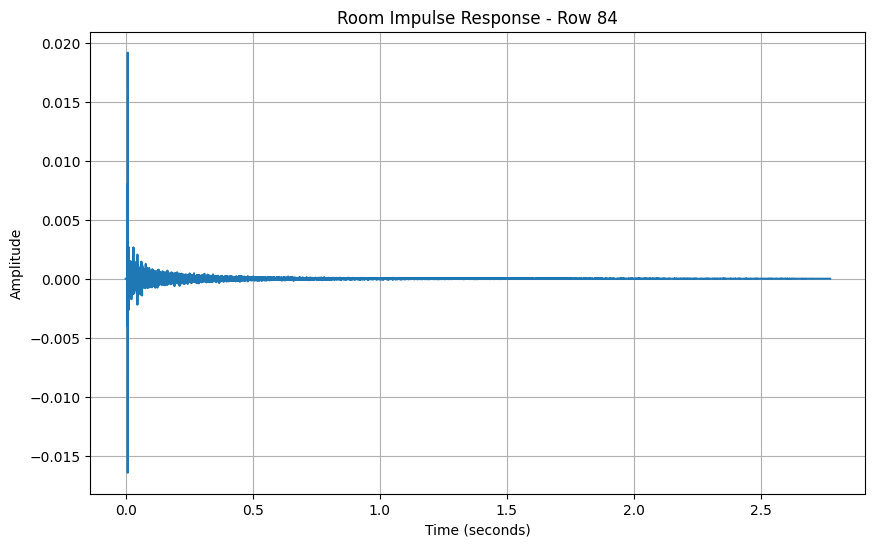

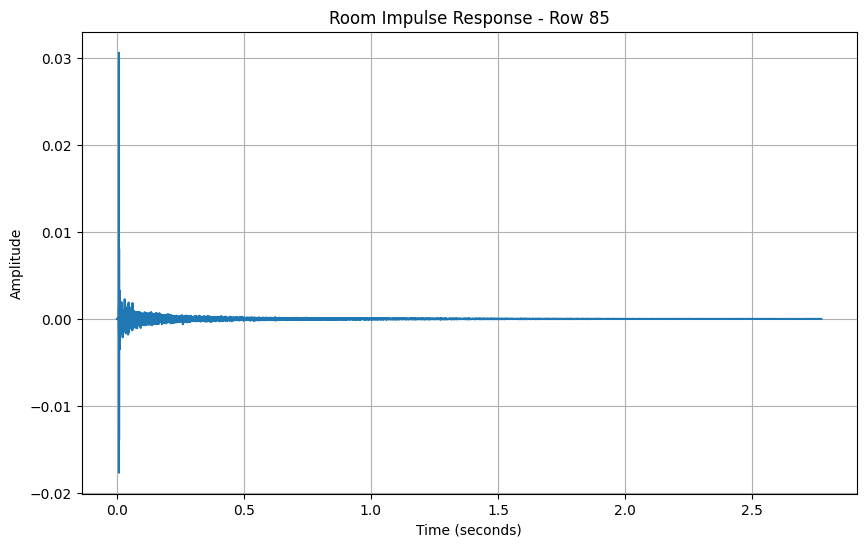

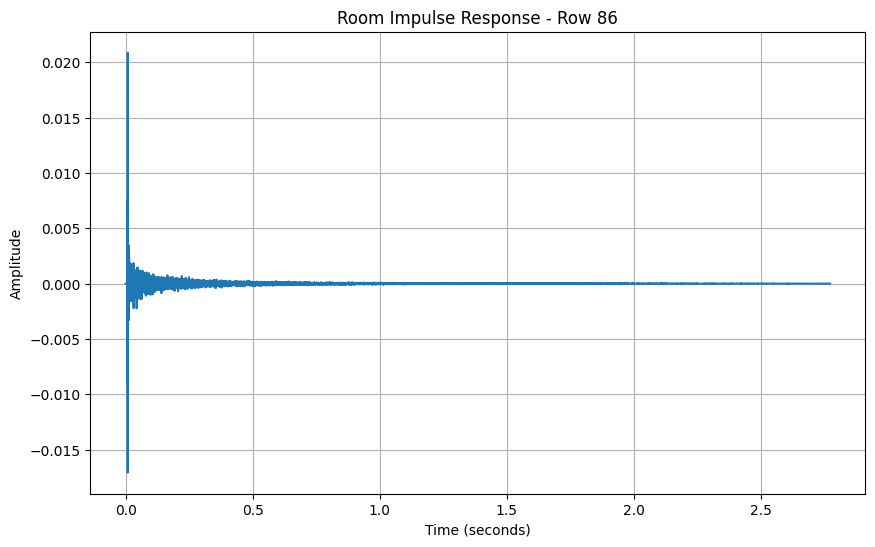

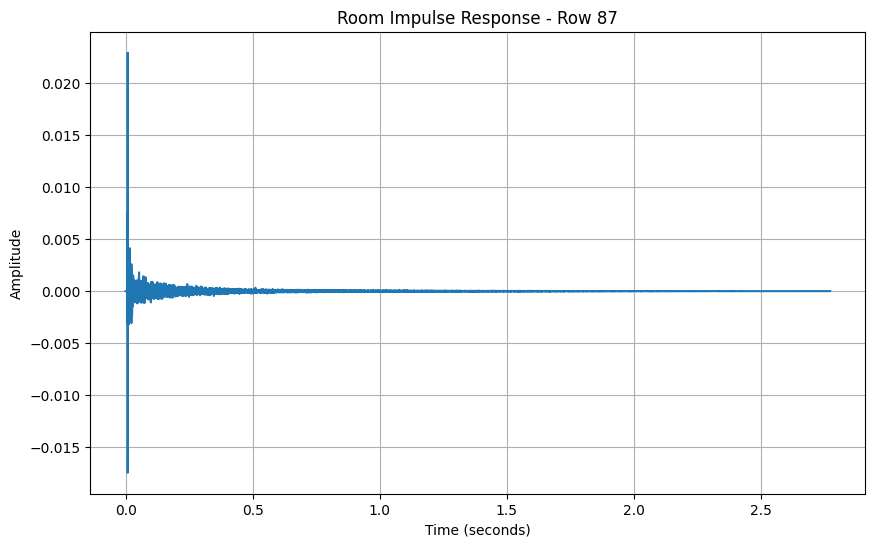

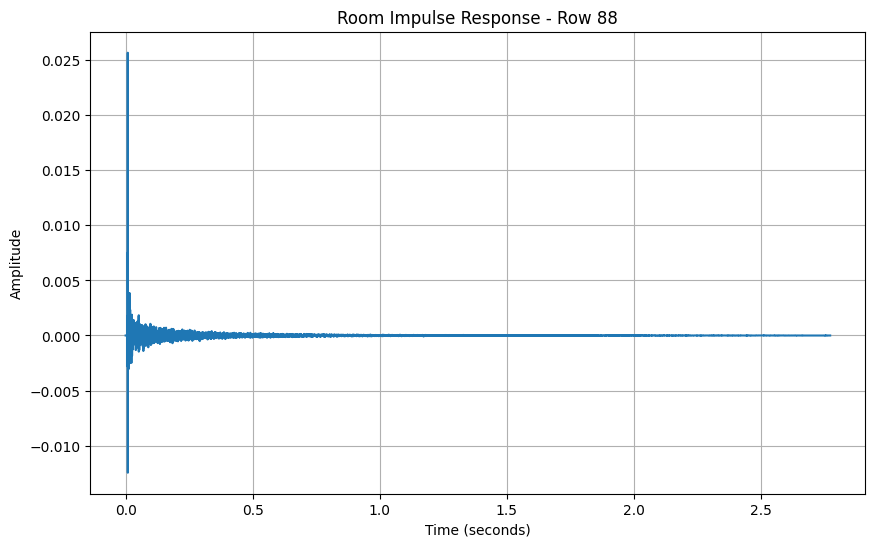

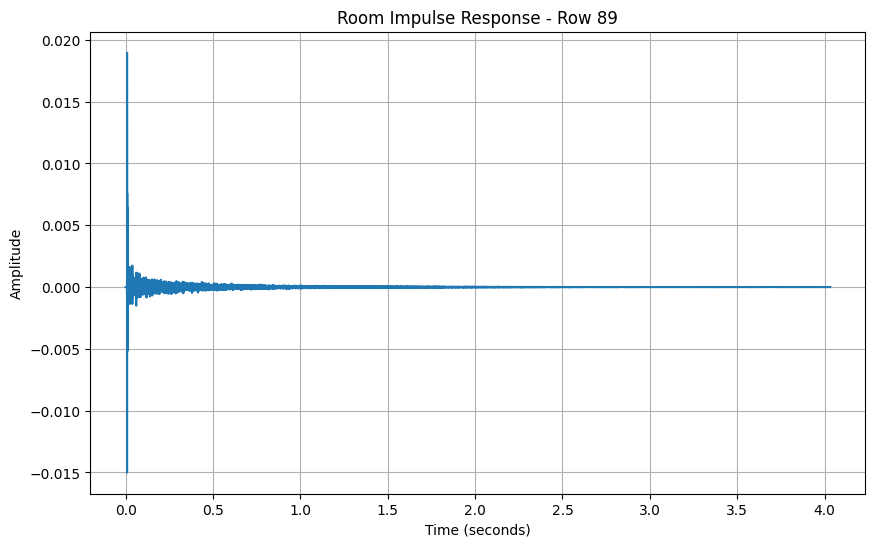

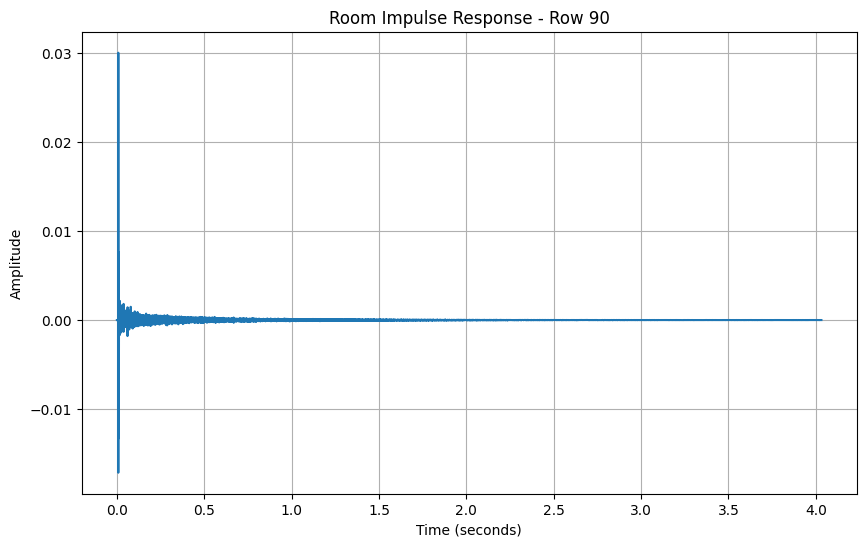

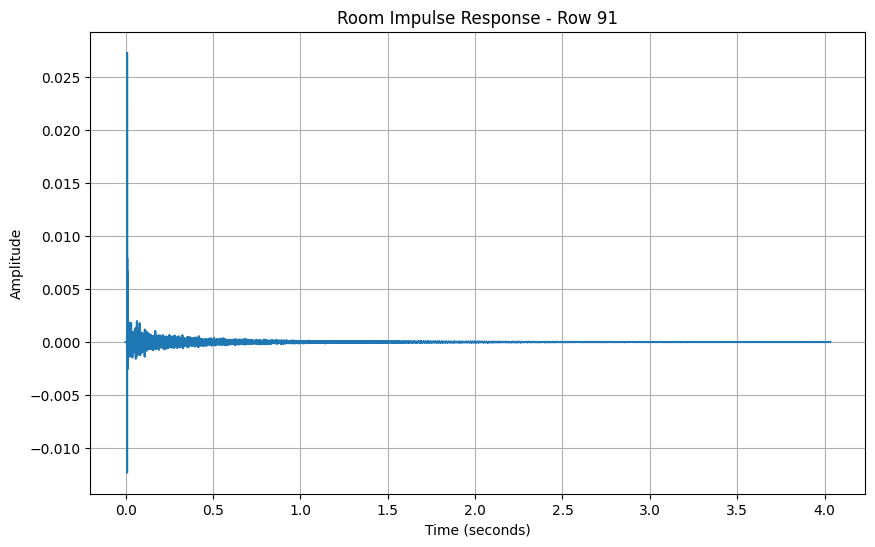

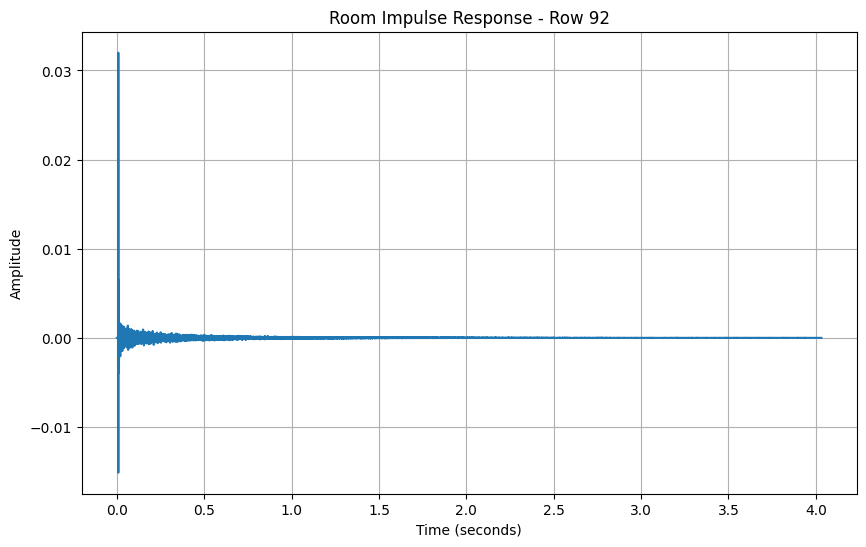

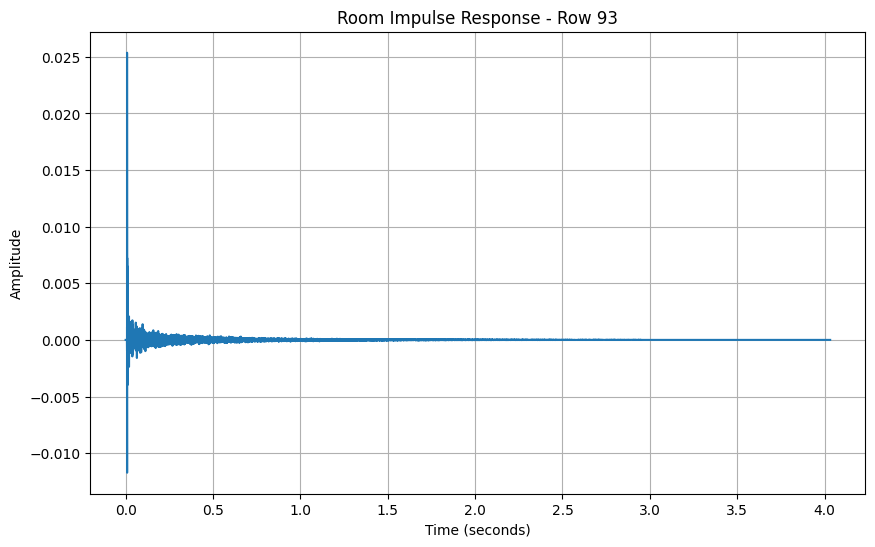

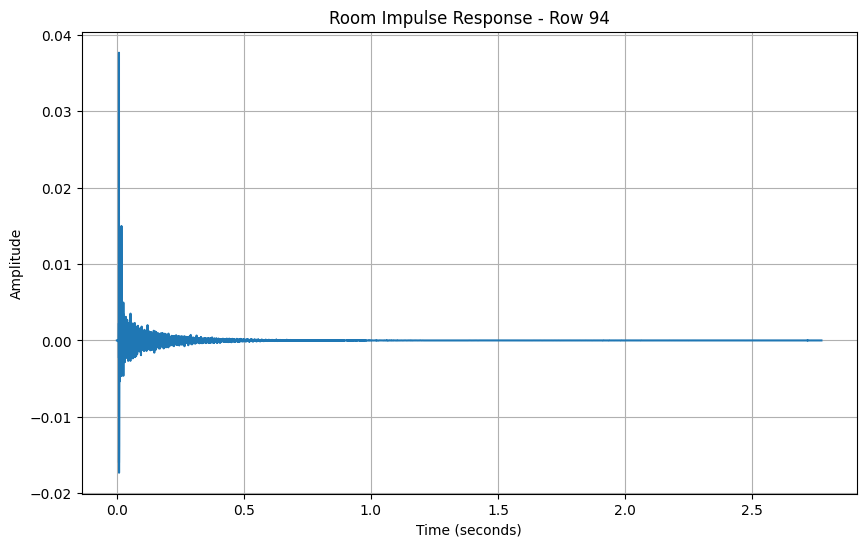

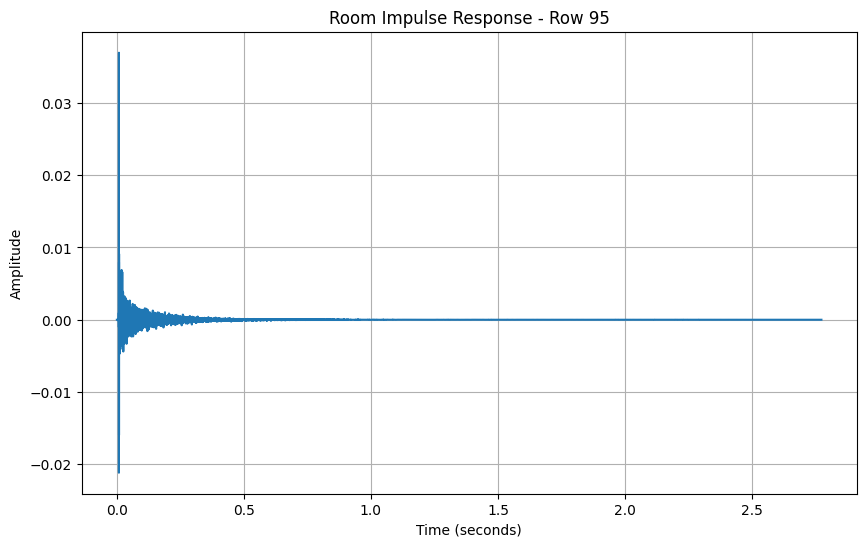

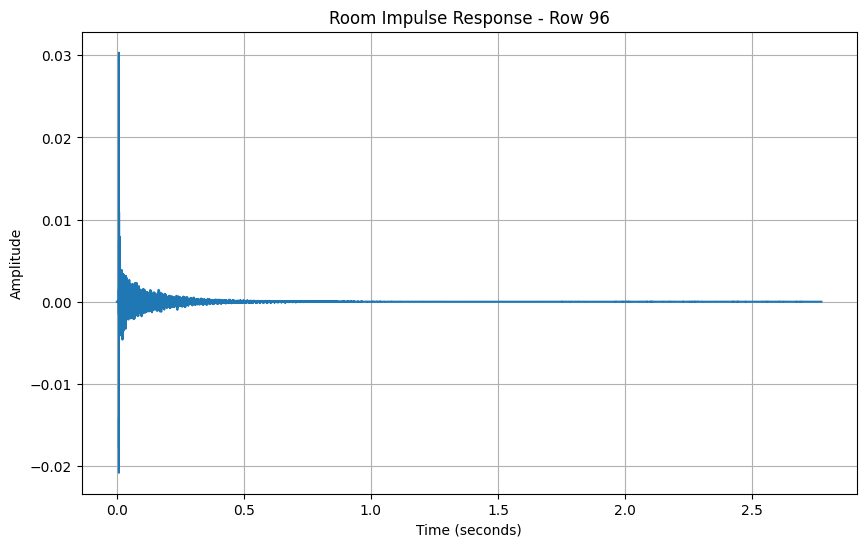

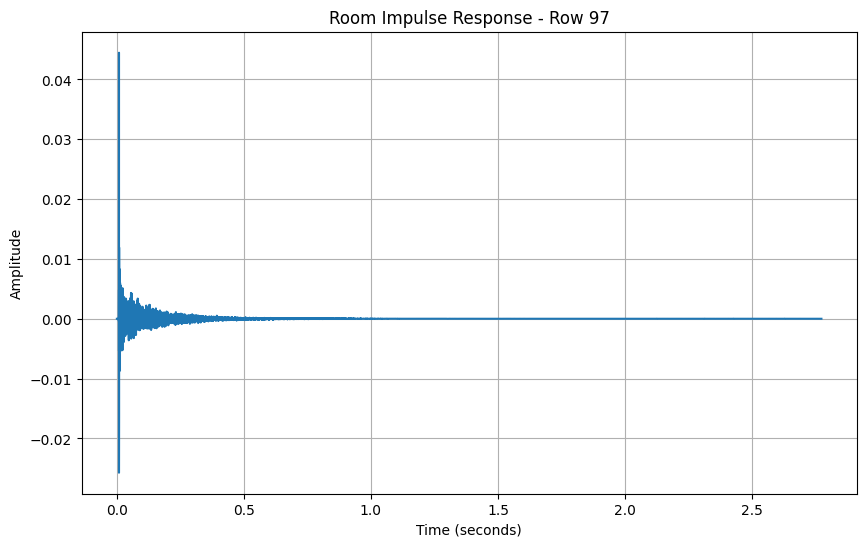

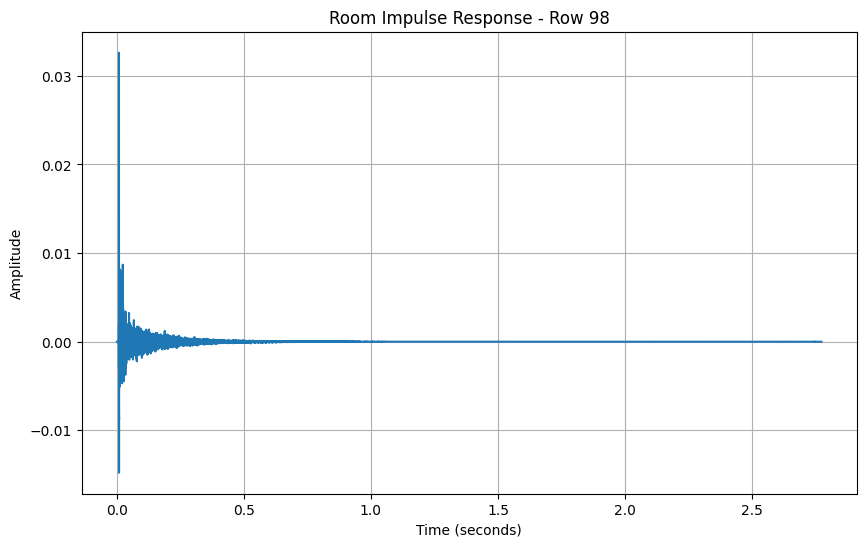

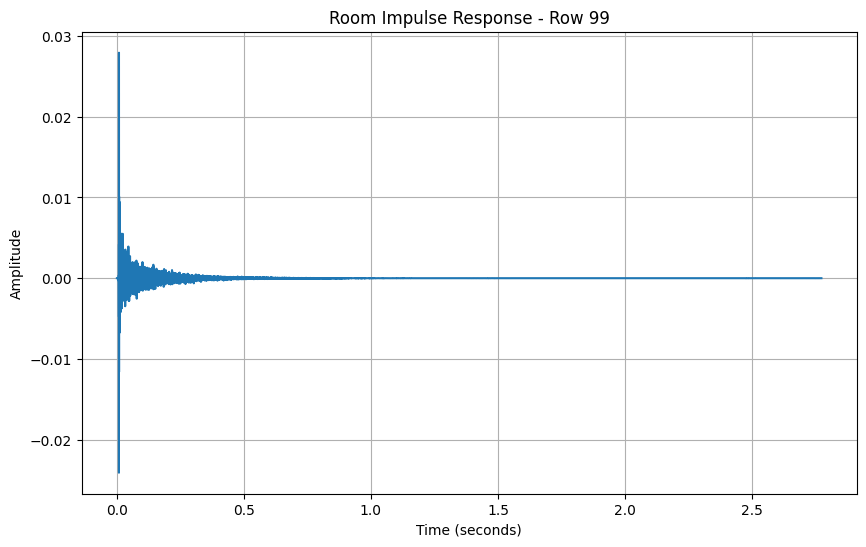

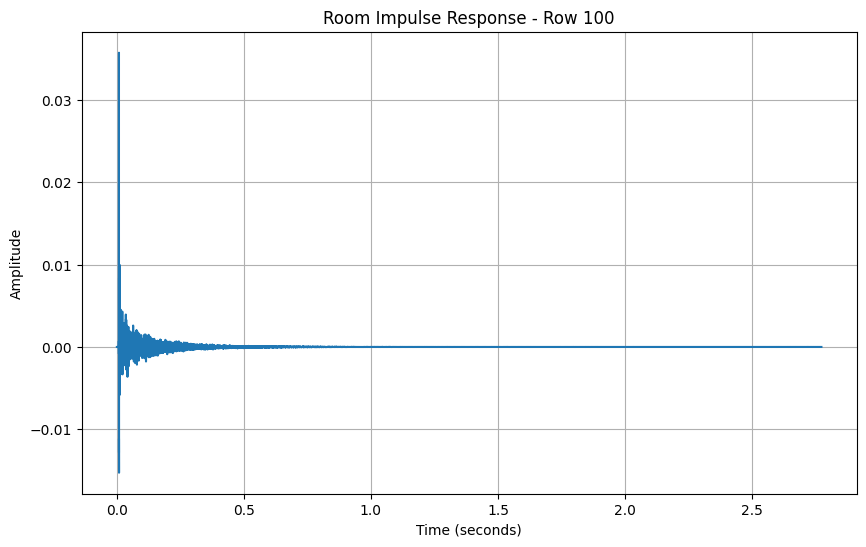

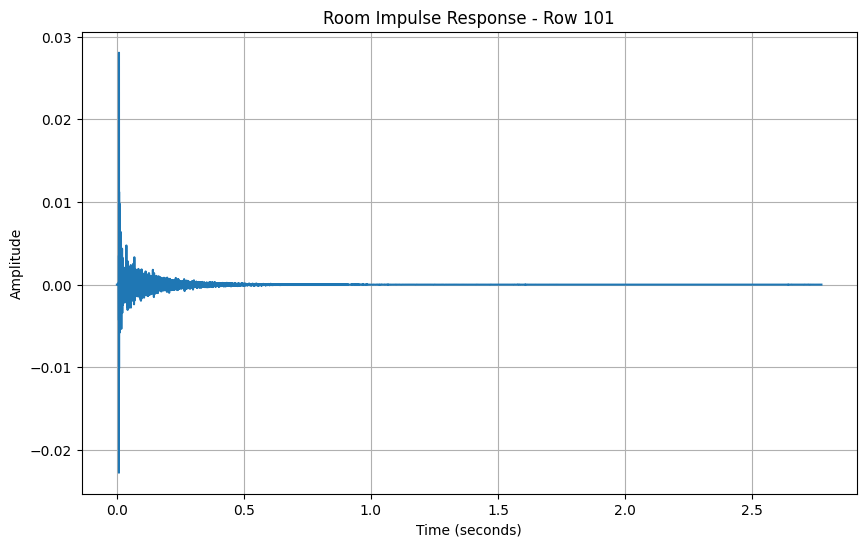

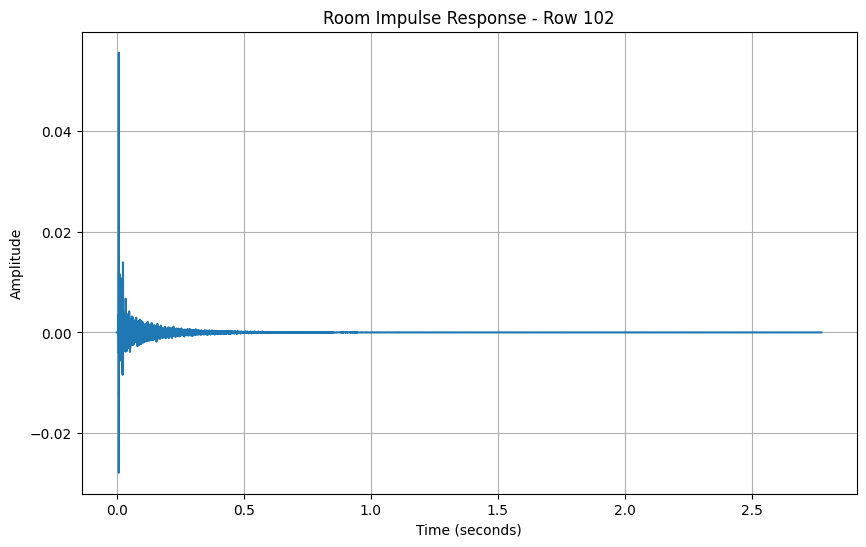

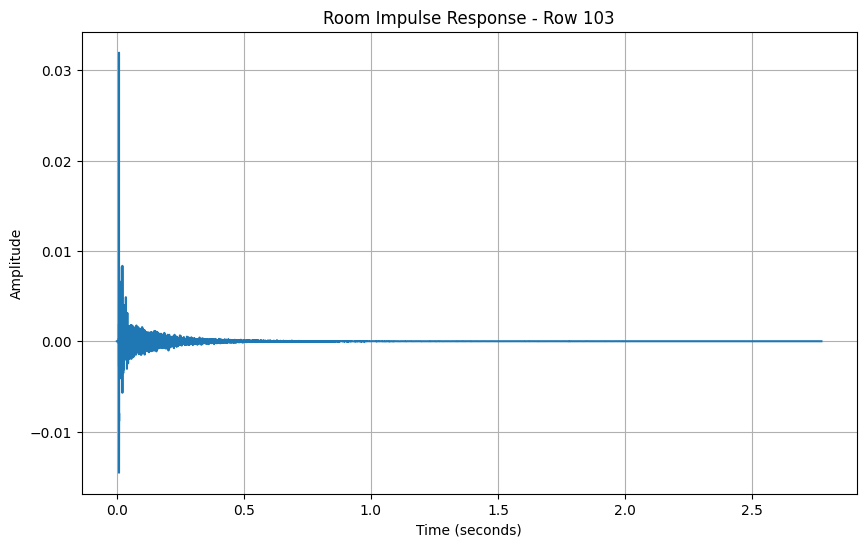

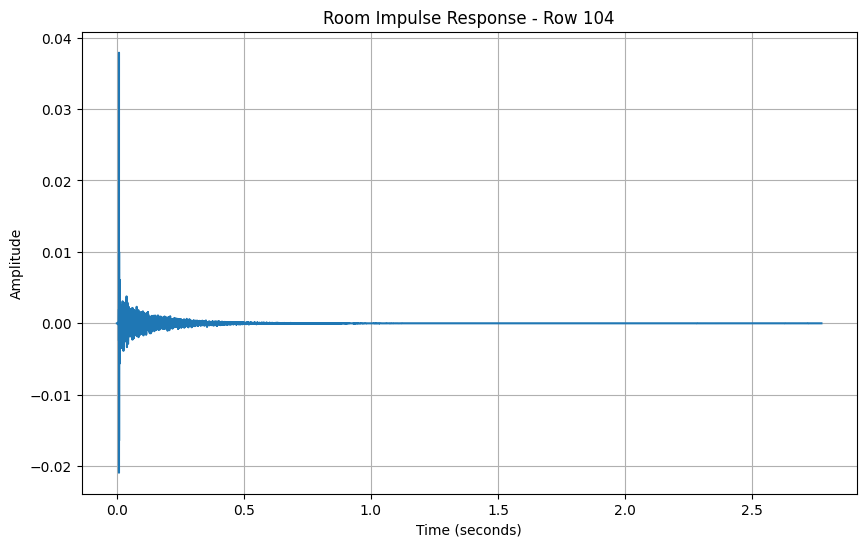

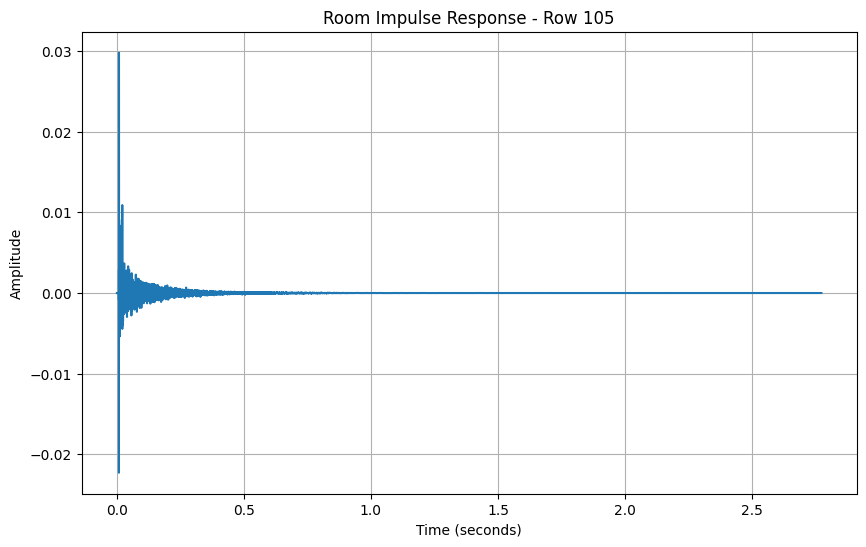

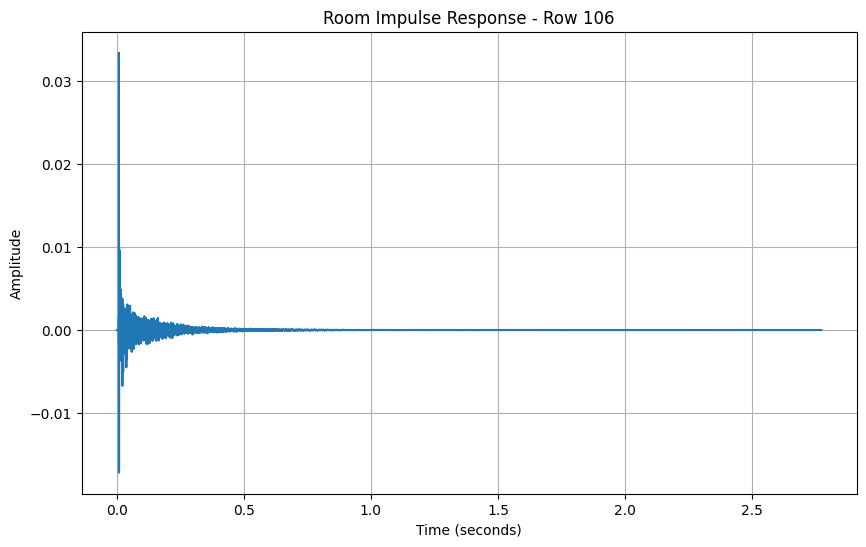

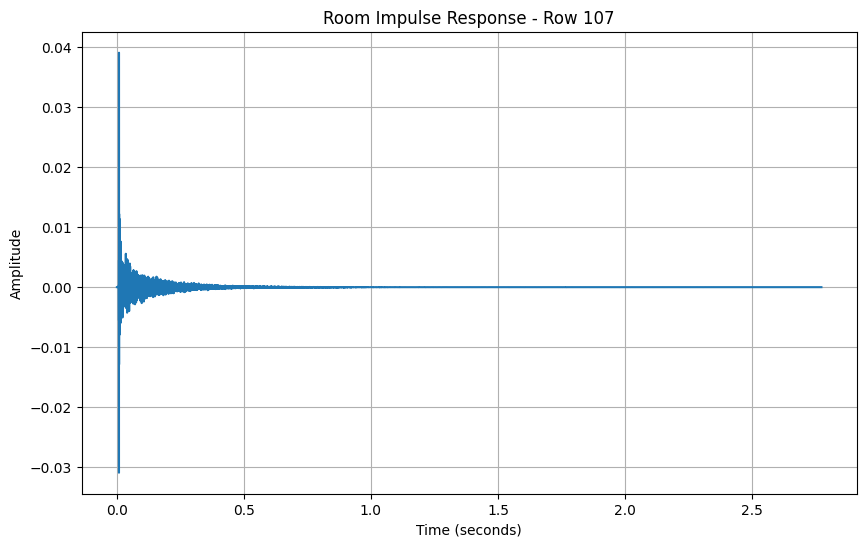

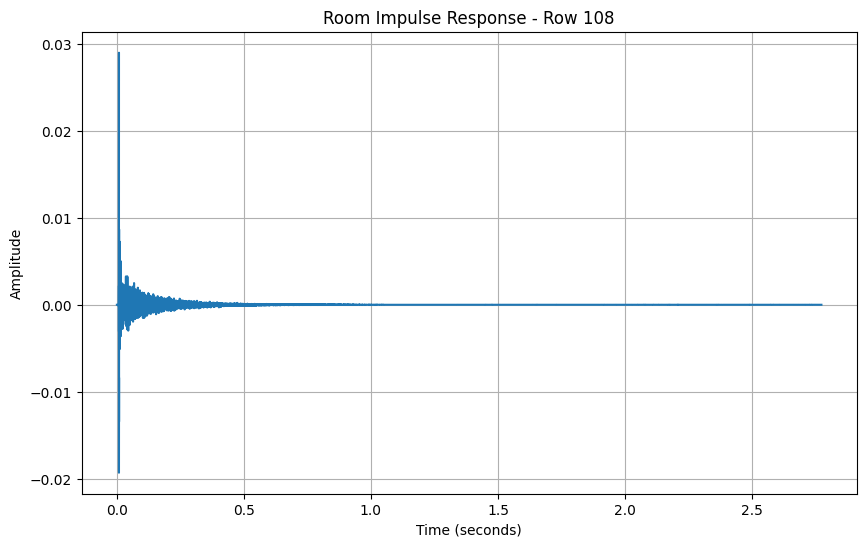

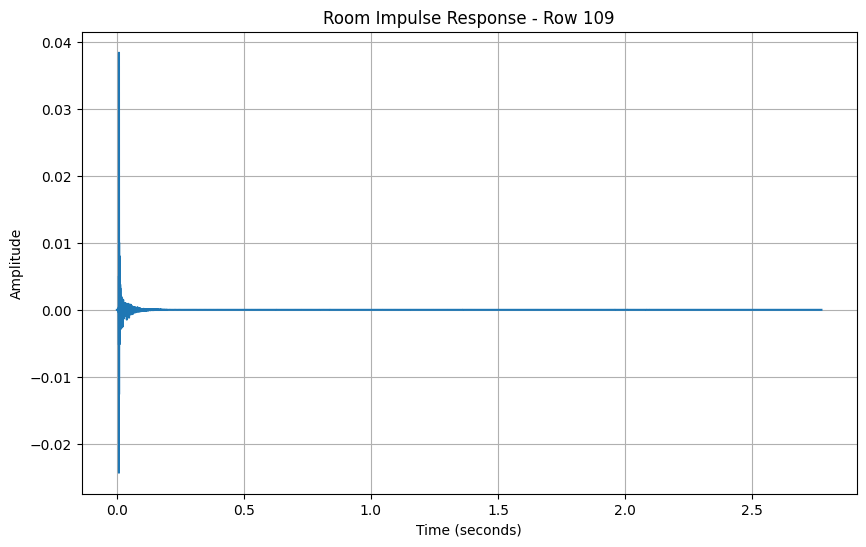

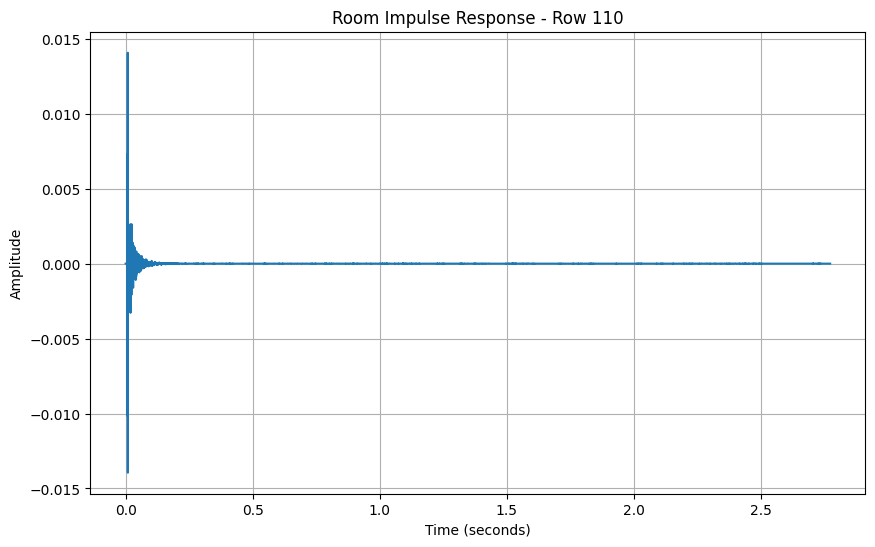

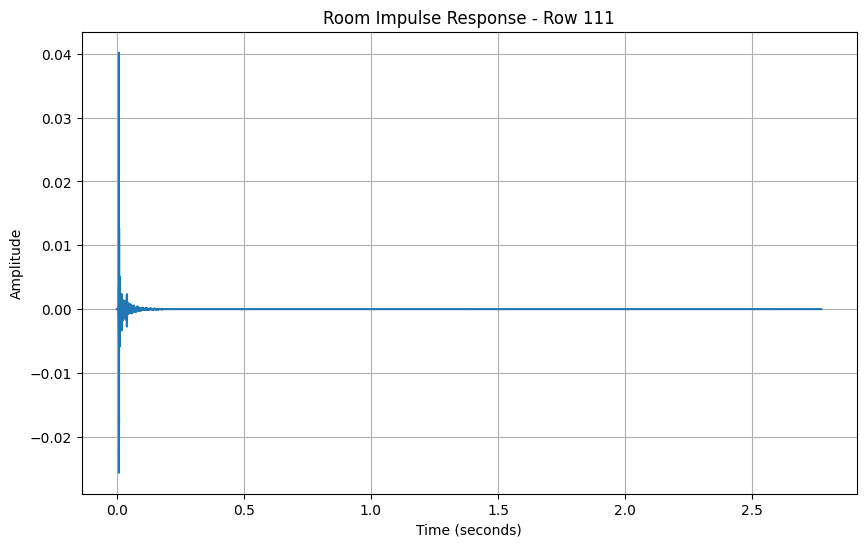

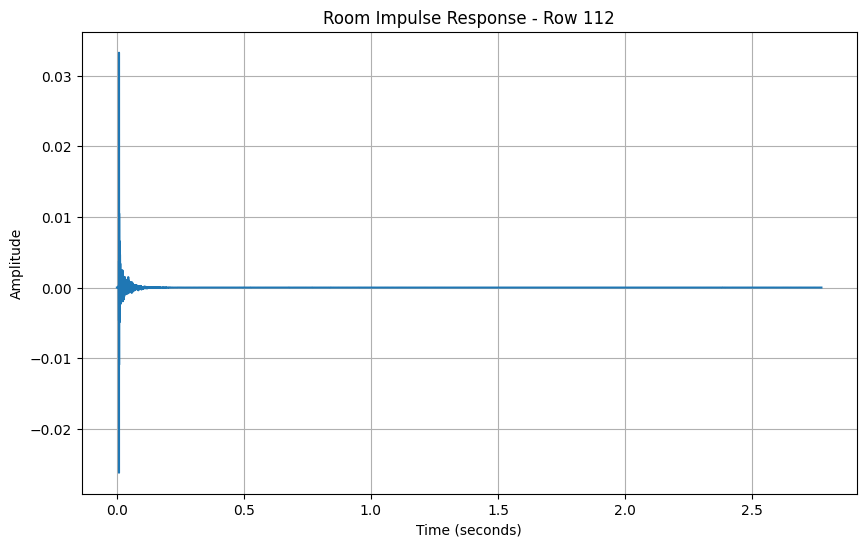

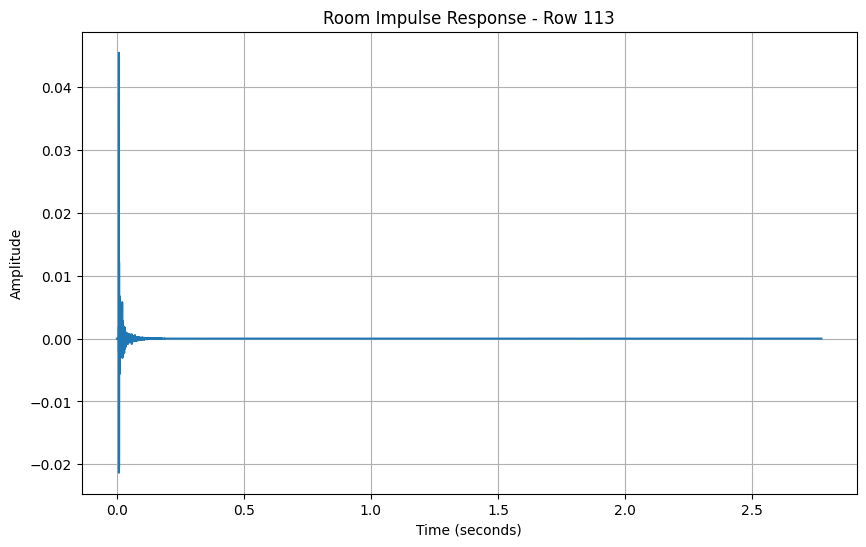

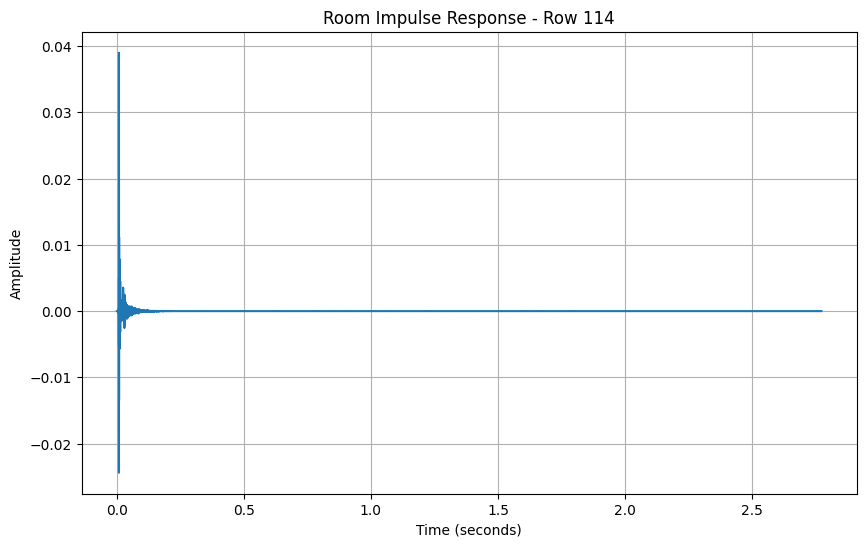

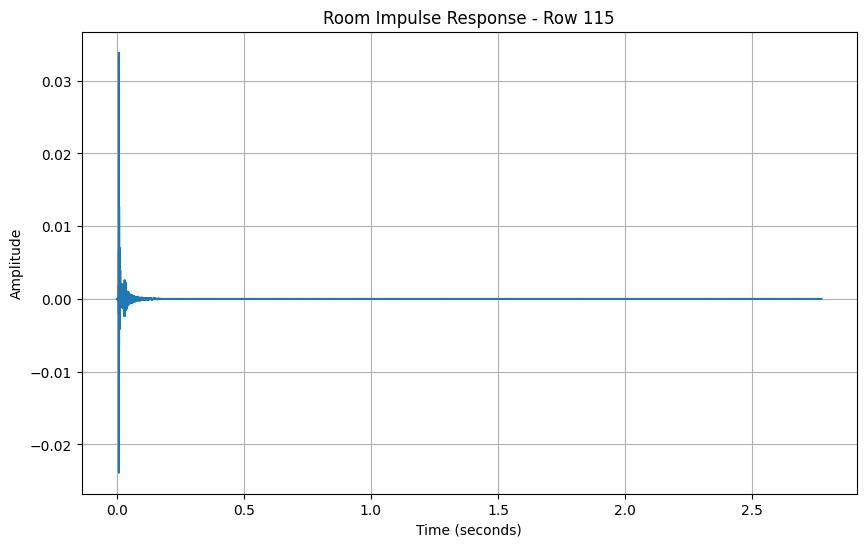

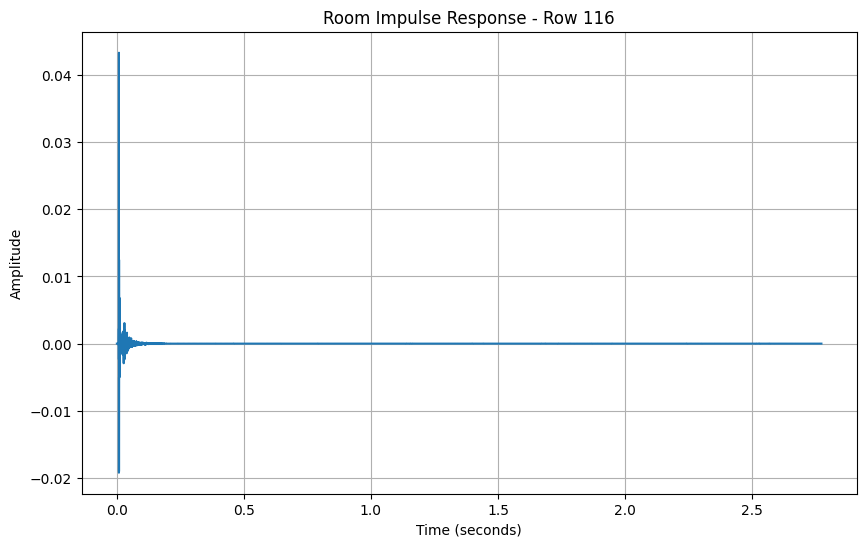

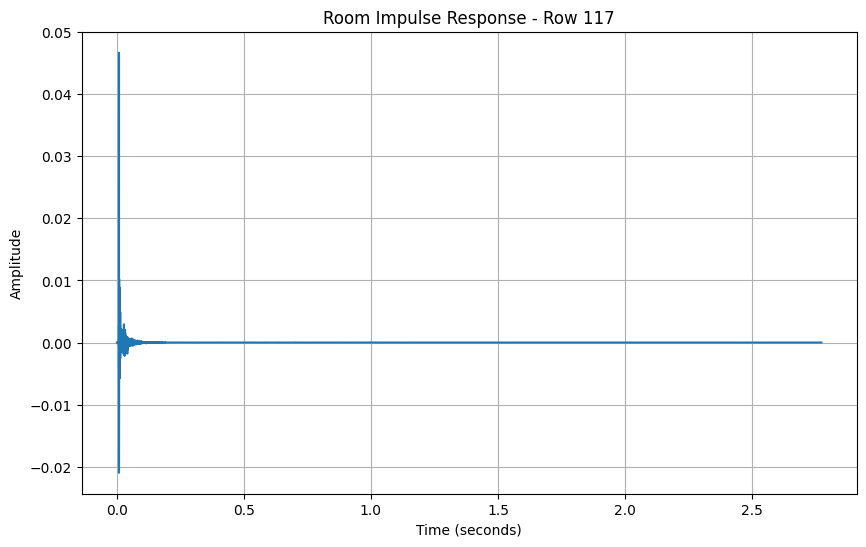

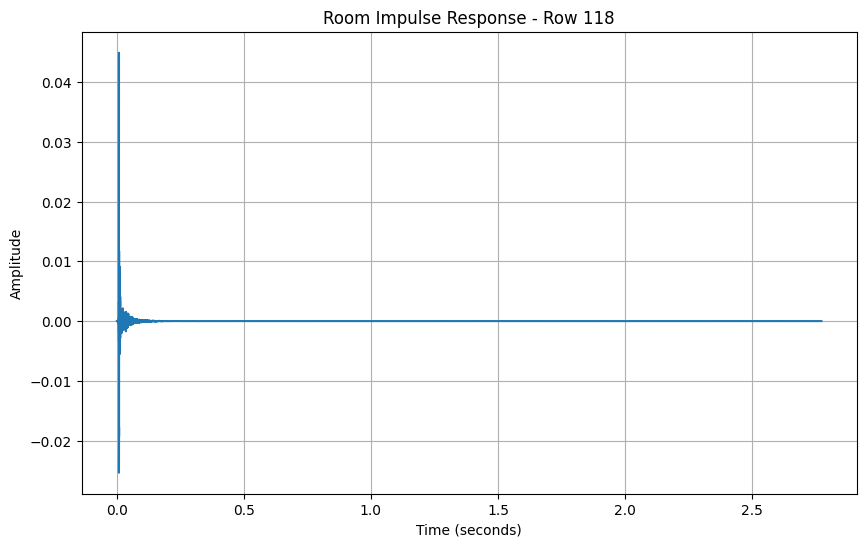

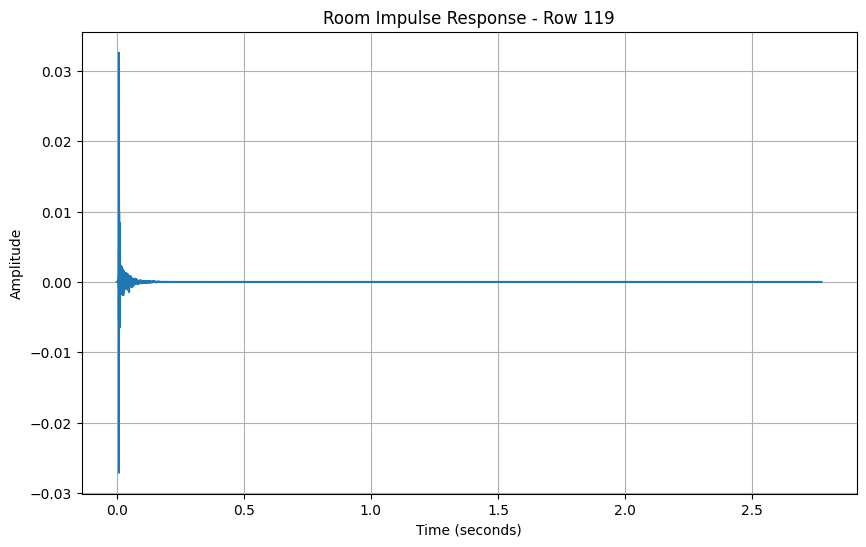

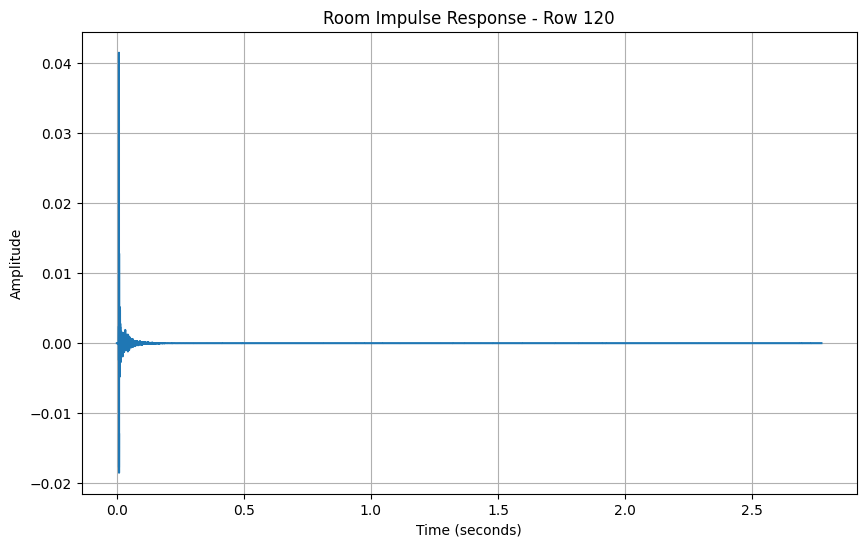

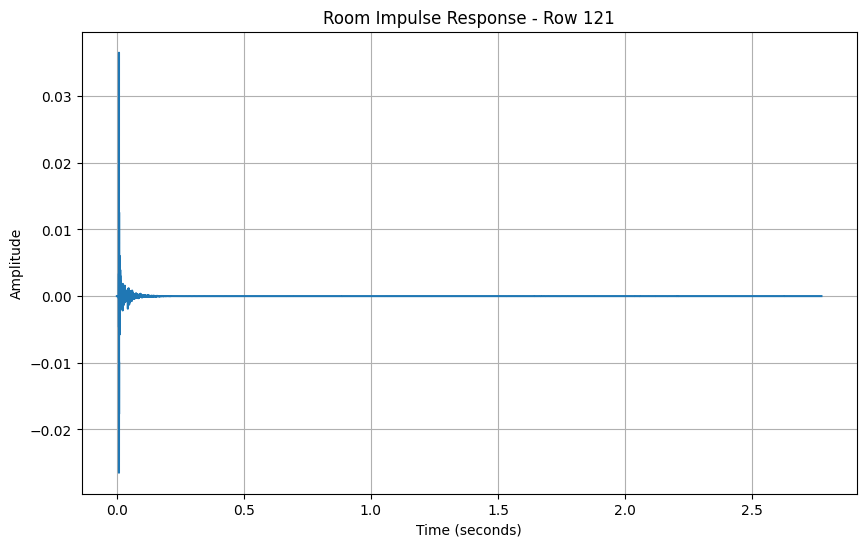

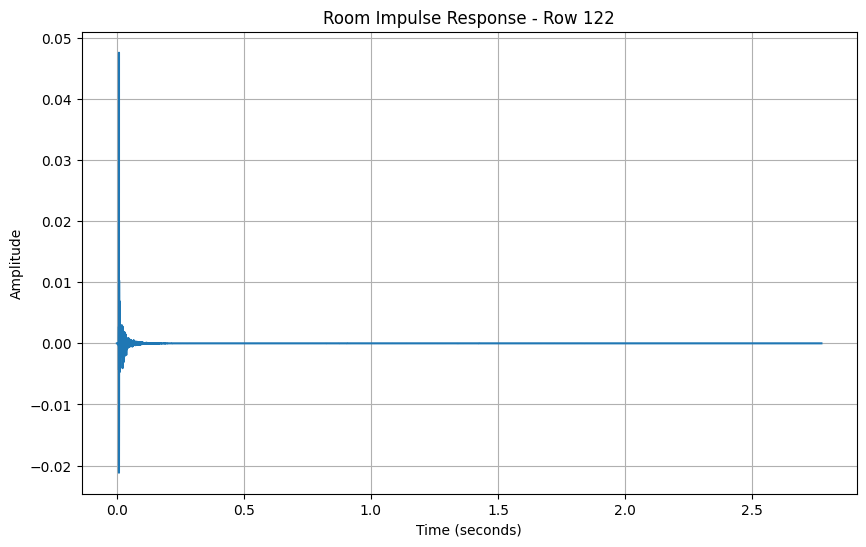

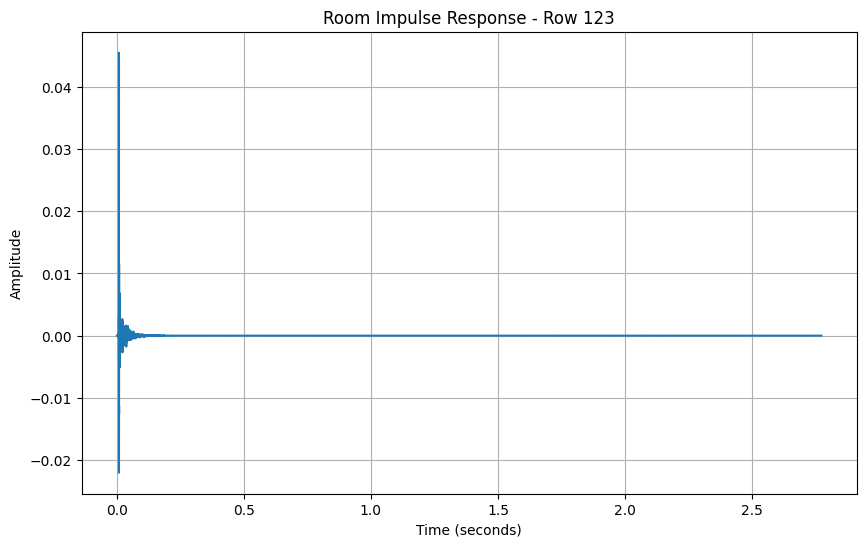

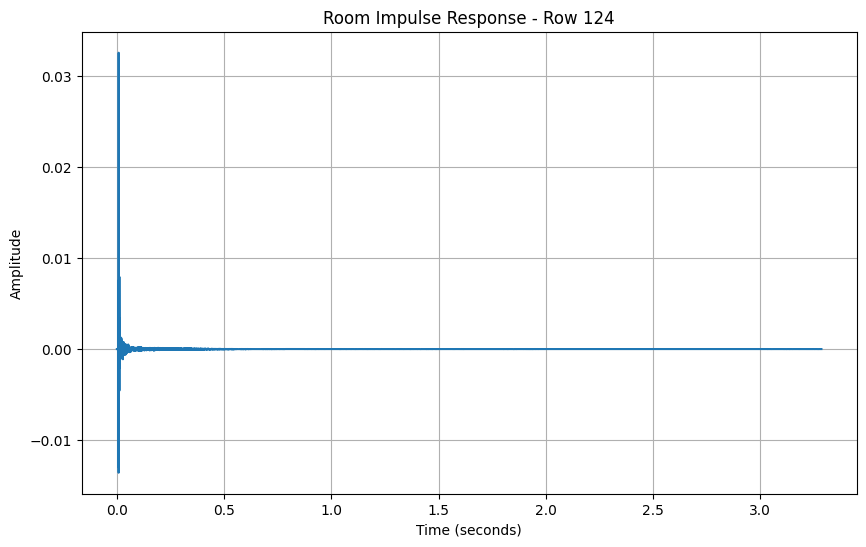

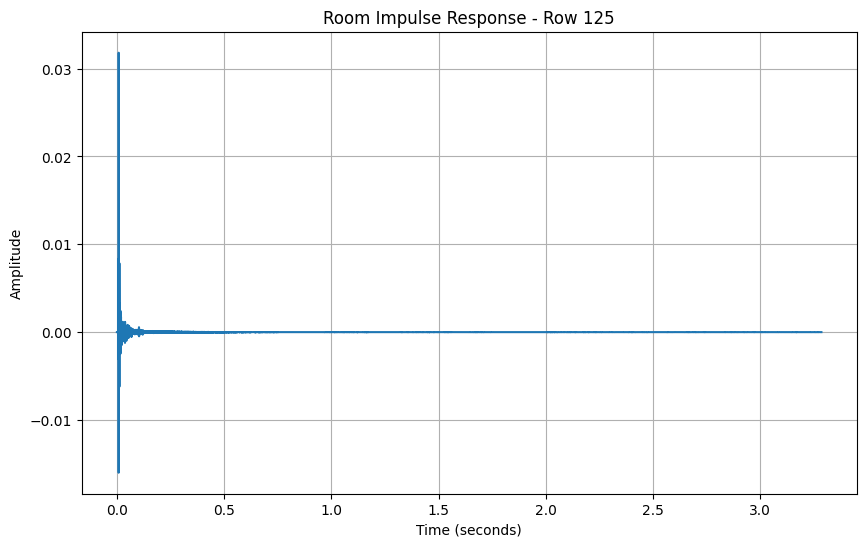

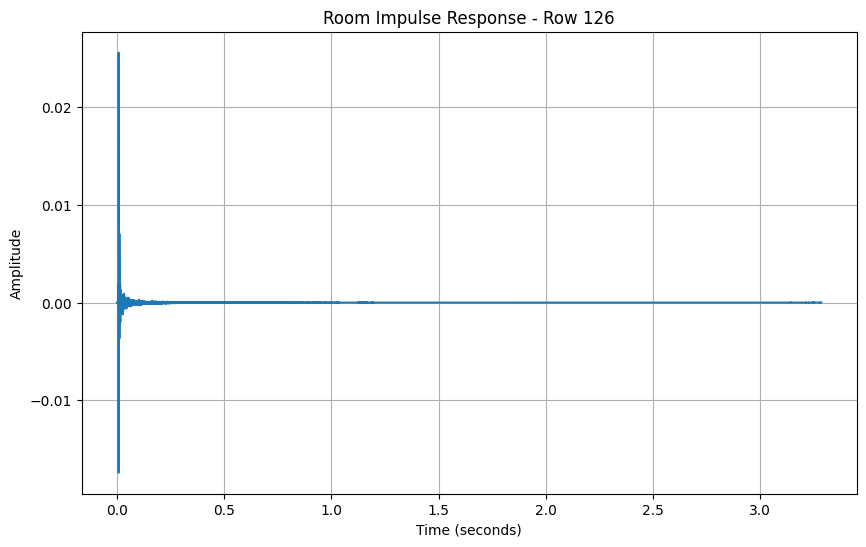

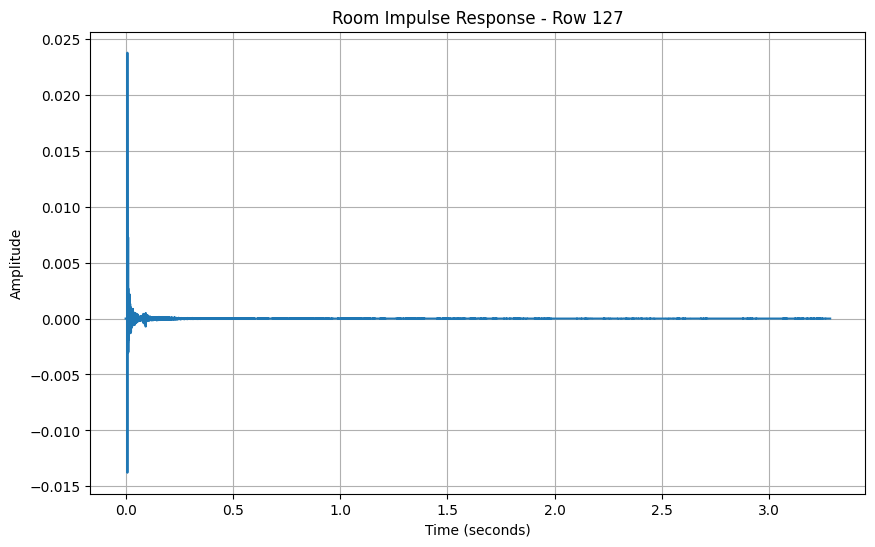

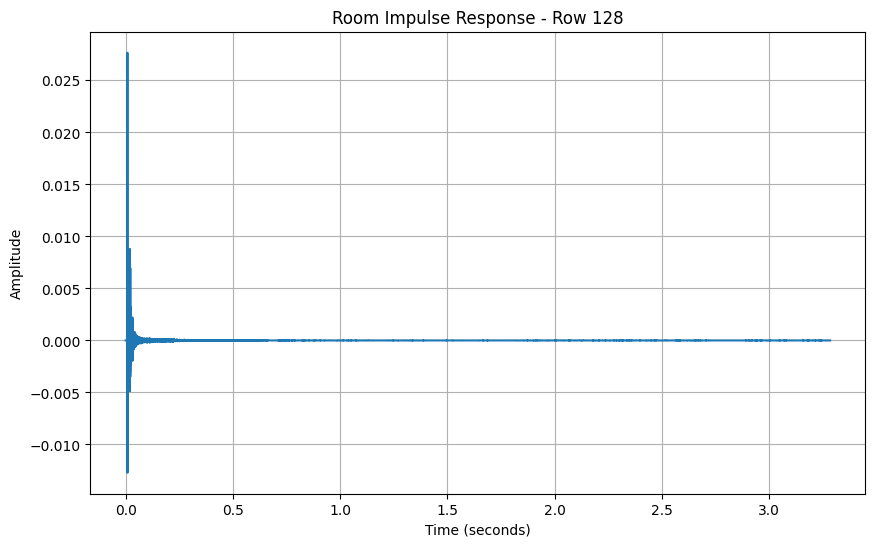

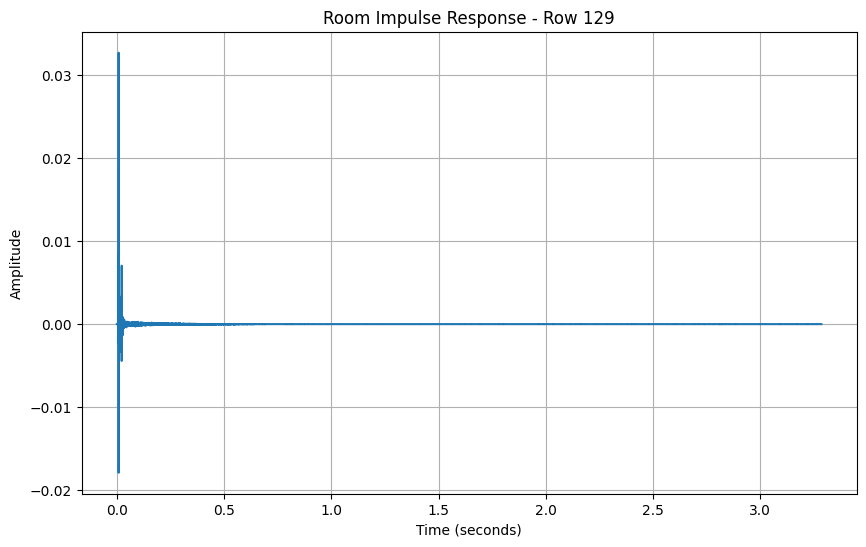

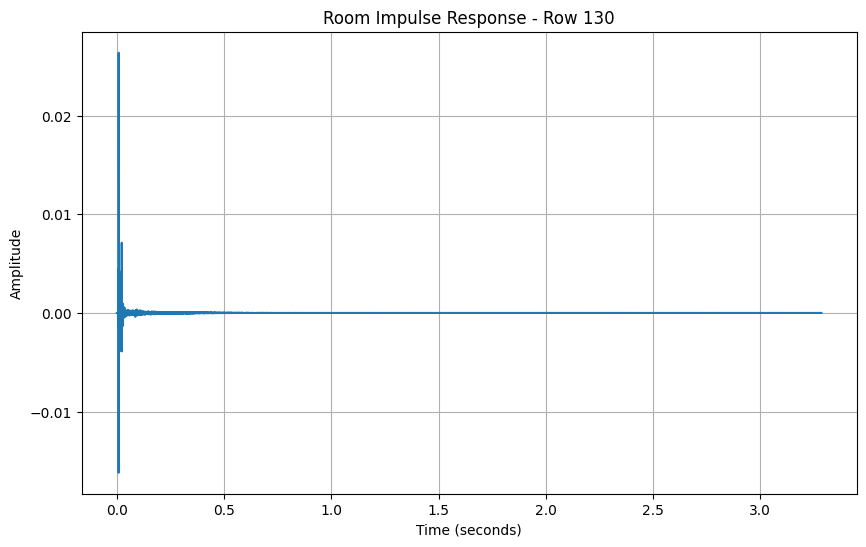

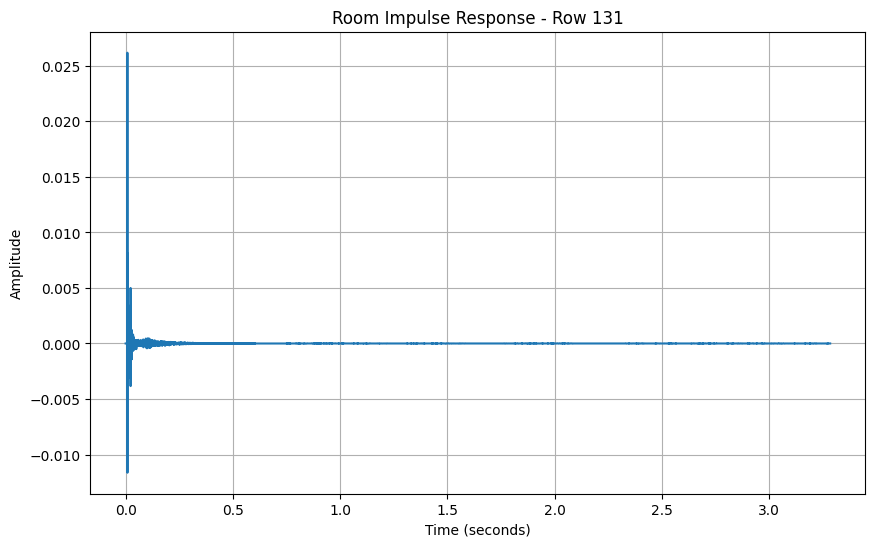

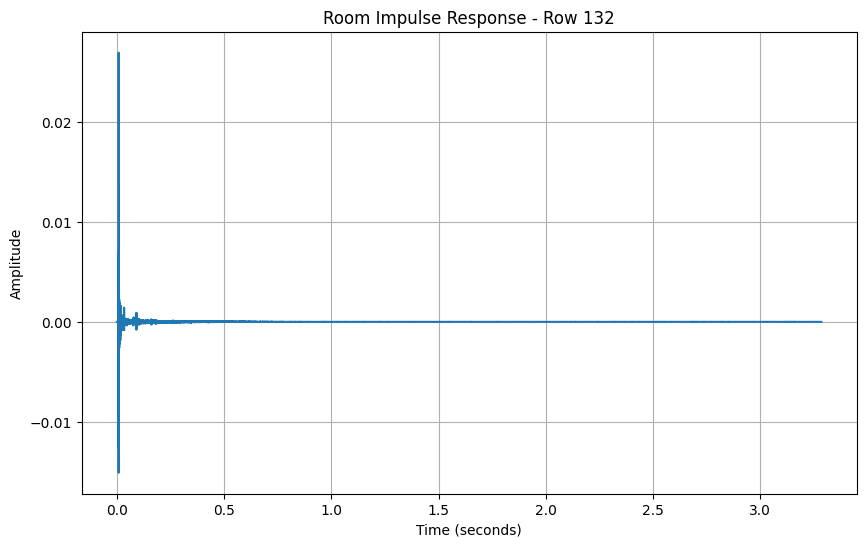

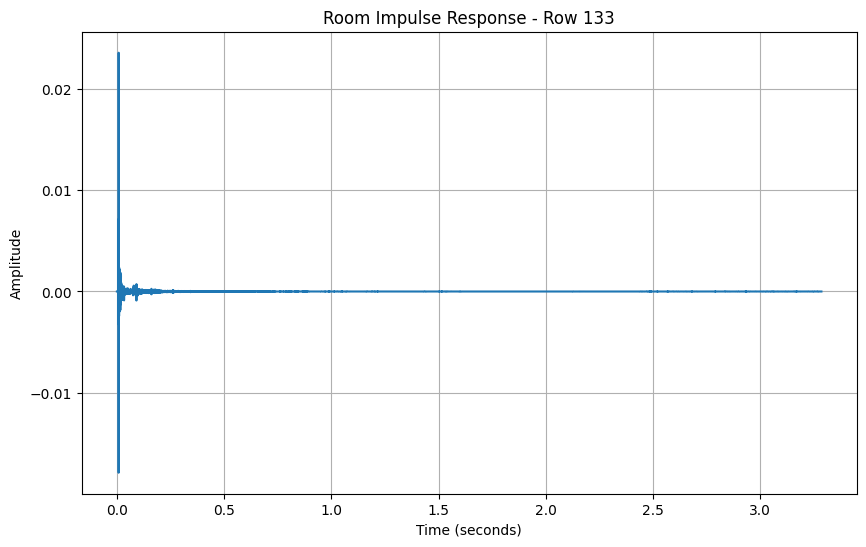

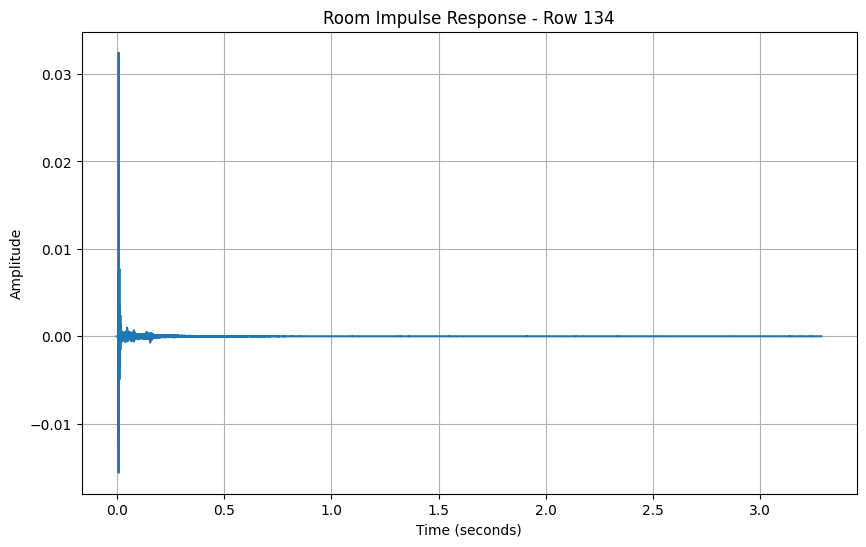

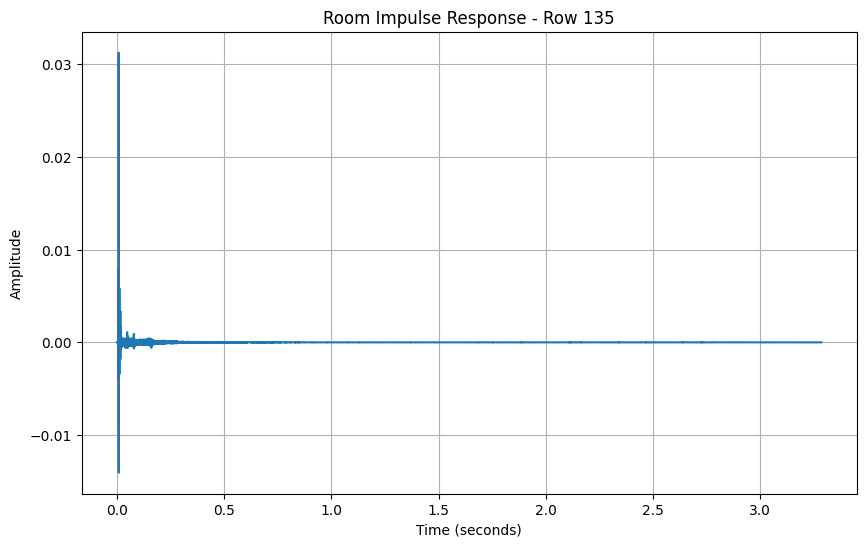

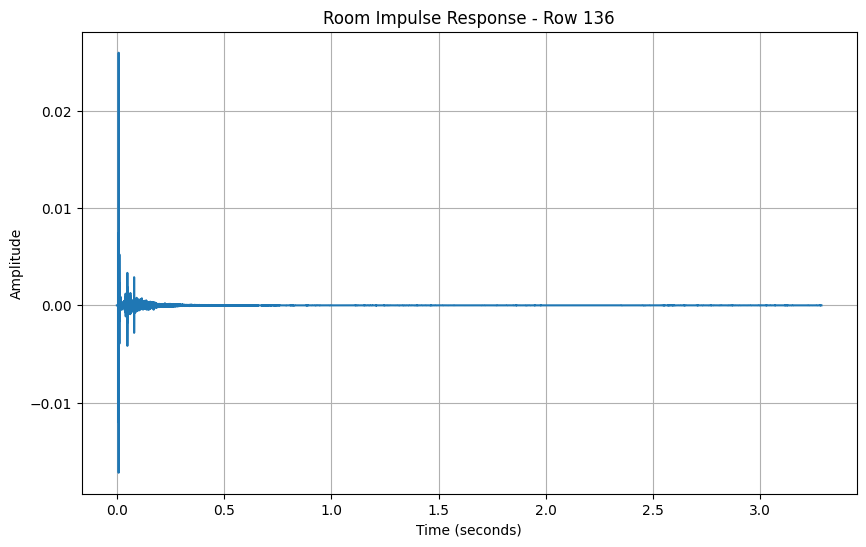

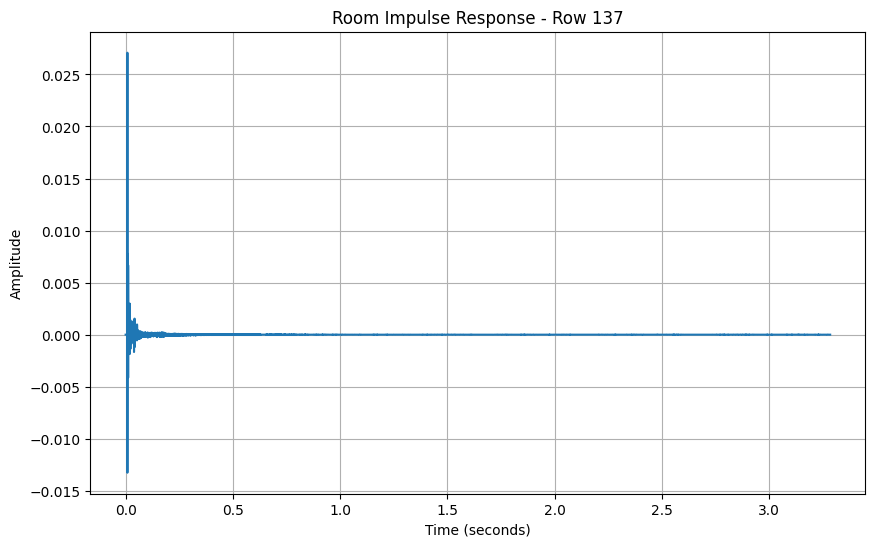

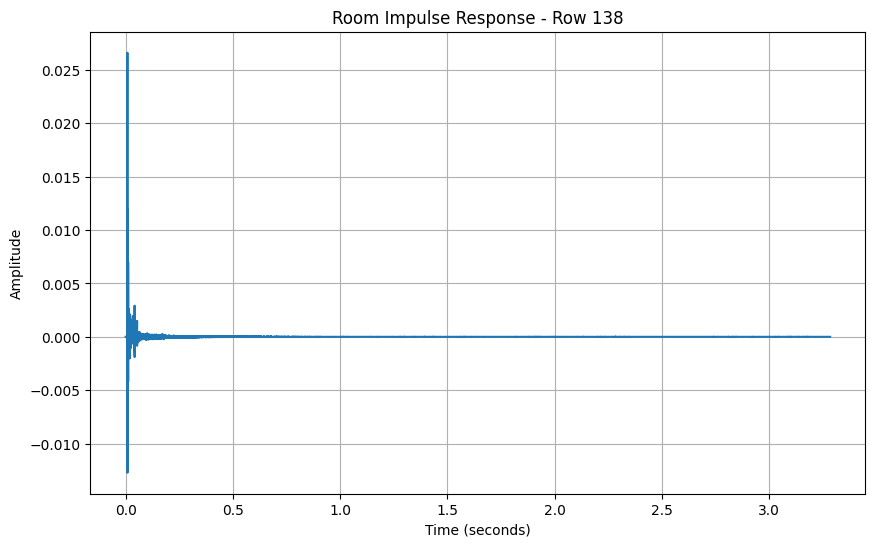

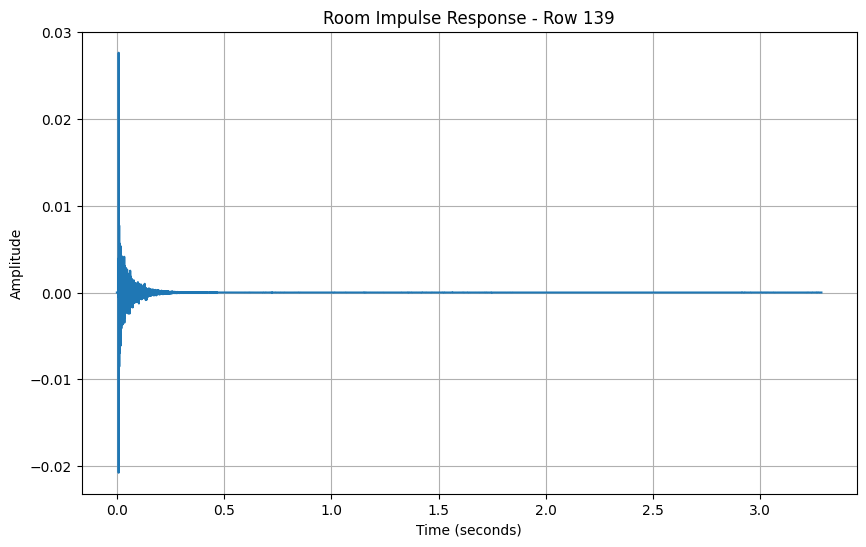

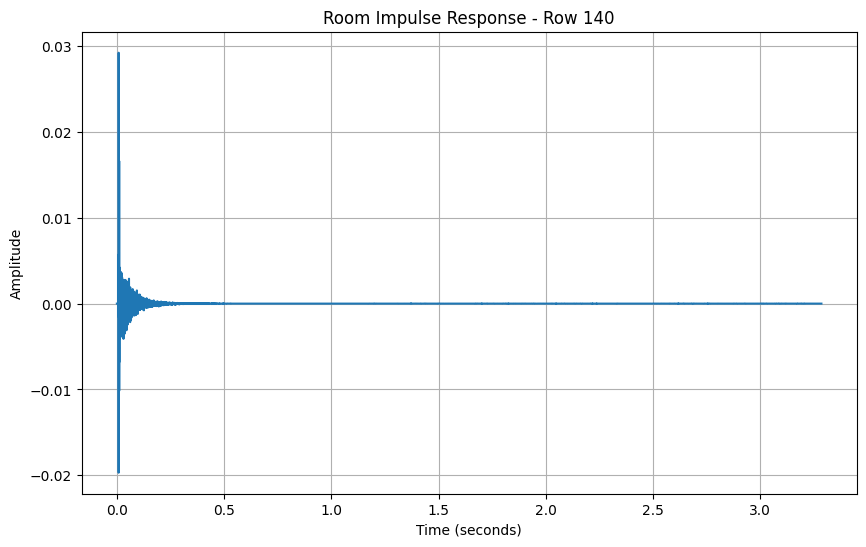

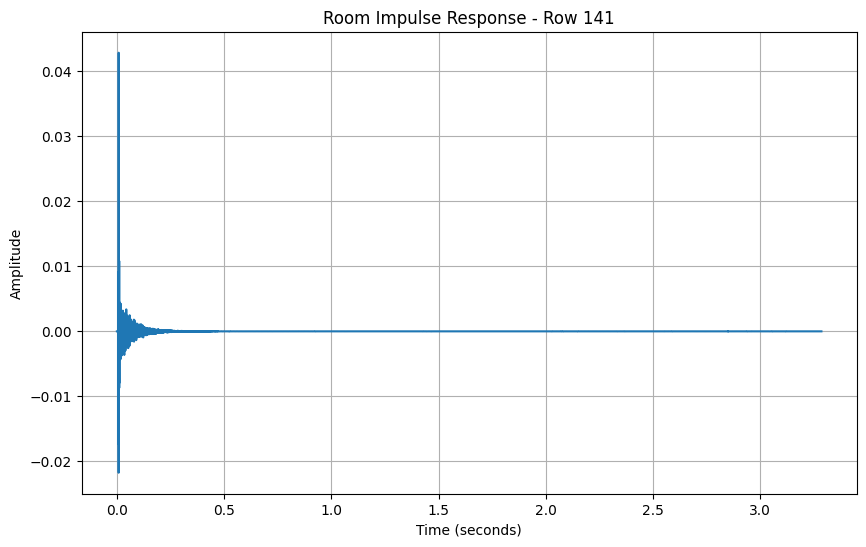

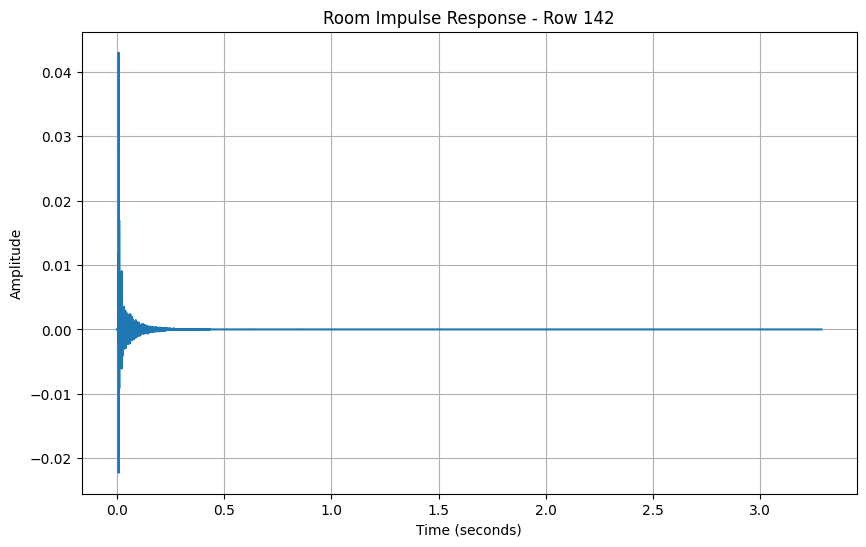

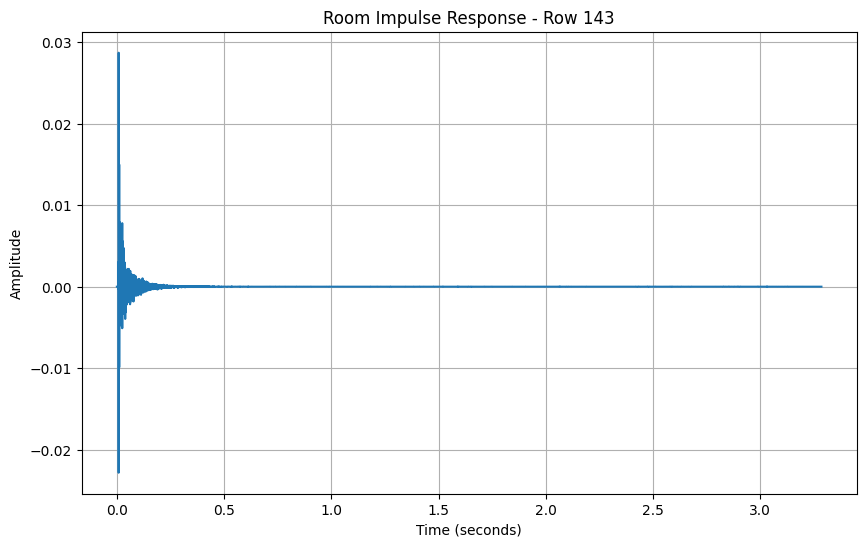

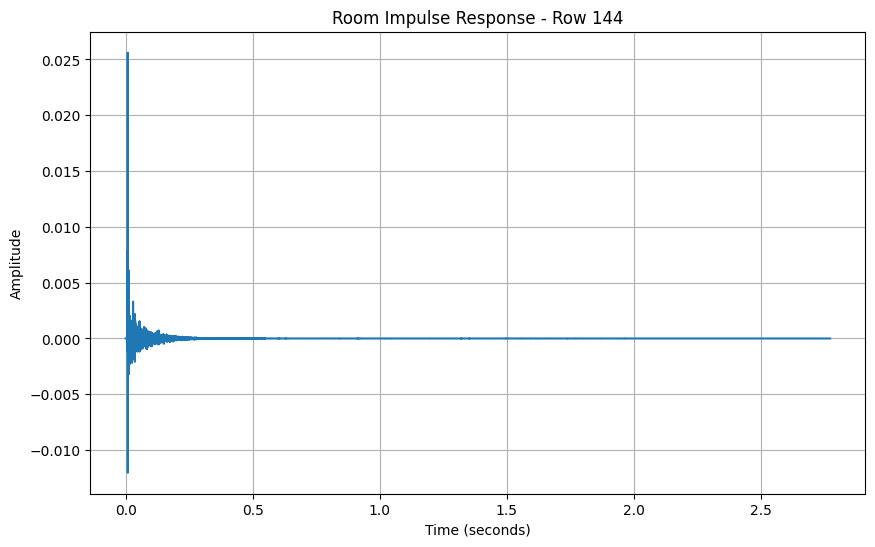

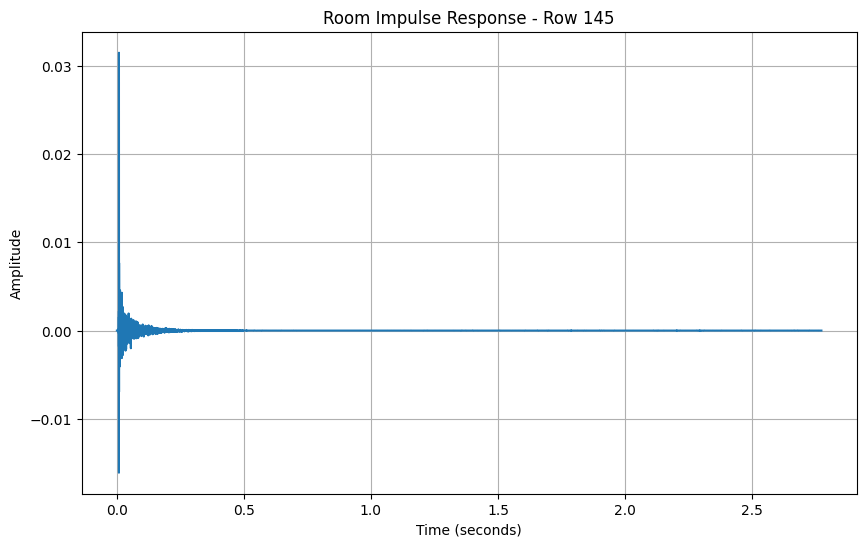

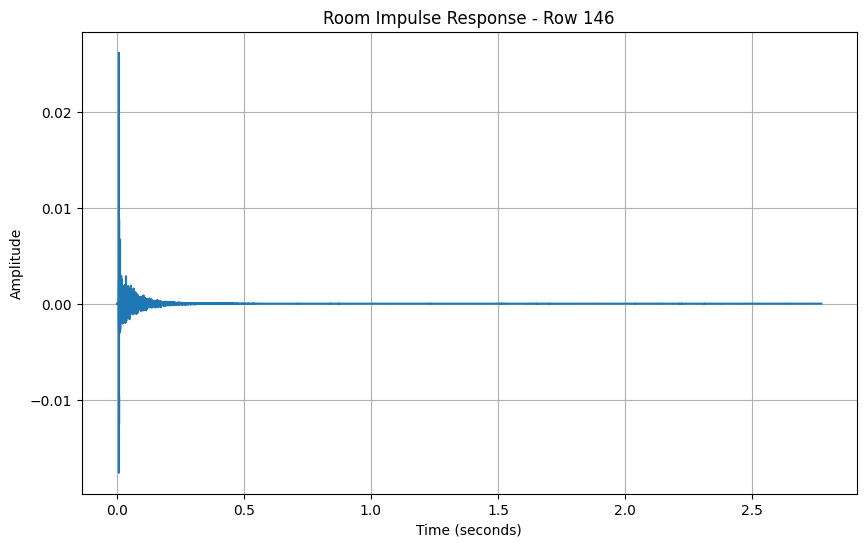

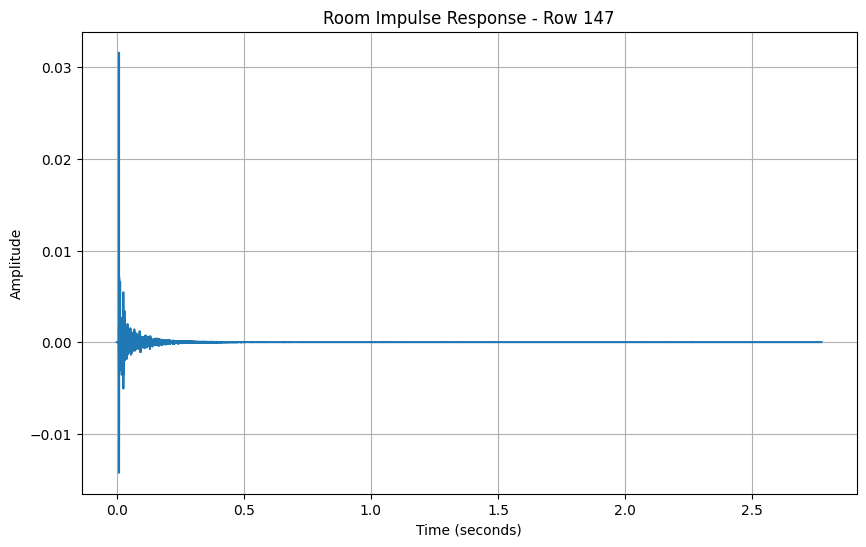

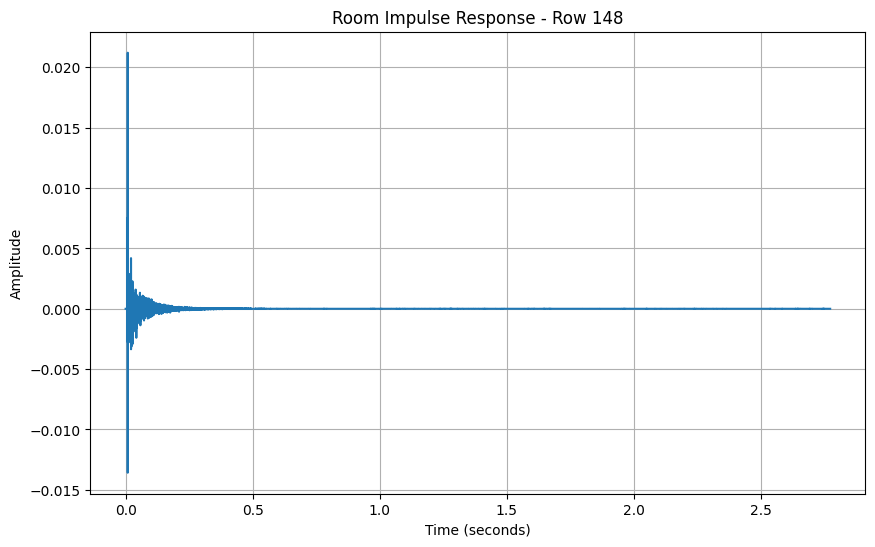

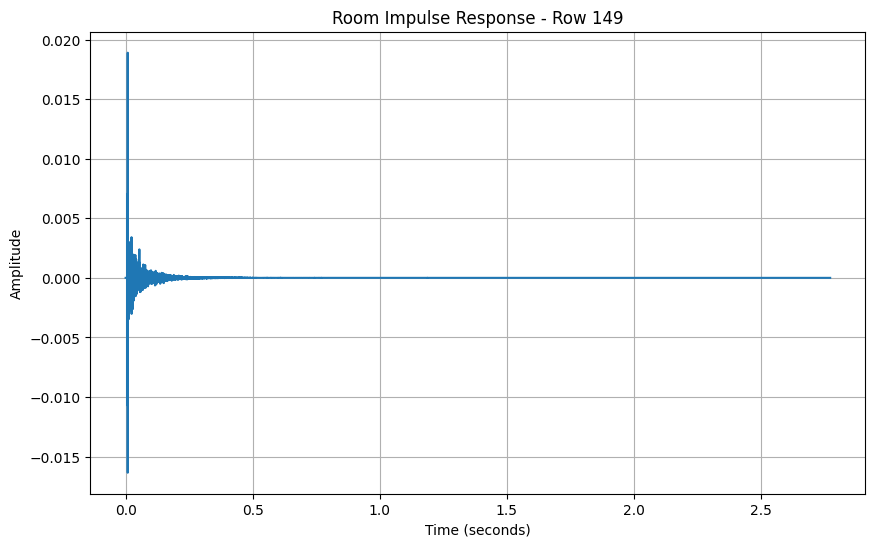

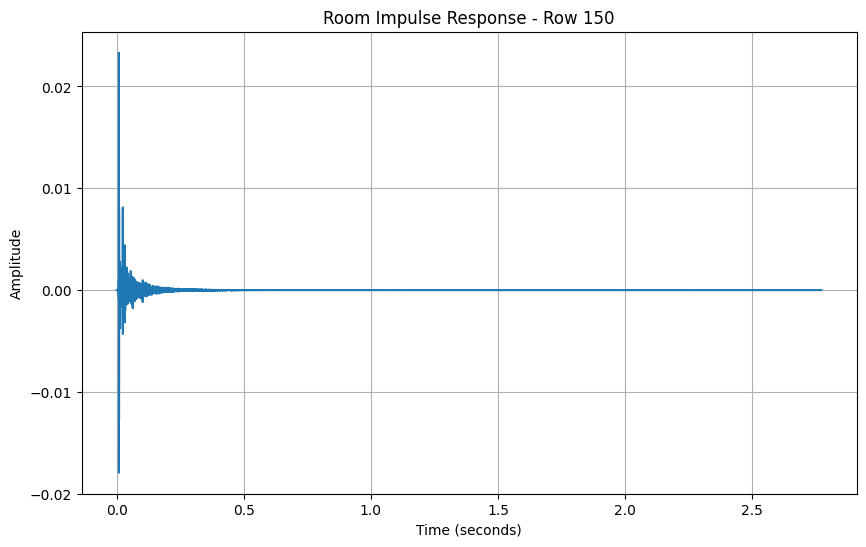

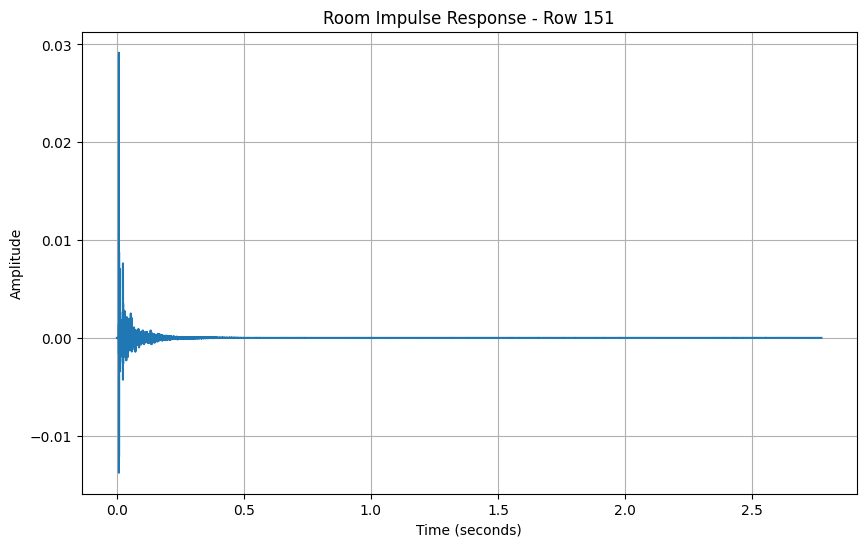

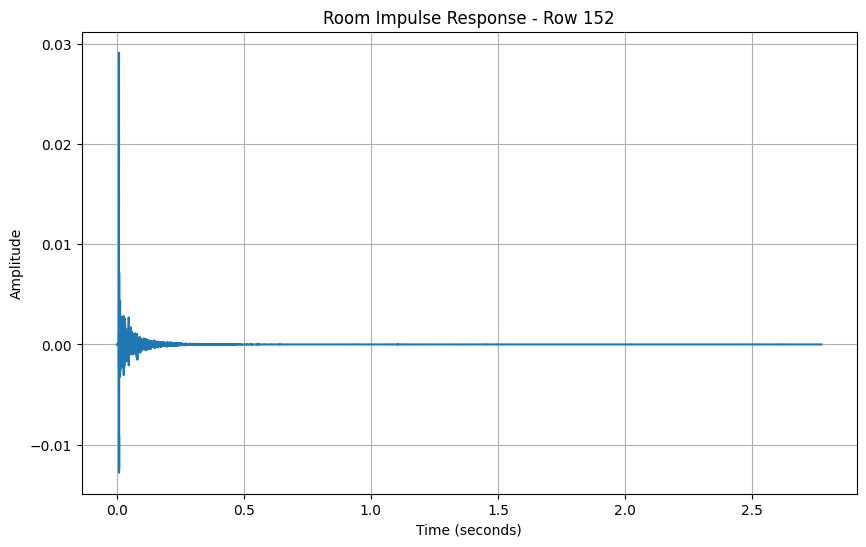

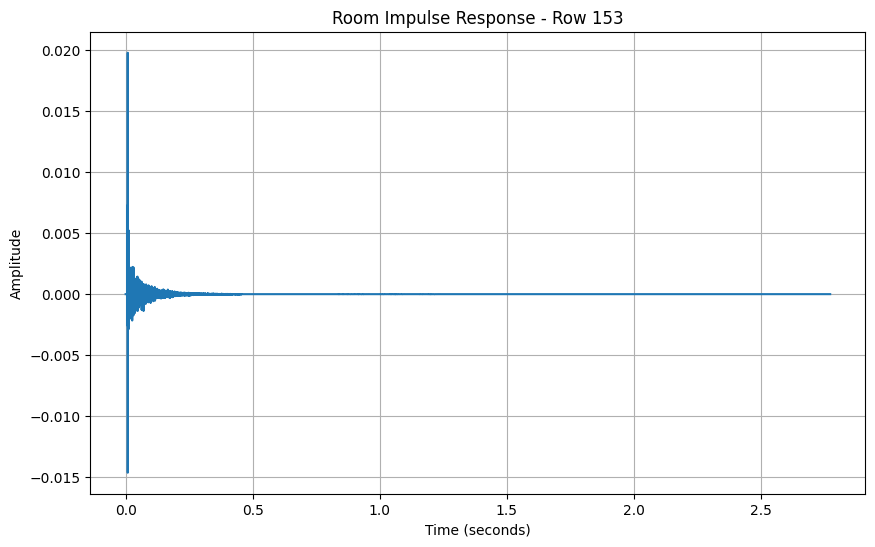

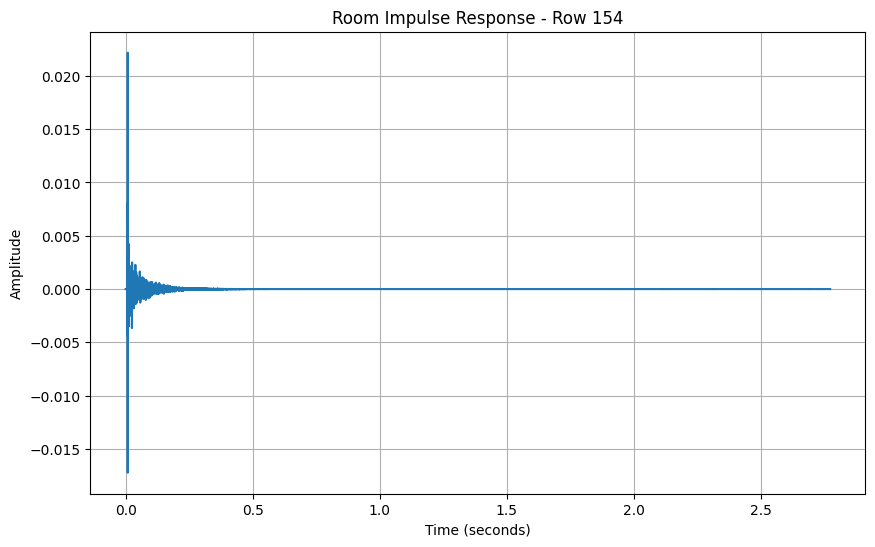

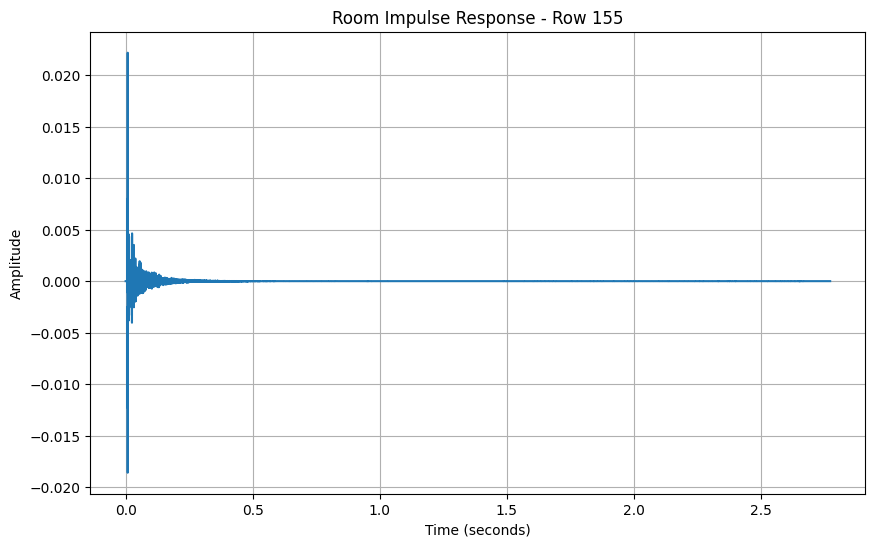

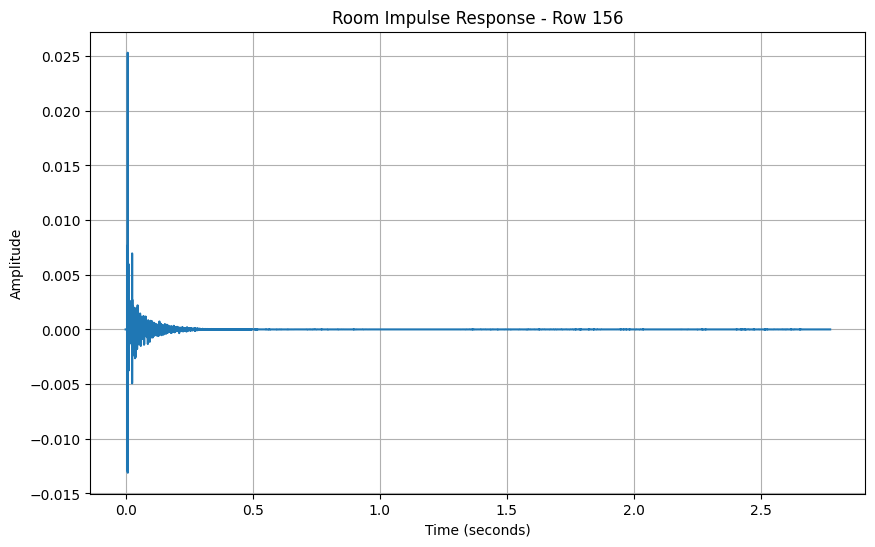

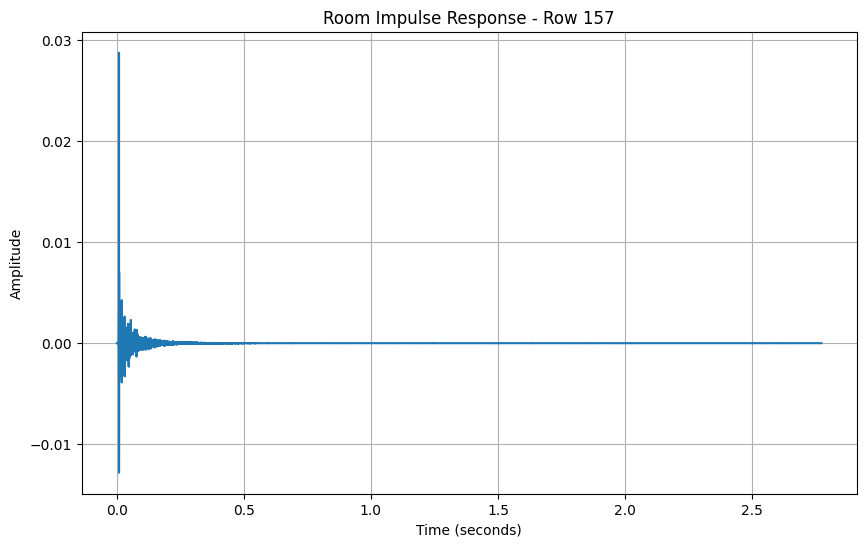

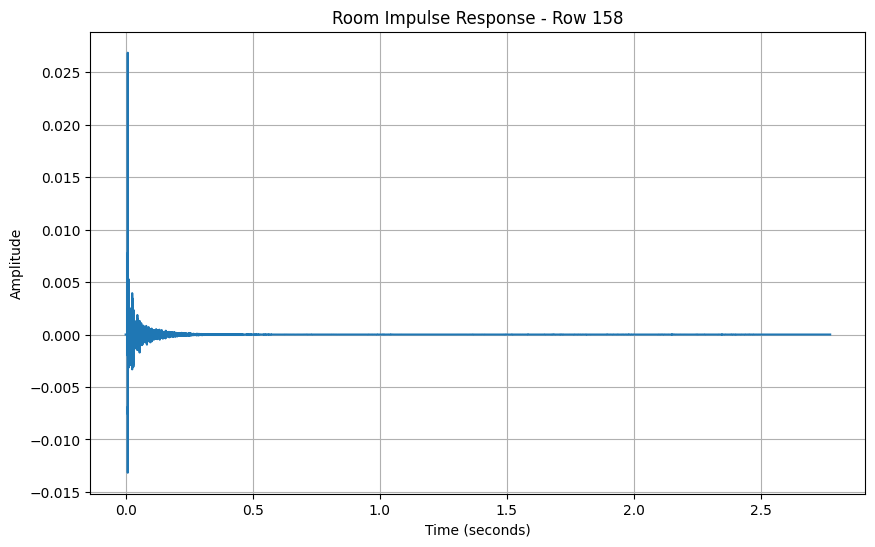

In [ ]:
# Load the .mat file
mat_data = scipy.io.loadmat('RIR_data.mat')

# Access the variables in the .mat file
RIR = mat_data['data']
df = pd.DataFrame(RIR, columns=['I', 'N', 'A', 'C', 'f', 'Q'])  # Fixed column names

# Create a time axis (assuming uniform time intervals)
sampling_rate = 48000  # Adjust to match your data's sampling rate

# Iterate through rows and plot the RIR for each row
for index, row in df.iterrows():
    rir_data = row['Q']  # Assuming the impulse response is in the 'Q' column

    time = np.arange(0, len(rir_data)) / sampling_rate

    # Create a figure for each plot
    plt.figure(figsize=(10, 6))

    # Plot the RIR
    plt.plot(time, rir_data)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(f'Room Impulse Response - Row {index}')
    plt.grid(True)

    plt.show()

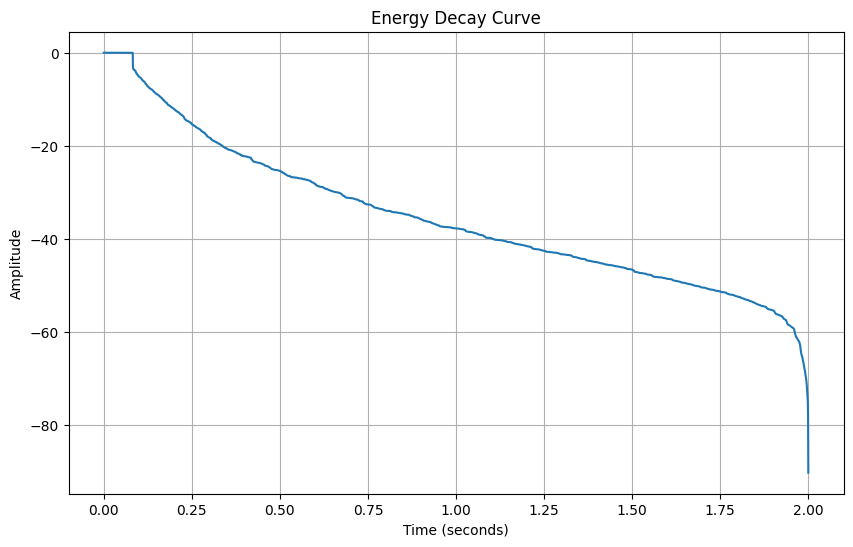

In [ ]:
# Sample RIR data (replace with your actual RIR data)
row_index = 5
value = df.iloc[row_index]['Q']
rir_data = value
# Create a time axis (assuming uniform time intervals)
sampling_rate = 48000  # Adjust to match your data's sampling rate
time = np.arange(0, len(rir_data)) / sampling_rate

edc = np.cumsum(np.square(rir_data[::-1]))[::-1]
edc = 10 * np.log10(edc)
edc = edc-edc[0]


# Plot the RIR
plt.figure(figsize=(10, 6))
plt.plot(time, edc)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Energy Decay Curve')
plt.grid(True)

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9484\1842689982.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rir_data = row[-1]  # Assuming the impulse response is in the last column
C:\Users\User\AppData\Local\Temp\ipykernel_9484\1842689982.py:13: RuntimeWarning: divide by zero encountered in log10
  edc = 10 * np.log10(edc)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


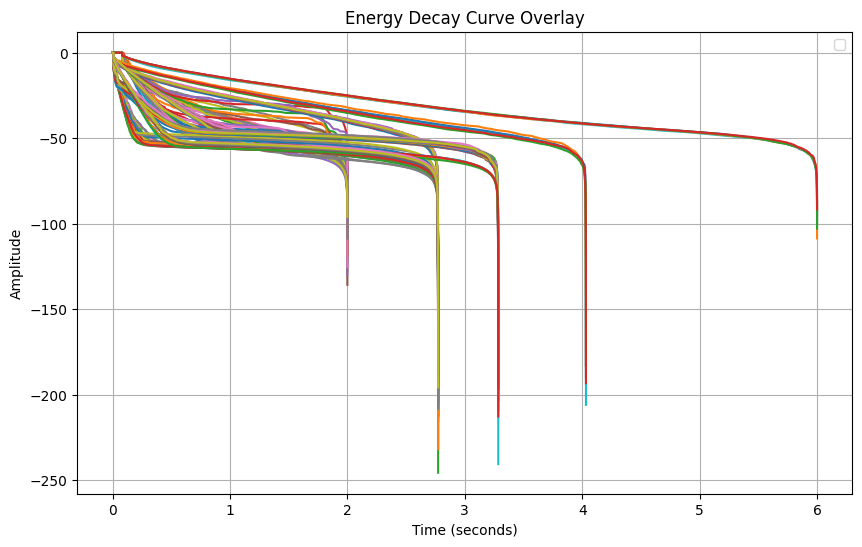

In [ ]:
# Create a figure for the plot
plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    rir_data = row[-1]  # Assuming the impulse response is in the last column

    # Create a time axis (assuming uniform time intervals)
    sampling_rate = 48000  # Adjust to match your data's sampling rate
    time = np.arange(0, len(rir_data)) / sampling_rate

    # Calculate the Energy Decay Curve (EDC)
    edc = np.cumsum(np.square(rir_data[::-1]))[::-1]
    edc = 10 * np.log10(edc)
    edc = edc-edc[0]

    # Plot the EDC for each row in the same plot
    plt.plot(time, edc)

plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Energy Decay Curve Overlay')
plt.grid(True)
plt.legend()
plt.show()

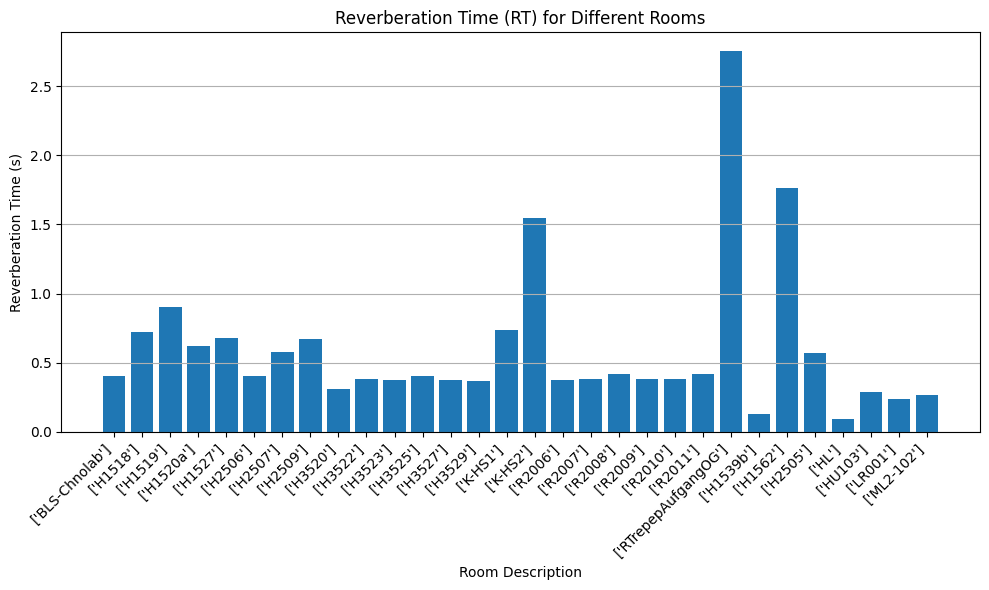

In [ ]:
# Define a function to calculate the reverberation time (RT) from the EDC
def calculate_reverberation_time(edc, sampling_rate):
    # Find the index where the EDC drops by 60 dB from its peak
    peak_amplitude = np.max(edc)
    threshold_amplitude = peak_amplitude / 1000  # -60 dB
    index_60dB = np.argmax(edc <= threshold_amplitude)

    # Calculate the RT in seconds
    rt = index_60dB / sampling_rate

    return rt

# Create a dictionary to store the RT values
rt_dict = {}

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    room_description = str(row[0])  # Convert the array to a string
    rir_data = row[-1]  # Assuming the impulse response is in the last column

    # Calculate the Energy Decay Curve (EDC)
    edc = np.cumsum(np.square(rir_data[::-1]))[::-1]

    # Calculate the RT for the current row
    sampling_rate = 44100  # Adjust to match your data's sampling rate
    rt = calculate_reverberation_time(edc, sampling_rate)

    # Store the RT in the dictionary using the room description as the key
    rt_dict[room_description] = rt

    # Extract room descriptions and RT values from the rt_dict dictionary
room_descriptions = list(rt_dict.keys())
rt_values = list(rt_dict.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(room_descriptions, rt_values)
plt.xlabel('Room Description')
plt.ylabel('Reverberation Time (s)')
plt.title('Reverberation Time (RT) for Different Rooms')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [ ]:
def calculate_rt20(edc, sampling_rate):
    # Find the index where the EDC drops by 20 dB from its peak
    peak_amplitude = np.max(edc)
    threshold_amplitude = peak_amplitude / 100  # -20 dB
    index_20dB = np.argmax(edc <= threshold_amplitude)

    # Calculate the RT20 in seconds
    rt20 = index_20dB / sampling_rate

    return rt20

# Create a dictionary to store the RT20 values
rt20_dict = {}

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    room_description = str(row[0])  # Convert the array to a string
    rir_data = row[-1]  # Assuming the impulse response is in the last column

    # Calculate the Energy Decay Curve (EDC)
    edc = np.cumsum(np.square(rir_data[::-1]))[::-1]

    # Calculate the RT20 for the current row
    sampling_rate = 48000  # Adjust to match your data's sampling rate
    rt20 = calculate_rt20(edc, sampling_rate)

    # Store the RT20 in the dictionary using the room description as the key
    rt20_dict[room_description] = rt20

# Extract room descriptions and RT20 values from the rt20_dict dictionary
room_descriptions_rt20 = list(rt20_dict.keys())
rt20_values = list(rt20_dict.values())

# Create a bar plot for RT20
plt.figure(figsize=(10, 6))
plt.bar(room_descriptions_rt20, rt20_values)
plt.xlabel('Room Description')
plt.ylabel('Reverberation Time RT20 (s)')
plt.title('Reverberation Time RT20 for Different Rooms')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis='y')
plt.tight_layout()

plt.show()

NameError: ignored

In [ ]:
def calculate_c80(edc, sampling_rate):
    # Find the index where the EDC drops by 80 dB from its peak
    peak_amplitude = np.max(edc)
    threshold_amplitude = peak_amplitude / 10**8  # -80 dB
    index_80dB = np.argmax(edc <= threshold_amplitude)

    # Calculate the C80 in seconds
    c80 = index_80dB / sampling_rate

    return c80

def calculate_c50(edc, sampling_rate):
    # Calculate the energy in the first 50 ms
    time_50ms = 0.05  # 50 ms in seconds
    samples_50ms = int(time_50ms * sampling_rate)
    early_energy = np.sum(np.square(edc[:samples_50ms]))

    # Calculate the energy after 50 ms
    late_energy = np.sum(np.square(edc[samples_50ms:]))

    # Calculate the C50
    c50 = 10 * math.log10(early_energy / late_energy)

    return c50


In [ ]:
# Create dictionaries to store the C80 and C50 values
c80_dict = {}
c50_dict = {}

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    room_description = str(row[0])  # Convert the array to a string
    rir_data = row[-1]  # Assuming the impulse response is in the last column

    # Calculate the Energy Decay Curve (EDC)
    edc = np.cumsum(np.square(rir_data[::-1]))[::-1]

    # Calculate the C80 and C50 for the current row
    sampling_rate = 44100  # Adjust to match your data's sampling rate
    c80 = calculate_c80(edc, sampling_rate)
    c50 = calculate_c50(edc, sampling_rate)

    # Store the C80 and C50 in the dictionaries using the room description as the key
    c80_dict[room_description] = c80
    c50_dict[room_description] = c50


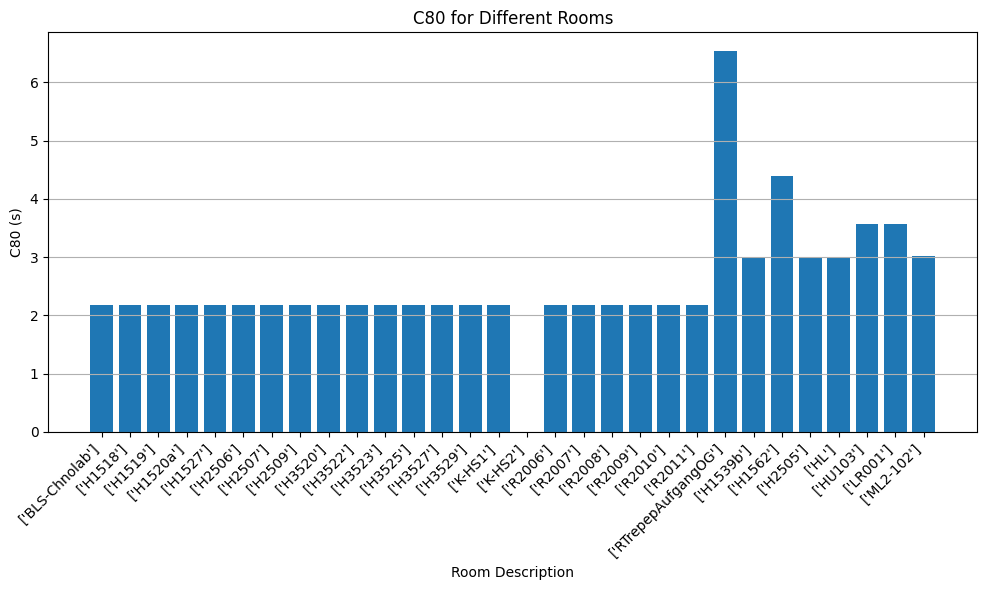

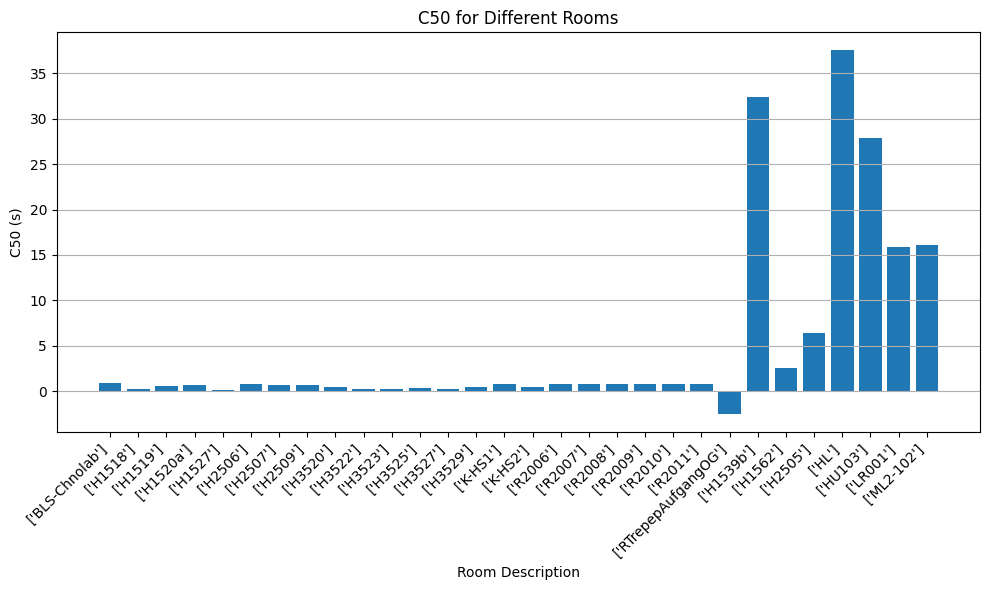

In [ ]:
# Extract room descriptions and C80 values from the c80_dict dictionary
room_descriptions_c80 = list(c80_dict.keys())
c80_values = list(c80_dict.values())

# Create a bar plot for C80
plt.figure(figsize=(10, 6))
plt.bar(room_descriptions_c80, c80_values)
plt.xlabel('Room Description')
plt.ylabel('C80 (s)')
plt.title('C80 for Different Rooms')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Extract room descriptions and C50 values from the c50_dict dictionary
room_descriptions_c50 = list(c50_dict.keys())
c50_values = list(c50_dict.values())

# Create a bar plot for C50
plt.figure(figsize=(10, 6))
plt.bar(room_descriptions_c50, c50_values)
plt.xlabel('Room Description')
plt.ylabel('C50 (s)')
plt.title('C50 for Different Rooms')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()
